In [1]:
setwd("/data/park_lab/adam/SyntheticLethal/")
list.files()

[1] "2023-03-20_qPCR.csv"                                
 [2] "2023-03-20_qPCR.xls"                                
 [3] "2023-03-21_qPCR.csv"                                
 [4] "2023-03-21_qPCR.xls"                                
 [5] "4_26_EREGqPCR.csv"                                  
 [6] "5-10qPCR.csv"                                       
 [7] "EREG_prelim.pdf"                                    
 [8] "EREG_wtn9.pdf"                                      
 [9] "Jan16Assay.pdf"                                     
[10] "Jan20Assay.pdf"                                     
[11] "Mar13_assay_trim_norm.pdf"                          
[12] "Mar13_assay_trim.rds"                               
[13] "prelim_plot.pdf"                                    
[14] "Summary__Sample Set (1-20-2023)_20230120_160825.csv"
[15] "Summary__Sample Set (2-13-2023)_20230213_165806.csv"
[16] "Summary__Sample Set (3-13-2023)_20230313_155551.csv"
[17] "SynthLethalAssay1_16_23.csv"

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()



In [3]:
library(ggforestplot)

# Synthetic Lethal

## Jan16 Assay

In [4]:
Jan16_assay <- read_csv(file = "SynthLethalAssay1_16_23.csv") %>% as.data.frame()
Jan16_assay

Rows: 12 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): Sample ID, Cell type, Decluster degree, Analysis date/time, Analys...
dbl (24): Cell count, Viable cells, Total (x10^6) cells/mL, Viable (x10^6) c...
lgl  (3): Reanalysis date/time, Reanalysis by, Tag

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sample ID,Cell count,Viable cells,Total (x10^6) cells/mL,Viable (x10^6) cells/mL,Viability (%),Average diameter (µm),Average viable diameter (µm),Average circularity,Average viable circularity,⋯,Viable spot brightness (%),Viable spot area (%),Mixing cycles,Analysis date/time,Reanalysis date/time,Analysis by,Reanalysis by,Dilution,Wash,Tag
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<lgl>,<dbl>,<chr>,<lgl>
U1,2600,2548,0.93,0.91,98.00,16.18,16.31,0.84,0.84,⋯,50,5,3,1/16/23 13:59,NA,Vi-CELL,NA,1,Normal Wash,NA
U2,4314,4219,1.54,1.51,97.80,16.60,16.75,0.84,0.84,⋯,50,5,3,1/16/23 14:01,NA,Vi-CELL,NA,1,Normal Wash,NA
U3,2971,2893,1.06,1.03,97.37,15.97,16.13,0.85,0.85,⋯,50,5,3,1/16/23 14:04,NA,Vi-CELL,NA,1,Normal Wash,NA
1,102,96,0.04,0.03,94.12,14.68,14.90,0.83,0.84,⋯,50,5,3,1/16/23 14:06,NA,Vi-CELL,NA,1,Normal Wash,NA
2,28,24,0.01,0.01,85.71,11.72,12.03,0.83,0.84,⋯,50,5,3,1/16/23 14:08,NA,Vi-CELL,NA,1,Normal Wash,NA
3,64,59,0.02,0.02,92.19,13.96,14.35,0.86,0.86,⋯,50,5,3,1/16/23 14:10,NA,Vi-CELL,NA,1,Normal Wash,NA
-1,175,165,0.06,0.06,94.29,14.97,15.09,0.85,0.86,⋯,50,5,3,1/16/23 14:12,NA,Vi-CELL,NA,1,Normal Wash,NA
-2,356,340,0.13,0.12,95.51,14.89,15.10,0.85,0.86,⋯,50,5,3,1/16/23 14:14,NA,Vi-CELL,NA,1,Normal Wash,NA
-3,242,232,0.09,0.08,95.87,15.21,15.30,0.86,0.86,⋯,50,5,3,1/16/23 14:17,NA,Vi-CELL,NA,1,Normal Wash,NA


### Data Cleaning

In [5]:
#fix sample names and add treatment groups
Jan16_assay$`Sample ID` <- c("U1", "U2", "U3",
                             "Pos1", "Pos2", "Pos3",
                             "Neg1", "Neg2", "Neg3",
                             "AREG1", "AREG2", "AREG3")
Jan16_assay <- Jan16_assay %>%
            mutate(Treatment = c(rep("Untreated", 3),
                                 rep("Postive", 3),
                                 rep("Negative", 3),
                                 rep("AREG_Enh", 3)),
                    .after = `Sample ID`)
Jan16_assay

Sample ID,Treatment,Cell count,Viable cells,Total (x10^6) cells/mL,Viable (x10^6) cells/mL,Viability (%),Average diameter (µm),Average viable diameter (µm),Average circularity,⋯,Viable spot brightness (%),Viable spot area (%),Mixing cycles,Analysis date/time,Reanalysis date/time,Analysis by,Reanalysis by,Dilution,Wash,Tag
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<lgl>,<dbl>,<chr>,<lgl>
U1,Untreated,2600,2548,0.93,0.91,98.00,16.18,16.31,0.84,⋯,50,5,3,1/16/23 13:59,NA,Vi-CELL,NA,1,Normal Wash,NA
U2,Untreated,4314,4219,1.54,1.51,97.80,16.60,16.75,0.84,⋯,50,5,3,1/16/23 14:01,NA,Vi-CELL,NA,1,Normal Wash,NA
U3,Untreated,2971,2893,1.06,1.03,97.37,15.97,16.13,0.85,⋯,50,5,3,1/16/23 14:04,NA,Vi-CELL,NA,1,Normal Wash,NA
Pos1,Postive,102,96,0.04,0.03,94.12,14.68,14.90,0.83,⋯,50,5,3,1/16/23 14:06,NA,Vi-CELL,NA,1,Normal Wash,NA
Pos2,Postive,28,24,0.01,0.01,85.71,11.72,12.03,0.83,⋯,50,5,3,1/16/23 14:08,NA,Vi-CELL,NA,1,Normal Wash,NA
Pos3,Postive,64,59,0.02,0.02,92.19,13.96,14.35,0.86,⋯,50,5,3,1/16/23 14:10,NA,Vi-CELL,NA,1,Normal Wash,NA
Neg1,Negative,175,165,0.06,0.06,94.29,14.97,15.09,0.85,⋯,50,5,3,1/16/23 14:12,NA,Vi-CELL,NA,1,Normal Wash,NA
Neg2,Negative,356,340,0.13,0.12,95.51,14.89,15.10,0.85,⋯,50,5,3,1/16/23 14:14,NA,Vi-CELL,NA,1,Normal Wash,NA
Neg3,Negative,242,232,0.09,0.08,95.87,15.21,15.30,0.86,⋯,50,5,3,1/16/23 14:17,NA,Vi-CELL,NA,1,Normal Wash,NA


In [6]:
Jan16_assay$Treatment <- as.factor(Jan16_assay$Treatment)

In [7]:
Jan16_assay

Sample ID,Treatment,Cell count,Viable cells,Total (x10^6) cells/mL,Viable (x10^6) cells/mL,Viability (%),Average diameter (µm),Average viable diameter (µm),Average circularity,⋯,Viable spot brightness (%),Viable spot area (%),Mixing cycles,Analysis date/time,Reanalysis date/time,Analysis by,Reanalysis by,Dilution,Wash,Tag
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<lgl>,<dbl>,<chr>,<lgl>
U1,Untreated,2600,2548,0.93,0.91,98.00,16.18,16.31,0.84,⋯,50,5,3,1/16/23 13:59,NA,Vi-CELL,NA,1,Normal Wash,NA
U2,Untreated,4314,4219,1.54,1.51,97.80,16.60,16.75,0.84,⋯,50,5,3,1/16/23 14:01,NA,Vi-CELL,NA,1,Normal Wash,NA
U3,Untreated,2971,2893,1.06,1.03,97.37,15.97,16.13,0.85,⋯,50,5,3,1/16/23 14:04,NA,Vi-CELL,NA,1,Normal Wash,NA
Pos1,Postive,102,96,0.04,0.03,94.12,14.68,14.90,0.83,⋯,50,5,3,1/16/23 14:06,NA,Vi-CELL,NA,1,Normal Wash,NA
Pos2,Postive,28,24,0.01,0.01,85.71,11.72,12.03,0.83,⋯,50,5,3,1/16/23 14:08,NA,Vi-CELL,NA,1,Normal Wash,NA
Pos3,Postive,64,59,0.02,0.02,92.19,13.96,14.35,0.86,⋯,50,5,3,1/16/23 14:10,NA,Vi-CELL,NA,1,Normal Wash,NA
Neg1,Negative,175,165,0.06,0.06,94.29,14.97,15.09,0.85,⋯,50,5,3,1/16/23 14:12,NA,Vi-CELL,NA,1,Normal Wash,NA
Neg2,Negative,356,340,0.13,0.12,95.51,14.89,15.10,0.85,⋯,50,5,3,1/16/23 14:14,NA,Vi-CELL,NA,1,Normal Wash,NA
Neg3,Negative,242,232,0.09,0.08,95.87,15.21,15.30,0.86,⋯,50,5,3,1/16/23 14:17,NA,Vi-CELL,NA,1,Normal Wash,NA


In [8]:
library(ggsignif)
library(ggpubr)

No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


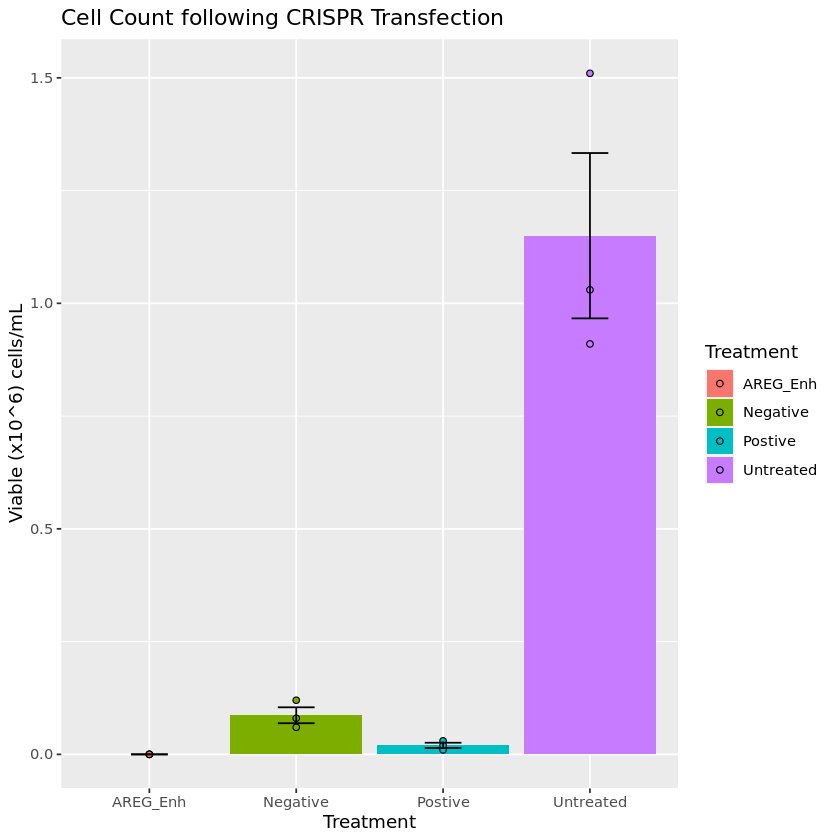

In [9]:
p <- Jan16_assay %>%
     ggplot(aes(x = Treatment, fill = Treatment, y = `Viable (x10^6) cells/mL`)) +
     geom_bar(position = "dodge", stat = "summary") + 
     geom_point(aes(x = Treatment), shape = 21, position = position_dodge(width = 1)) +
     ggtitle(label = "Cell Count following CRISPR Transfection") +
#      stat_compare_means(aes(group=Treatment), method = "t.test", label.y = 1.53) +
     geom_errorbar(stat = 'summary', position = position_dodge(width = .9), width = .25)
p

In [10]:
pdf(file = "Jan16Assay.pdf", width = 8, height = 8)
p
dev.off()

No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


png 
  2

## Jan20

In [11]:
Jan20_assay <- read_csv(file = "Summary__Sample Set (1-20-2023)_20230120_160825.csv") %>% as.data.frame()
Jan20_assay

Rows: 12 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): Sample ID, Cell type, Decluster degree, Analysis date/time, Analys...
dbl (24): Cell count, Viable cells, Total (x10^6) cells/mL, Viable (x10^6) c...
lgl  (3): Reanalysis date/time, Reanalysis by, Tag

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sample ID,Cell count,Viable cells,Total (x10^6) cells/mL,Viable (x10^6) cells/mL,Viability (%),Average diameter (µm),Average viable diameter (µm),Average circularity,Average viable circularity,⋯,Viable spot brightness (%),Viable spot area (%),Mixing cycles,Analysis date/time,Reanalysis date/time,Analysis by,Reanalysis by,Dilution,Wash,Tag
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<lgl>,<dbl>,<chr>,<lgl>
U1,3545,3497,1.27,1.25,98.65,16.38,16.47,0.88,0.88,⋯,50,5,3,1/20/2023 3:39:46 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
U2,4602,4520,1.64,1.62,98.22,16.42,16.51,0.89,0.89,⋯,50,5,3,1/20/2023 3:41:59 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
U3,4252,4184,1.52,1.50,98.40,16.20,16.30,0.88,0.88,⋯,50,5,3,1/20/2023 3:44:13 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
+1,777,750,0.28,0.27,96.53,16.01,16.20,0.88,0.89,⋯,50,5,3,1/20/2023 3:46:26 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
+2,1246,1199,0.45,0.43,96.23,15.95,16.14,0.87,0.87,⋯,50,5,3,1/20/2023 3:48:38 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
+3,921,883,0.33,0.32,95.87,15.79,15.95,0.87,0.88,⋯,50,5,3,1/20/2023 3:50:49 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
-1,1054,1007,0.38,0.36,95.54,16.24,16.46,0.87,0.87,⋯,50,5,3,1/20/2023 3:53:02 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
-2,613,581,0.22,0.21,94.78,16.17,16.45,0.87,0.88,⋯,50,5,3,1/20/2023 3:55:14 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
-3,3093,3007,1.11,1.07,97.22,15.79,15.93,0.87,0.88,⋯,50,5,3,1/20/2023 3:57:26 PM,NA,Vi-CELL,NA,1,Normal Wash,NA


In [12]:
#fix sample names and add treatment groups
Jan20_assay$`Sample ID` <- c("U1", "U2", "U3",
                             "Pos1", "Pos2", "Pos3",
                             "Neg1", "Neg2", "Neg3",
                             "AREG1", "AREG2", "AREG3")
Jan20_assay <- Jan20_assay %>%
            mutate(Treatment = c(rep("Untreated", 3),
                                 rep("Postive", 3),
                                 rep("Negative", 3),
                                 rep("AREG_Enh", 3)),
                    .after = `Sample ID`)
Jan20_assay

Sample ID,Treatment,Cell count,Viable cells,Total (x10^6) cells/mL,Viable (x10^6) cells/mL,Viability (%),Average diameter (µm),Average viable diameter (µm),Average circularity,⋯,Viable spot brightness (%),Viable spot area (%),Mixing cycles,Analysis date/time,Reanalysis date/time,Analysis by,Reanalysis by,Dilution,Wash,Tag
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<lgl>,<dbl>,<chr>,<lgl>
U1,Untreated,3545,3497,1.27,1.25,98.65,16.38,16.47,0.88,⋯,50,5,3,1/20/2023 3:39:46 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
U2,Untreated,4602,4520,1.64,1.62,98.22,16.42,16.51,0.89,⋯,50,5,3,1/20/2023 3:41:59 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
U3,Untreated,4252,4184,1.52,1.50,98.40,16.20,16.30,0.88,⋯,50,5,3,1/20/2023 3:44:13 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
Pos1,Postive,777,750,0.28,0.27,96.53,16.01,16.20,0.88,⋯,50,5,3,1/20/2023 3:46:26 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
Pos2,Postive,1246,1199,0.45,0.43,96.23,15.95,16.14,0.87,⋯,50,5,3,1/20/2023 3:48:38 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
Pos3,Postive,921,883,0.33,0.32,95.87,15.79,15.95,0.87,⋯,50,5,3,1/20/2023 3:50:49 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
Neg1,Negative,1054,1007,0.38,0.36,95.54,16.24,16.46,0.87,⋯,50,5,3,1/20/2023 3:53:02 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
Neg2,Negative,613,581,0.22,0.21,94.78,16.17,16.45,0.87,⋯,50,5,3,1/20/2023 3:55:14 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
Neg3,Negative,3093,3007,1.11,1.07,97.22,15.79,15.93,0.87,⋯,50,5,3,1/20/2023 3:57:26 PM,NA,Vi-CELL,NA,1,Normal Wash,NA


In [13]:
Jan20_assay$Treatment <- as.factor(Jan20_assay$Treatment)

In [14]:
library(ggsignif)
library(ggpubr)

No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


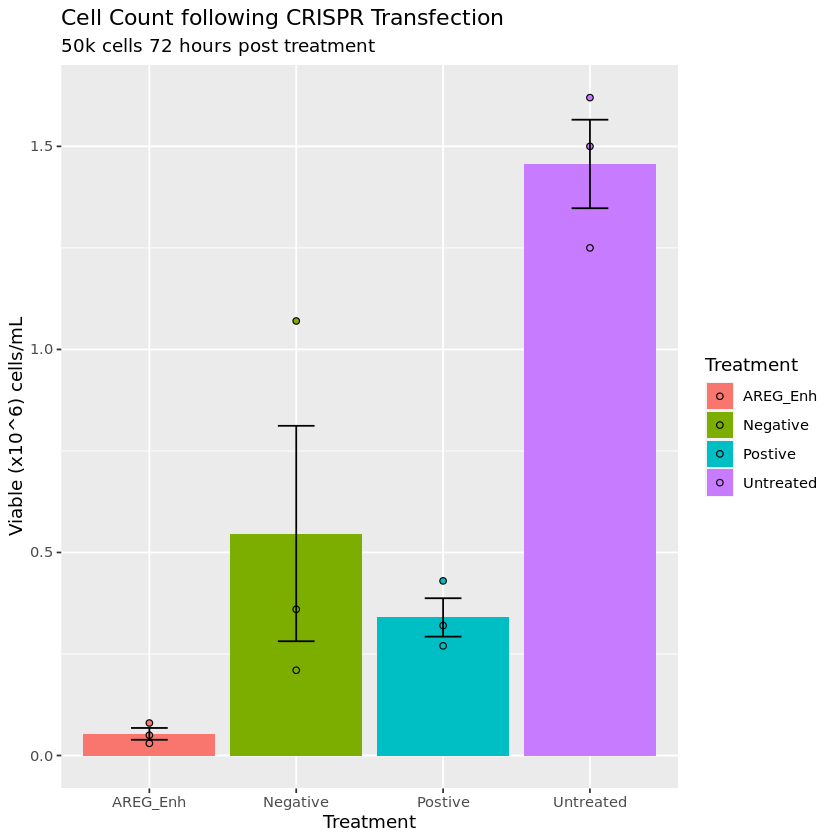

In [15]:
p <- Jan20_assay %>%
     ggplot(aes(x = Treatment, fill = Treatment, y = `Viable (x10^6) cells/mL`)) +
     geom_bar(position = "dodge", stat = "summary") + 
     geom_point(aes(x = Treatment), shape = 21, position = position_dodge(width = 1)) +
     ggtitle(label = "Cell Count following CRISPR Transfection", 
             "50k cells 72 hours post treatment") +
#      stat_compare_means(aes(group=Treatment), method = "t.test", label.y = 1.53) +
     geom_errorbar(stat = 'summary', position = position_dodge(width = .9), width = .25)
p

In [ ]:
pdf(file = "Jan20Assay.pdf", width = 8, height = 8)
p
dev.off()

## Jan30 Assay with EGF

In [17]:
Jan30Assay <- read_csv(file = "Summary__Sample Set (1-30-2023)_20230130_125150.csv") %>% 
            as.data.frame() %>%
            tail(n = 12)
Jan30Assay

ERROR: Error: 'Summary__Sample Set (1-30-2023)_20230130_125150.csv' does not exist in current working directory ('/gpfs52/data/park_lab/adam/SyntheticLethal').


In [18]:
#fix sample names and add treatment groups
Jan30Assay$`Sample ID` <- c("U1", "U2", "U3",
                             "Pos1", "Pos2", "Pos3",
                             "Neg1", "Neg2", "Neg3",
                             "AREG1", "AREG2", "AREG3")
Jan30Assay <- Jan30Assay %>%
            mutate(Treatment = c(rep("Untreated", 3),
                                 rep("Postive", 3),
                                 rep("Negative", 3),
                                 rep("AREG_Enh", 3)),
                    .after = `Sample ID`)
Jan30Assay

ERROR: Error in Jan30Assay$`Sample ID` <- c("U1", "U2", "U3", "Pos1", "Pos2", : object 'Jan30Assay' not found


In [19]:
Jan30Assay$Treatment <- as.factor(Jan30Assay$Treatment)

ERROR: Error in is.factor(x): object 'Jan30Assay' not found


## Combine Assays

In [20]:
Jan30Assay <- Jan30Assay %>%
            mutate(Media = c(rep("EGF", 12)))
Jan20_assay <- Jan20_assay %>%
            mutate(Media = c(rep("No EGF", 12)))

ERROR: Error in mutate(., Media = c(rep("EGF", 12))): object 'Jan30Assay' not found


In [21]:
combined_df <- rbind(Jan30Assay, Jan20_assay)
combined_df

ERROR: Error in rbind(Jan30Assay, Jan20_assay): object 'Jan30Assay' not found


In [ ]:
p <- combined_df %>%
     ggplot(aes(x = Treatment, fill = Media, y = `Viable (x10^6) cells/mL`)) + 
     geom_bar(position = "dodge", stat = "summary") + 
     geom_point(aes(x = Treatment), shape = 21, position = position_dodge(width = 1)) +
     ggtitle(label = "Cell Count following CRISPR Transfection", 
             "50k cells 72 hours post treatment") +
#      stat_compare_means(aes(group=Treatment), method = "t.test", label.y = 1.53) +
     geom_errorbar(stat = 'summary', position = position_dodge(width = .9), width = .25)
p

## 2-13 Assay WT v Ex9

In [22]:
Feb13Assay <- read_csv(file = "Summary__Sample Set (2-13-2023)_20230213_165806.csv") %>%
              as.data.frame()
Feb13Assay

Rows: 48 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): Sample ID, Cell type, Decluster degree, Analysis date/time, Analys...
dbl (24): Cell count, Viable cells, Total (x10^6) cells/mL, Viable (x10^6) c...
lgl  (3): Reanalysis date/time, Reanalysis by, Tag

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sample ID,Cell count,Viable cells,Total (x10^6) cells/mL,Viable (x10^6) cells/mL,Viability (%),Average diameter (µm),Average viable diameter (µm),Average circularity,Average viable circularity,⋯,Viable spot brightness (%),Viable spot area (%),Mixing cycles,Analysis date/time,Reanalysis date/time,Analysis by,Reanalysis by,Dilution,Wash,Tag
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<lgl>,<dbl>,<chr>,<lgl>
WE+,4516,4420,1.61,1.58,97.87,16.09,16.22,0.85,0.86,⋯,50,5,3,2/13/2023 3:02:30 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
WE+,10453,10277,3.74,3.67,98.32,16.09,16.19,0.86,0.87,⋯,50,5,3,2/13/2023 3:04:39 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
WE+,7294,7145,2.61,2.55,97.96,15.92,16.05,0.86,0.87,⋯,50,5,3,2/13/2023 3:06:48 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
WE-,3388,3247,1.21,1.16,95.84,14.51,14.70,0.86,0.87,⋯,50,5,3,2/13/2023 3:08:52 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
WE-,948,902,0.34,0.32,95.15,14.77,15.02,0.86,0.87,⋯,50,5,3,2/13/2023 3:10:54 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
WE-,6467,6261,2.31,2.24,96.81,15.24,15.41,0.85,0.86,⋯,50,5,3,2/13/2023 3:13:01 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
WEA,146,140,0.05,0.05,95.89,13.83,13.96,0.87,0.88,⋯,50,5,3,2/13/2023 3:15:04 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
WEA,1191,1144,0.43,0.41,96.05,17.51,17.76,0.85,0.86,⋯,50,5,3,2/13/2023 3:17:07 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
WEA,1766,1707,0.63,0.61,96.66,18.20,18.47,0.87,0.87,⋯,50,5,3,2/13/2023 3:19:09 PM,NA,Vi-CELL,NA,1,Normal Wash,NA


In [23]:
Feb13Assay_trim <- Feb13Assay %>%
                select(c("Sample ID", "Viable (x10^6) cells/mL")) %>%
                mutate(Genotype = c(rep("WT", 24), rep("E545K", 24))) %>%
                mutate(Treatment = c(
                       rep(
                           c(rep("Positive", 3), 
                           rep("Negative", 3), 
                           rep("AREG", 3), 
                           rep("Vehicle", 3)), 4)))

In [24]:
Feb13Assay_trim

Sample ID,Viable (x10^6) cells/mL,Genotype,Treatment
<chr>,<dbl>,<chr>,<chr>
WE+,1.58,WT,Positive
WE+,3.67,WT,Positive
WE+,2.55,WT,Positive
WE-,1.16,WT,Negative
WE-,0.32,WT,Negative
WE-,2.24,WT,Negative
WEA,0.05,WT,AREG
WEA,0.41,WT,AREG
WEA,0.61,WT,AREG


## 3-13 Assay

In [74]:
setwd("/data/park_lab/adam/SyntheticLethal/")
list.files()
library(tidyverse)


[1] "2023-03-20_qPCR.csv"                                
 [2] "2023-03-20_qPCR.xls"                                
 [3] "2023-03-21_qPCR.csv"                                
 [4] "2023-03-21_qPCR.xls"                                
 [5] "4_26_EREGqPCR.csv"                                  
 [6] "5-10qPCR.csv"                                       
 [7] "EREG_prelim.pdf"                                    
 [8] "EREG_wtn9.pdf"                                      
 [9] "Jan16Assay.pdf"                                     
[10] "Jan20Assay.pdf"                                     
[11] "Mar13_assay_trim_norm.pdf"                          
[12] "Mar13_assay_trim.rds"                               
[13] "prelim_plot.pdf"                                    
[14] "Summary__Sample Set (1-20-2023)_20230120_160825.csv"
[15] "Summary__Sample Set (2-13-2023)_20230213_165806.csv"
[16] "Summary__Sample Set (3-13-2023)_20230313_155551.csv"
[17] "SynthLethalAssay1_16_23.csv"

In [75]:
Mar13_assay <- read_csv(file = "Summary__Sample Set (3-13-2023)_20230313_155551.csv") %>% as.data.frame()
Mar13_assay

Rows: 68 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): Sample ID, Cell type, Decluster degree, Analysis date/time, Analys...
dbl (24): Cell count, Viable cells, Total (x10^6) cells/mL, Viable (x10^6) c...
lgl  (3): Reanalysis date/time, Reanalysis by, Tag

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sample ID,Cell count,Viable cells,Total (x10^6) cells/mL,Viable (x10^6) cells/mL,Viability (%),Average diameter (µm),Average viable diameter (µm),Average circularity,Average viable circularity,⋯,Viable spot brightness (%),Viable spot area (%),Mixing cycles,Analysis date/time,Reanalysis date/time,Analysis by,Reanalysis by,Dilution,Wash,Tag
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<lgl>,<dbl>,<chr>,<lgl>
wte-,5737,5669,2.05,2.03,98.81000,17.59000,17.69000,0.8600000,0.8600000,⋯,50,5,3,3/13/2023 1:24:29 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
wte-,6414,6280,2.29,2.24,97.91082,16.67636,16.82483,0.8580933,0.8612931,⋯,NA,NA,0,3/13/2023 1:26:45 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
wte-,7265,7101,2.60,2.54,97.74260,16.00778,16.14856,0.8530189,0.8560738,⋯,NA,NA,0,3/13/2023 1:29:04 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
wte-,8364,8178,2.99,2.92,97.77618,15.77601,15.91615,0.8526158,0.8558877,⋯,NA,NA,0,3/13/2023 1:31:21 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
wtea,5296,5174,1.89,1.85,97.70000,17.17000,17.35000,0.8500000,0.8600000,⋯,50,5,3,3/13/2023 1:33:37 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
wtea,4919,4808,1.76,1.72,97.74345,17.78322,17.95021,0.8675846,0.8717248,⋯,NA,NA,0,3/13/2023 1:35:52 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
wtea,4614,4509,1.65,1.61,97.72432,16.78213,16.94496,0.8568171,0.8601212,⋯,NA,NA,0,3/13/2023 1:38:07 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
wtea,8619,8493,3.08,3.03,98.53812,16.69166,16.79294,0.8645087,0.8668876,⋯,NA,NA,0,3/13/2023 1:40:23 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
wt-,707,685,0.25,0.24,96.89000,16.00000,16.23000,0.8800000,0.8800000,⋯,50,5,3,3/13/2023 1:42:37 PM,NA,Vi-CELL,NA,1,Normal Wash,NA


In [76]:
Mar13_assay_trim <- Mar13_assay %>% select(c("Sample ID", "Viable (x10^6) cells/mL"))
Mar13_assay_trim

Sample ID,Viable (x10^6) cells/mL
<chr>,<dbl>
wte-,2.03
wte-,2.24
wte-,2.54
wte-,2.92
wtea,1.85
wtea,1.72
wtea,1.61
wtea,3.03
wt-,0.24


In [77]:
Mar13_assay_trim$Genotype <- c(rep("WT", 20), rep("ex9", 24), rep("ex20", 24))
Mar13_assay_trim

Sample ID,Viable (x10^6) cells/mL,Genotype
<chr>,<dbl>,<chr>
wte-,2.03,WT
wte-,2.24,WT
wte-,2.54,WT
wte-,2.92,WT
wtea,1.85,WT
wtea,1.72,WT
wtea,1.61,WT
wtea,3.03,WT
wt-,0.24,WT


In [78]:
Mar13_assay_trim$Media <- c(rep("EGF", 8), rep("0_EGF", 12),
                            rep("EGF", 12),  rep("0_EGF", 12),
                            rep("EGF", 12),  rep("0_EGF", 12))
Mar13_assay_trim

Sample ID,Viable (x10^6) cells/mL,Genotype,Media
<chr>,<dbl>,<chr>,<chr>
wte-,2.03,WT,EGF
wte-,2.24,WT,EGF
wte-,2.54,WT,EGF
wte-,2.92,WT,EGF
wtea,1.85,WT,EGF
wtea,1.72,WT,EGF
wtea,1.61,WT,EGF
wtea,3.03,WT,EGF
wt-,0.24,WT,0_EGF


In [79]:
Mar13_assay_trim$Treatment <- c(rep("Negative", 4), rep("AREG", 4),
                                rep("Negative", 6), rep("AREG", 6),
                                rep("Negative", 6), rep("AREG", 6),
                                rep("Negative", 6), rep("AREG", 6),
                                rep("Negative", 6), rep("AREG", 6),
                                rep("Negative", 6), rep("AREG", 6))
Mar13_assay_trim

Sample ID,Viable (x10^6) cells/mL,Genotype,Media,Treatment
<chr>,<dbl>,<chr>,<chr>,<chr>
wte-,2.03,WT,EGF,Negative
wte-,2.24,WT,EGF,Negative
wte-,2.54,WT,EGF,Negative
wte-,2.92,WT,EGF,Negative
wtea,1.85,WT,EGF,AREG
wtea,1.72,WT,EGF,AREG
wtea,1.61,WT,EGF,AREG
wtea,3.03,WT,EGF,AREG
wt-,0.24,WT,0_EGF,Negative


In [80]:
saveRDS(object = Mar13_assay_trim, file = "Mar13_assay_trim.rds")

In [81]:
load(file = "Mar13_assay_trim.rds")

Warning message in readChar(con, 5L, useBytes = TRUE):
“truncating string with embedded nuls”
Warning message:
“file ‘Mar13_assay_trim.rds’ has magic number 'X'
  Use of save versions prior to 2 is deprecated”


ERROR: Error in load(file = "Mar13_assay_trim.rds"): bad restore file magic number (file may be corrupted) -- no data loaded


In [ ]:
p <- Mar13_assay_trim %>%
     ggplot(aes(x = Treatment, fill = Genotype, y = `Viable (x10^6) cells/mL`)) +
     facet_grid(~Media) +
     geom_bar(position = "dodge", stat = "summary") + 
     geom_point(aes(x = Treatment), shape = 21, position = position_dodge(width = 1)) +
     ggtitle(label = "Survival following Cas9 mediated Deletion of AREG enhancer",
             subtitle = "72 hours after RNP transfection") +
#      stat_compare_means(aes(group=Treatment), method = "t.test", label.y = 1.63) +
     geom_errorbar(stat = 'summary', position = position_dodge(width = .9), width = .25)
p

In [82]:
Mar13_assay_trim_WT_EGF <- Mar13_assay_trim %>%
                        filter(Genotype == "WT") %>%
                        filter(Media == "EGF")
Mar13_assay_trim_WT_0EGF <- Mar13_assay_trim %>%
                        filter(Genotype == "WT") %>%
                        filter(Media == "0_EGF")
Mar13_assay_trim_ex9_EGF <- Mar13_assay_trim %>%
                        filter(Genotype == "ex9") %>%
                        filter(Media == "EGF")
Mar13_assay_trim_ex9_0EGF <- Mar13_assay_trim %>%
                        filter(Genotype == "ex9") %>%
                        filter(Media == "0_EGF")
Mar13_assay_trim_ex20_EGF <- Mar13_assay_trim %>%
                        filter(Genotype == "ex20") %>%
                        filter(Media == "EGF")
Mar13_assay_trim_ex20_0EGF <- Mar13_assay_trim %>%
                        filter(Genotype == "ex20") %>%
                        filter(Media == "0_EGF")

In [83]:
Mar13_assay_trim_WT_EGF_negav <- Mar13_assay_trim_WT_EGF %>%
                                 filter(Treatment == "Negative") %>%
                                 select(`Viable (x10^6) cells/mL`)
Mar13_assay_trim_WT_EGF_negav <- mean(Mar13_assay_trim_WT_EGF_negav$`Viable (x10^6) cells/mL`)
Mar13_assay_trim_WT_EGF_negav

Mar13_assay_trim_WT_0EGF_negav <- Mar13_assay_trim_WT_0EGF %>%
                                 filter(Treatment == "Negative") %>%
                                 select(`Viable (x10^6) cells/mL`)
Mar13_assay_trim_WT_0EGF_negav <- mean(Mar13_assay_trim_WT_0EGF_negav$`Viable (x10^6) cells/mL`)
Mar13_assay_trim_WT_0EGF_negav

Mar13_assay_trim_ex9_EGF_negav <- Mar13_assay_trim_ex9_EGF %>%
                                 filter(Treatment == "Negative") %>%
                                 select(`Viable (x10^6) cells/mL`)
Mar13_assay_trim_ex9_EGF_negav <- mean(Mar13_assay_trim_ex9_EGF_negav$`Viable (x10^6) cells/mL`)
Mar13_assay_trim_ex9_EGF_negav

Mar13_assay_trim_ex9_0EGF_negav <- Mar13_assay_trim_ex9_0EGF %>%
                                 filter(Treatment == "Negative") %>%
                                 select(`Viable (x10^6) cells/mL`)
Mar13_assay_trim_ex9_0EGF_negav <- mean(Mar13_assay_trim_ex9_0EGF_negav$`Viable (x10^6) cells/mL`)
Mar13_assay_trim_ex9_0EGF_negav

Mar13_assay_trim_ex20_EGF_negav <- Mar13_assay_trim_ex20_EGF %>%
                                 filter(Treatment == "Negative") %>%
                                 select(`Viable (x10^6) cells/mL`)
Mar13_assay_trim_ex20_EGF_negav <- mean(Mar13_assay_trim_ex20_EGF_negav$`Viable (x10^6) cells/mL`)
Mar13_assay_trim_ex20_EGF_negav

Mar13_assay_trim_ex20_0EGF_negav <- Mar13_assay_trim_ex20_0EGF %>%
                                 filter(Treatment == "Negative") %>%
                                 select(`Viable (x10^6) cells/mL`)
Mar13_assay_trim_ex20_0EGF_negav <- mean(Mar13_assay_trim_ex20_0EGF_negav$`Viable (x10^6) cells/mL`)
Mar13_assay_trim_ex20_0EGF_negav

[1] 2.4325

[1] 0.22

[1] 2.456667

[1] 1.88

[1] 0.8933333

[1] 0.6316667

In [84]:
Mar13_assay_trim_WT_EGF$relative <- Mar13_assay_trim_WT_EGF$`Viable (x10^6) cells/mL` / Mar13_assay_trim_WT_EGF_negav
Mar13_assay_trim_WT_0EGF$relative <- Mar13_assay_trim_WT_0EGF$`Viable (x10^6) cells/mL` / Mar13_assay_trim_WT_0EGF_negav
Mar13_assay_trim_ex9_EGF$relative <- Mar13_assay_trim_ex9_EGF$`Viable (x10^6) cells/mL` / Mar13_assay_trim_ex9_EGF_negav
Mar13_assay_trim_ex9_0EGF$relative <- Mar13_assay_trim_ex9_0EGF$`Viable (x10^6) cells/mL` / Mar13_assay_trim_ex9_0EGF_negav
Mar13_assay_trim_ex20_EGF$relative <- Mar13_assay_trim_ex20_EGF$`Viable (x10^6) cells/mL` / Mar13_assay_trim_ex20_EGF_negav
Mar13_assay_trim_ex20_0EGF$relative <- Mar13_assay_trim_ex20_0EGF$`Viable (x10^6) cells/mL` / Mar13_assay_trim_ex20_0EGF_negav

In [85]:
Mar13_assay_trim_norm <- rbind(Mar13_assay_trim_WT_EGF, Mar13_assay_trim_WT_0EGF,
                               Mar13_assay_trim_ex9_EGF, Mar13_assay_trim_ex9_0EGF,
                               Mar13_assay_trim_ex20_EGF, Mar13_assay_trim_ex20_0EGF)
Mar13_assay_trim_norm

Sample ID,Viable (x10^6) cells/mL,Genotype,Media,Treatment,relative
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
wte-,2.03,WT,EGF,Negative,0.8345324
wte-,2.24,WT,EGF,Negative,0.9208633
wte-,2.54,WT,EGF,Negative,1.0441932
wte-,2.92,WT,EGF,Negative,1.2004111
wtea,1.85,WT,EGF,AREG,0.7605344
wtea,1.72,WT,EGF,AREG,0.7070915
wtea,1.61,WT,EGF,AREG,0.6618705
wtea,3.03,WT,EGF,AREG,1.2456321
wt-,0.24,WT,0_EGF,Negative,1.0909091


In [86]:
Mar13_assay_trim_norm$Genotype <- factor(Mar13_assay_trim_norm$Genotype, 
                                            levels = c("WT", "ex9", "ex20"))
Mar13_assay_trim_norm$Treatment <- Mar13_assay_trim_norm$Treatment %>% as.factor() %>%
                               recode_factor("AREG" = "AREG\nEnhancer Flanking", 
                               "Negative" = "IDT Negative\nControl #1")
Mar13_assay_trim_norm$Media <- Mar13_assay_trim_norm$Media %>% as.factor() %>%
                               recode_factor("0_EGF" = "EGF-free Media", 
                               "EGF" = "20ng/mL EGF Media")
# Mar13_assay_trim_norm$comb <- paste(Mar13_assay_trim_norm$Media, Mar13_assay_trim_norm$Treatment)

In [87]:
library(ggpubr)
library(ggsignif)

In [88]:
stat_box_data <- function(y, upper_limit = max(Mar13_assay_trim_norm$relative) * 1.2) {
  return( 
    data.frame(
      y = 1.725,
      label = paste('n=',length(y))
    )
  )
}

In [89]:
str(Mar13_assay_trim_norm$Genotype)

 Factor w/ 3 levels "WT","ex9","ex20": 1 1 1 1 1 1 1 1 1 1 ...


In [90]:
anno_df = compare_means(relative ~ Genotype, group.by = "Media", data = Mar13_assay_trim_norm) %>%
 mutate(y_pos = 1.5)
anno_df

Media,.y.,group1,group2,p,p.adj,p.format,p.signif,method,y_pos
<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
20ng/mL EGF Media,relative,WT,ex9,0.2082877,1,0.21,ns,Wilcoxon,1.5
20ng/mL EGF Media,relative,WT,ex20,0.3053902,1,0.31,ns,Wilcoxon,1.5
20ng/mL EGF Media,relative,ex9,ex20,0.7125351,1,0.71,ns,Wilcoxon,1.5
EGF-free Media,relative,WT,ex9,0.4355310,1,0.44,ns,Wilcoxon,1.5
EGF-free Media,relative,WT,ex20,0.5831967,1,0.58,ns,Wilcoxon,1.5
EGF-free Media,relative,ex9,ex20,0.8428360,1,0.84,ns,Wilcoxon,1.5


In [91]:
(Mar13_assay_trim_norm$Treatment)

[1] IDT Negative\nControl #1 IDT Negative\nControl #1 IDT Negative\nControl #1
 [4] IDT Negative\nControl #1 AREG\nEnhancer Flanking  AREG\nEnhancer Flanking 
 [7] AREG\nEnhancer Flanking  AREG\nEnhancer Flanking  IDT Negative\nControl #1
[10] IDT Negative\nControl #1 IDT Negative\nControl #1 IDT Negative\nControl #1
[13] IDT Negative\nControl #1 IDT Negative\nControl #1 AREG\nEnhancer Flanking 
[16] AREG\nEnhancer Flanking  AREG\nEnhancer Flanking  AREG\nEnhancer Flanking 
[19] AREG\nEnhancer Flanking  AREG\nEnhancer Flanking  IDT Negative\nControl #1
[22] IDT Negative\nControl #1 IDT Negative\nControl #1 IDT Negative\nControl #1
[25] IDT Negative\nControl #1 IDT Negative\nControl #1 AREG\nEnhancer Flanking 
[28] AREG\nEnhancer Flanking  AREG\nEnhancer Flanking  AREG\nEnhancer Flanking 
[31] AREG\nEnhancer Flanking  AREG\nEnhancer Flanking  IDT Negative\nControl #1
[34] IDT Negative\nControl #1 IDT Negative\nControl #1 IDT Negative\nControl #1
[37] IDT Negative\nControl #1 IDT Negative\nControl #1 AREG\nEnhancer Flanking 
[40] AREG\nEnhancer Flanking  AREG\nEnhancer Flanking  AREG\nEnhancer Flanking 
[43] AREG\nEnhancer Flanking  AREG\nEnhancer Flanking  IDT Negative\nControl #1
[46] IDT Negative\nControl #1 IDT Negative\nControl #1 IDT Negative\nControl #1
[49] IDT Negative\nControl #1 IDT Negative\nControl #1 AREG\nEnhancer Flanking 
[52] AREG\nEnhancer Flanking  AREG\nEnhancer Flanking  AREG\nEnhancer Flanking 
[55] AREG\nEnhancer Flanking  AREG\nEnhancer Flanking  IDT Negative\nControl #1
[58] IDT Negative\nControl #1 IDT Negative\nControl #1 IDT Negative\nControl #1
[61] IDT Negative\nControl #1 IDT Negative\nControl #1 AREG\nEnhancer Flanking 
[64] AREG\nEnhancer Flanking  AREG\nEnhancer Flanking  AREG\nEnhancer Flanking 
[67] AREG\nEnhancer Flanking  AREG\nEnhancer Flanking 
Levels: AREG\nEnhancer Flanking IDT Negative\nControl #1

In [92]:
Mar13_assay_trim_norm$Treatment <- relevel(Mar13_assay_trim_norm$Treatment, 
                                           "IDT Negative\nControl #1")

In [93]:
Mar13_assay_trim_norm

Sample ID,Viable (x10^6) cells/mL,Genotype,Media,Treatment,relative
<chr>,<dbl>,<fct>,<fct>,<fct>,<dbl>
wte-,2.03,WT,20ng/mL EGF Media,IDT Negative Control #1,0.8345324
wte-,2.24,WT,20ng/mL EGF Media,IDT Negative Control #1,0.9208633
wte-,2.54,WT,20ng/mL EGF Media,IDT Negative Control #1,1.0441932
wte-,2.92,WT,20ng/mL EGF Media,IDT Negative Control #1,1.2004111
wtea,1.85,WT,20ng/mL EGF Media,AREG Enhancer Flanking,0.7605344
wtea,1.72,WT,20ng/mL EGF Media,AREG Enhancer Flanking,0.7070915
wtea,1.61,WT,20ng/mL EGF Media,AREG Enhancer Flanking,0.6618705
wtea,3.03,WT,20ng/mL EGF Media,AREG Enhancer Flanking,1.2456321
wt-,0.24,WT,EGF-free Media,IDT Negative Control #1,1.0909091


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message in stat_summary(aes(fill = Genotype), fun.data = stat_box_data, :
“Ignoring unknown aesthetics: fill”
Warning message in geom_errorbar(aes(fill = Genotype), stat = "summary", position = position_dodge(width = 0.9), :
“Ignoring unknown aesthetics: fill”
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


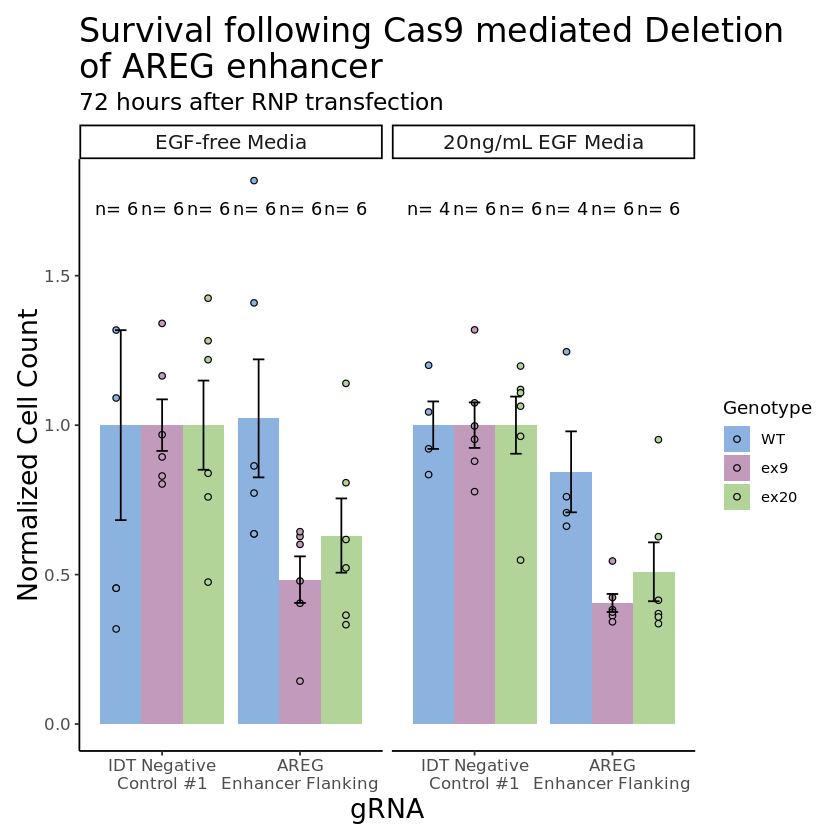

In [94]:
p <- Mar13_assay_trim_norm %>%
     ggplot(aes(x = Treatment, y = relative)) +
     facet_grid(~Media) +
     geom_bar(aes(fill = Genotype), 
              position = "dodge", stat = "summary") + 
     geom_point(aes(x = Treatment, fill = Genotype), shape = 21, position = position_dodge(width = 1)) +
     ggtitle(label = "Survival following Cas9 mediated Deletion\nof AREG enhancer",
             subtitle = "72 hours after RNP transfection") +
     ylab(label = "Normalized Cell Count") + xlab(label = "gRNA") +
     coord_cartesian(ylim=c(0, 1.8)) +     
     scale_fill_discrete(labels(c("WT", "E545K", "H1047R"))) +
     scale_fill_manual(values = c("#8CB3DF", "#C29ABB", "#B2D498")) +
     stat_summary(aes(fill = Genotype), 
                  fun.data = stat_box_data, geom = "text", hjust = 0.5, 
                         vjust = 0.52, family = "Arial", size = 3.75, 
                  position = position_dodge(width = 1)) +
     geom_errorbar(aes(fill = Genotype),
         stat = 'summary', position = position_dodge(width = .9), width = .25) +
     theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 16),
                          axis.text = element_text(size = 10),
                          plot.title = element_text(size = 20),
                          plot.subtitle = element_text(size = 14),
                          strip.text = element_text(size = 12),
#                           legend.text = element_text(size = 12),
#                           legend.title = element_text(size = 14),
                          plot.margin = margin(10, 10, 10, 10))
p

### More Cleaning

In [95]:
clean_df <- Mar13_assay_trim_norm

In [96]:
clean_df_EGF <- clean_df %>% filter(Media == "20ng/mL EGF Media")
str(clean_df_EGF)
clean_df_0EGF <- clean_df %>% filter(Media == "EGF-free Media")
str(clean_df_0EGF)

'data.frame':	32 obs. of  6 variables:
 $ Sample ID              : chr  "wte-" "wte-" "wte-" "wte-" ...
 $ Viable (x10^6) cells/mL: num  2.03 2.24 2.54 2.92 1.85 1.72 1.61 3.03 2.16 2.64 ...
 $ Genotype               : Factor w/ 3 levels "WT","ex9","ex20": 1 1 1 1 1 1 1 1 2 2 ...
 $ Media                  : Factor w/ 2 levels "EGF-free Media",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Treatment              : Factor w/ 2 levels "IDT Negative\nControl #1",..: 1 1 1 1 2 2 2 2 1 1 ...
 $ relative               : num  0.835 0.921 1.044 1.2 0.761 ...
'data.frame':	36 obs. of  6 variables:
 $ Sample ID              : chr  "wt-" "wt-" "wt-" "wt-" ...
 $ Viable (x10^6) cells/mL: num  0.24 0.1 0.1 0.52 0.07 0.29 0.4 0.31 0.14 0.17 ...
 $ Genotype               : Factor w/ 3 levels "WT","ex9","ex20": 1 1 1 1 1 1 1 1 1 1 ...
 $ Media                  : Factor w/ 2 levels "EGF-free Media",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Treatment              : Factor w/ 2 levels "IDT Negative\nControl #1",..: 1 1 1 1 1 1 2 2 

In [97]:
EGF_norm_val <- clean_df_EGF %>% filter(Genotype == "WT" & 
                                        Treatment == "IDT Negative\nControl #1")
EGF_norm_val <- mean(EGF_norm_val$`Viable (x10^6) cells/mL`)
EGF_norm_val
NoEGF_normval <- clean_df_0EGF %>% filter(Genotype == "WT" & 
                                        Treatment == "IDT Negative\nControl #1")
NoEGF_normval <- mean(NoEGF_normval$`Viable (x10^6) cells/mL`)
NoEGF_normval

[1] 2.4325

[1] 0.22

Norming to WT control

In [98]:
clean_df_EGF_renorm <- clean_df_EGF %>%
    mutate(renorm = `Viable (x10^6) cells/mL` / EGF_norm_val)
clean_df_NoEGF_renorm <- clean_df_0EGF %>%
    mutate(renorm = `Viable (x10^6) cells/mL` / NoEGF_normval)
str(clean_df_EGF_renorm)
str(clean_df_NoEGF_renorm)

'data.frame':	32 obs. of  7 variables:
 $ Sample ID              : chr  "wte-" "wte-" "wte-" "wte-" ...
 $ Viable (x10^6) cells/mL: num  2.03 2.24 2.54 2.92 1.85 1.72 1.61 3.03 2.16 2.64 ...
 $ Genotype               : Factor w/ 3 levels "WT","ex9","ex20": 1 1 1 1 1 1 1 1 2 2 ...
 $ Media                  : Factor w/ 2 levels "EGF-free Media",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Treatment              : Factor w/ 2 levels "IDT Negative\nControl #1",..: 1 1 1 1 2 2 2 2 1 1 ...
 $ relative               : num  0.835 0.921 1.044 1.2 0.761 ...
 $ renorm                 : num  0.835 0.921 1.044 1.2 0.761 ...
'data.frame':	36 obs. of  7 variables:
 $ Sample ID              : chr  "wt-" "wt-" "wt-" "wt-" ...
 $ Viable (x10^6) cells/mL: num  0.24 0.1 0.1 0.52 0.07 0.29 0.4 0.31 0.14 0.17 ...
 $ Genotype               : Factor w/ 3 levels "WT","ex9","ex20": 1 1 1 1 1 1 1 1 1 1 ...
 $ Media                  : Factor w/ 2 levels "EGF-free Media",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Treatment              : F

In [99]:
clean_df_renorm <- rbind(clean_df_EGF_renorm, clean_df_NoEGF_renorm)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message in stat_summary(aes(fill = Genotype), fun.data = stat_box_data, :
“Ignoring unknown aesthetics: fill”
Warning message in geom_errorbar(aes(fill = Genotype), stat = "summary", position = position_dodge(width = 0.9), :
“Ignoring unknown aesthetics: fill”
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


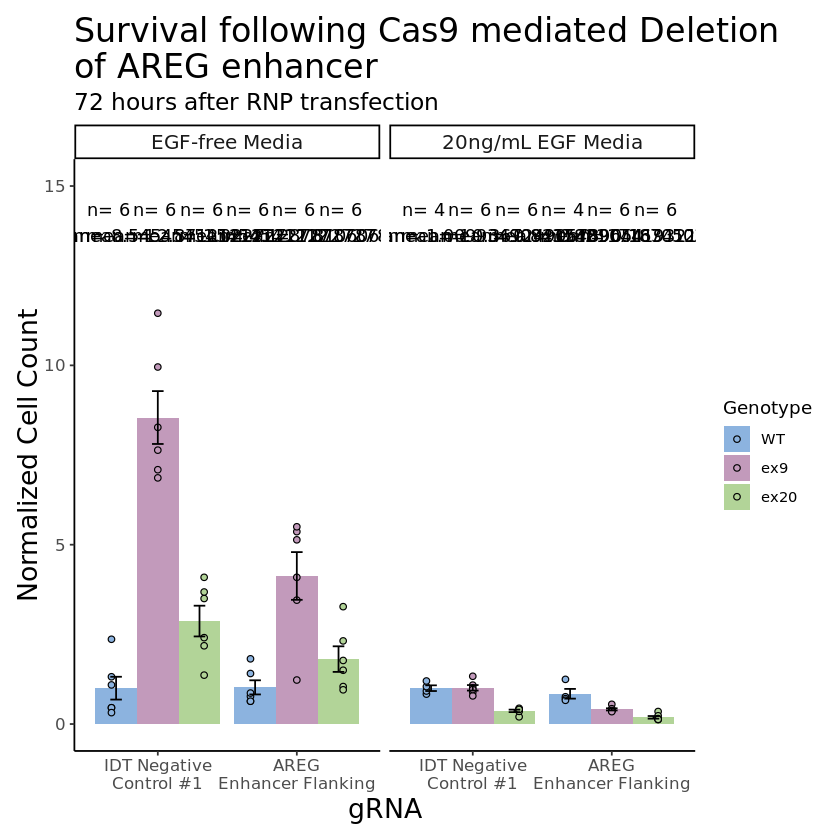

In [100]:
stat_box_data <- function(y, upper_limit = max(clean_df_renorm$relative) * 1.2) {
  return( 
    data.frame(
      y = 14,
      label = paste('n=',length(y),"\n","mean=", mean(y)
                   )))}

p <- clean_df_renorm %>%
     ggplot(aes(x = Treatment, y = renorm)) +
     facet_grid(~Media) +
     geom_bar(aes(fill = Genotype), 
              position = "dodge", stat = "summary") + 
     geom_point(aes(x = Treatment, fill = Genotype), shape = 21, position = position_dodge(width = 1)) +
     ggtitle(label = "Survival following Cas9 mediated Deletion\nof AREG enhancer",
             subtitle = "72 hours after RNP transfection") +
     ylab(label = "Normalized Cell Count") + xlab(label = "gRNA") +
     coord_cartesian(ylim=c(0, 15)) +     
     scale_fill_discrete(labels(c("WT", "E545K", "H1047R"))) +
     scale_fill_manual(values = c("#8CB3DF", "#C29ABB", "#B2D498")) +
     stat_summary(aes(fill = Genotype), 
                  fun.data = stat_box_data, geom = "text", hjust = 0.5, 
                         vjust = 0.52, family = "Arial", size = 3.75, 
                  position = position_dodge(width = 1)) +
     geom_errorbar(aes(fill = Genotype),
         stat = 'summary', position = position_dodge(width = .9), width = .25) +
     theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 16),
                          axis.text = element_text(size = 10),
                          plot.title = element_text(size = 20),
                          plot.subtitle = element_text(size = 14),
                          strip.text = element_text(size = 12),
#                           legend.text = element_text(size = 12),
#                           legend.title = element_text(size = 14),
                          plot.margin = margin(10, 10, 10, 10))
p

Separate Panels

In [101]:
clean_df_0EGF$Media

[1] EGF-free Media EGF-free Media EGF-free Media EGF-free Media EGF-free Media
 [6] EGF-free Media EGF-free Media EGF-free Media EGF-free Media EGF-free Media
[11] EGF-free Media EGF-free Media EGF-free Media EGF-free Media EGF-free Media
[16] EGF-free Media EGF-free Media EGF-free Media EGF-free Media EGF-free Media
[21] EGF-free Media EGF-free Media EGF-free Media EGF-free Media EGF-free Media
[26] EGF-free Media EGF-free Media EGF-free Media EGF-free Media EGF-free Media
[31] EGF-free Media EGF-free Media EGF-free Media EGF-free Media EGF-free Media
[36] EGF-free Media
Levels: EGF-free Media 20ng/mL EGF Media

In [102]:
library(ggplot2)
library(ggpubr)
library(tidyverse)
library(ggpubr)
library(rstatix)

In [103]:
stat.test <- clean_df_EGF_renorm %>%
  group_by(Genotype) %>%
  t_test(renorm ~ Treatment) %>%
  adjust_pvalue(method = "bonferroni") %>%
  add_significance("p.adj")
stat.test <- stat.test %>% mutate(xmin = c(0.7, 1, 1.3)) %>%
             mutate(xmax = c(1.7, 2, 2.3)) %>%
             mutate(y.position = c(1.3, 1.15, 1.02))
stat.test

Genotype,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif,xmin,xmax,y.position
<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
WT,renorm,IDT Negative Control #1,AREG Enhancer Flanking,4,4,0.9947468,4.845878,0.367000,1.000000,ns,0.7,1.7,1.30
ex9,renorm,IDT Negative Control #1,AREG Enhancer Flanking,6,6,7.2706139,6.534500,0.000232,0.000696,***,1.0,2.0,1.15
ex20,renorm,IDT Negative Control #1,AREG Enhancer Flanking,6,6,3.5746764,9.991423,0.005060,0.015180,*,1.3,2.3,1.02


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message in geom_errorbar(aes(fill = Genotype), stat = "summary", position = position_dodge(width = 0.9), :
“Ignoring unknown aesthetics: fill”
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


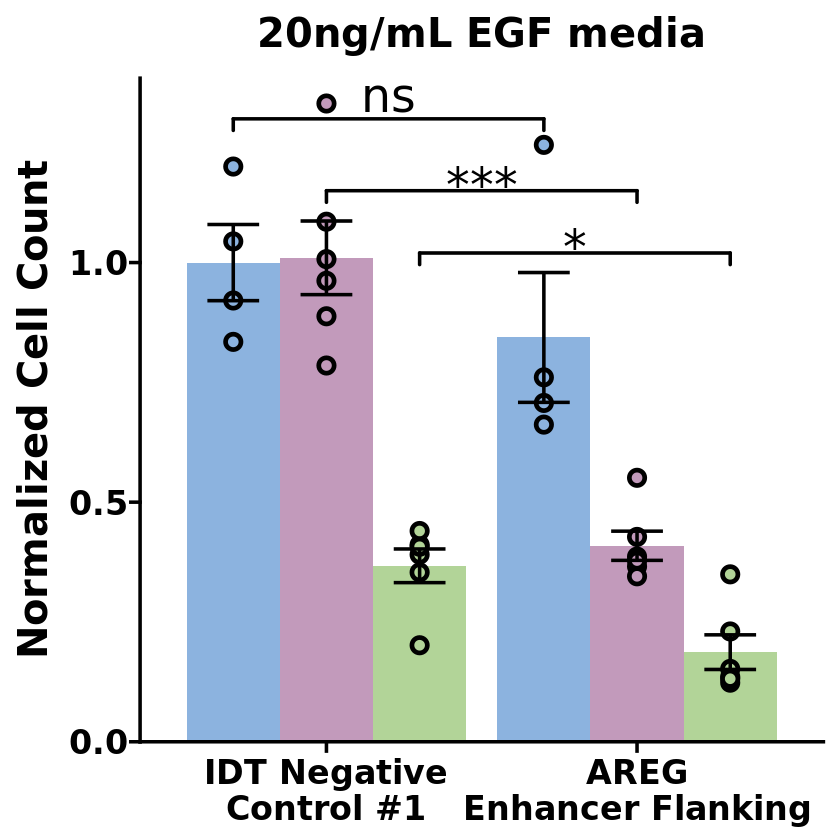

In [104]:
stat_box_data <- function(y, upper_limit = max(clean_df_EGF_renorm$renorm) * 1.1) {
  return( 
    data.frame(
      y = upper_limit,
      label = paste('n =', length(y), '\n',
                    'mean =', round(mean(y), 1), '\n')
    )
  )
}
EGFp <- clean_df_EGF_renorm %>%
     ggplot(aes(x = Treatment, y = renorm)) +
#      facet_grid(~Media) +
     geom_bar(aes(fill = Genotype), 
              position = "dodge", stat = "summary") + 
     geom_point(aes(x = Treatment, fill = Genotype), shape = 21, 
                position = position_dodge(0.9), size = 3, stroke = 2) +
     ggtitle(label = "20ng/mL EGF media") +
     ylab(label = "Normalized Cell Count") + xlab(label = NULL) +
     coord_cartesian(ylim=c(0, max(clean_df_EGF_renorm$relative) * 1.05)) +     
     scale_fill_discrete(labels(c("WT", "E545K", "H1047R"))) +
     scale_fill_manual(values = c("#8CB3DF", "#C29ABB", "#B2D498")) +
#      stat_summary(aes(fill = Genotype), 
#                   fun.data = stat_box_data, geom = "text", hjust = 0.5, 
#                          vjust = 0.52, family = "Arial", size = 6, 
#                   position = position_dodge(width = 1)) +
     geom_errorbar(aes(fill = Genotype),
         stat = 'summary', position = position_dodge(width = .9), width = .5,
                  size = 1) +
    stat_pvalue_manual(stat.test,  label = "p.adj.signif", tip.length = .02, 
                       size = 10, bracket.size = 1) +
    scale_y_continuous(expand = c(0,0)) +
     theme_prism() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 24),
                          axis.text = element_text(size = 20, colour = "black"),
                          plot.title = element_text(size = 24),
                          plot.subtitle = element_text(size = 16, colour = "black"),
                          strip.text = element_text(size = 12),
                          legend.text = element_text(size = 14),
                          legend.title = element_text(size = 16),
                          legend.position = "none",
                          plot.margin = margin(10, 10, 10, 10))
EGFp

In [105]:
# ggsave(filename = "/data/park_lab/adam/figures/EGFp5-17.pdf",
#        plot = EGFp, device = cairo_pdf, width = 8, height = 8)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message in geom_errorbar(aes(fill = Genotype), stat = "summary", position = position_dodge(width = 0.9), :
“Ignoring unknown aesthetics: fill”
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


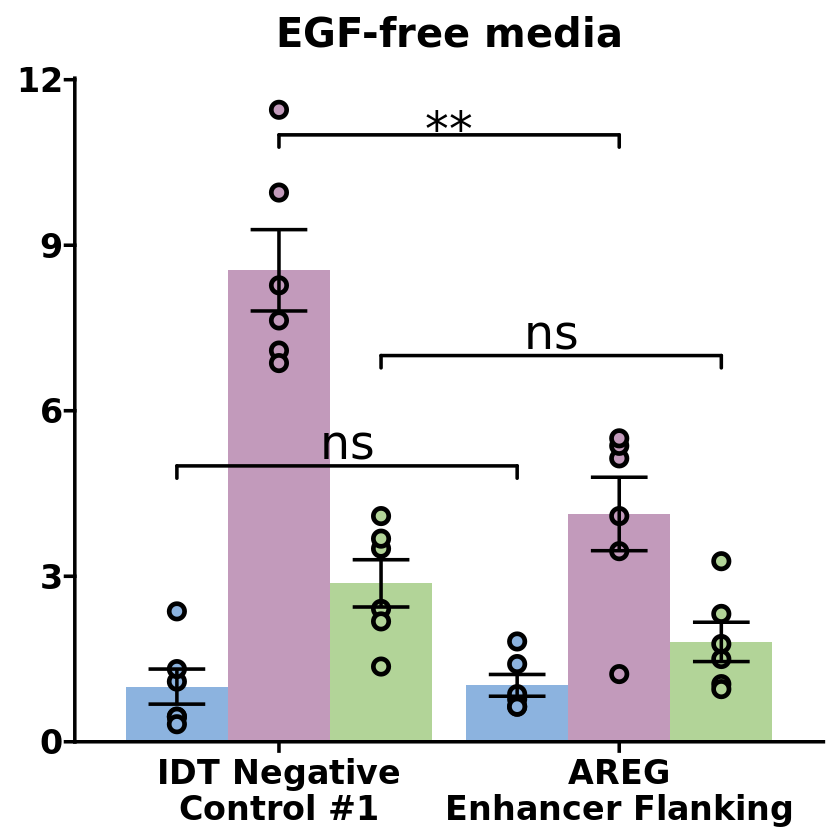

In [106]:

noEGFstat.test <- clean_df_NoEGF_renorm %>%
  group_by(Genotype) %>%
  t_test(renorm ~ Treatment) %>%
  adjust_pvalue(method = "bonferroni") %>%
  add_significance("p.adj")
noEGFstat.test <- noEGFstat.test %>% mutate(xmin = c(0.7, 1, 1.3)) %>%
             mutate(xmax = c(1.7, 2, 2.3)) %>%
             mutate(y.position = c(5, 11, 7))
# stat.test
stat_box_data2 <- function(y, upper_limit = max(clean_df_NoEGF_renorm$renorm) * 1.1) {
  return( 
    data.frame(
      y = upper_limit,
      label = paste('n =', length(y), '\n',
                    'mean =', round(mean(y), 1), '\n')
    )
  )
}
noEGFp <- clean_df_NoEGF_renorm %>%
     ggplot(aes(x = Treatment, y = renorm)) +
#      facet_grid(~Media) +
     geom_bar(aes(fill = Genotype), 
              position = "dodge", stat = "summary") + 
     geom_point(aes(x = Treatment, fill = Genotype), shape = 21, 
                position = position_dodge(0.9), size = 3, stroke = 2) +
     ggtitle(label = "EGF-free media") +
     ylab(label = NULL) + xlab(label = NULL) +
     coord_cartesian(ylim=c(0, max(clean_df_NoEGF_renorm$renorm) * 1.05)) +     
     scale_fill_discrete(labels(c("WT", "E545K", "H1047R"))) +
     scale_fill_manual(values = c("#8CB3DF", "#C29ABB", "#B2D498")) +
#      stat_summary(aes(fill = Genotype), 
#                   fun.data = stat_box_data2, geom = "text", hjust = 0.5, 
#                          vjust = 0.52, family = "Arial", size = 6, 
#                   position = position_dodge(width = 1)) +
     geom_errorbar(aes(fill = Genotype),
         stat = 'summary', position = position_dodge(width = .9), width = .5, size = 1) +
    stat_pvalue_manual(noEGFstat.test,  label = "p.adj.signif", tip.length = .02, 
                       size = 10, bracket.size = 1) +
    scale_y_continuous(expand = c(0,0)) +
     theme_prism() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 24),
                          axis.text = element_text(size = 20, colour = "black"),
                          plot.title = element_text(size = 24),
                          plot.subtitle = element_text(size = 16, colour = "black"),
                          strip.text = element_text(size = 12),
                          legend.text = element_text(size = 14),
                          legend.title = element_text(size = 16),
                          legend.position = "none", 
                          plot.margin = margin(10, 10, 10, 10))
noEGFp

In [108]:
survival_df_4C <- rbind(clean_df_EGF_renorm, clean_df_NoEGF_renorm)
write_csv(survival_df_4C, file = "/data/park_lab/adam/figures/survival_df_4C.csv")

No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Ari

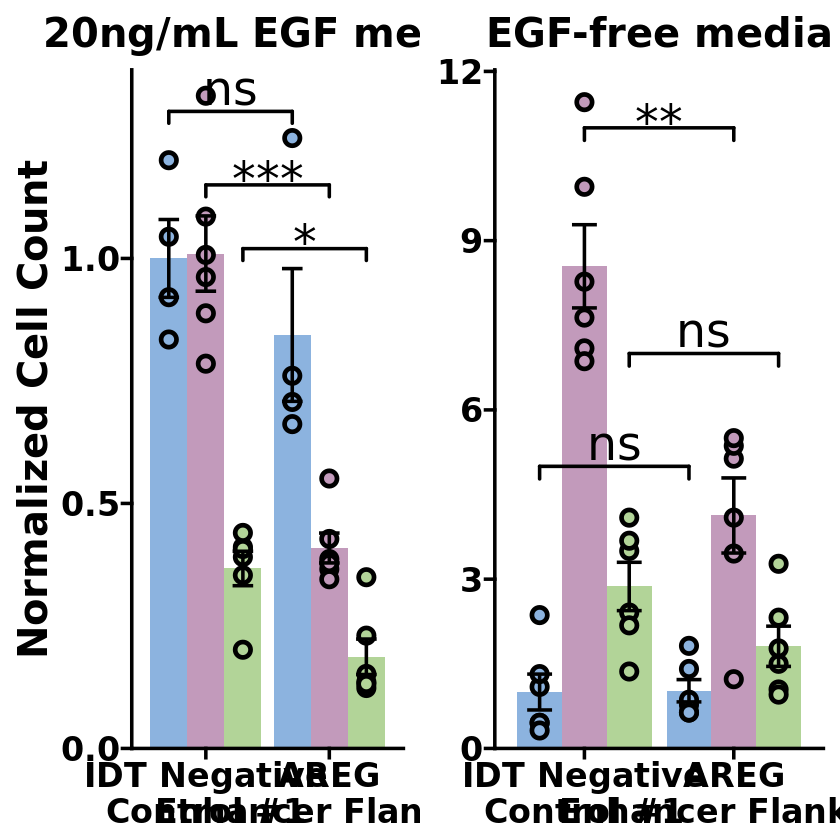

In [107]:
enhCRISPRsurv <- ggarrange(EGFp, noEGFp, ncol = 2, nrow = 1, widths = c(8,8), heights = c(8))
enhCRISPRsurv

In [ ]:
ggsave(filename = "/data/park_lab/adam/figures/enhCRISPRsurv6-6.pdf", plot =enhCRISPRsurv,
       device = cairo_pdf, width = 16, height = 8)

# ggsave(filename="/data/park_lab/adam/figures/AREGEnhDel_Expr4-14.eps", 
#        plot = pres, device = cairo_ps, width = 8, height = 8)

In [ ]:
pres <- Mar13_assay_trim_norm %>% filter(Media == "20ng/mL EGF Media") %>%
     ggplot(aes(x = Treatment, y = relative)) +
#      facet_grid(~Media) +
     geom_bar(aes(fill = Genotype), 
              position = "dodge", stat = "summary") + 
     geom_point(aes(x = Treatment, fill = Genotype), shape = 21, position = position_dodge(width = 1)) +
     ggtitle(label = "Survival following Cas9 mediated Deletion\nof AREG enhancer",
             subtitle = "72 hours after RNP transfection") +
     ylab(label = "Normalized Cell Count") + xlab(label = "gRNA") +
     coord_cartesian(ylim=c(0, 1.8)) +     
     scale_fill_discrete(labels(c("WT", "E545K", "H1047R"))) +
     scale_fill_manual(values = c("#8CB3DF", "#C29ABB", "#B2D498")) +
#      stat_summary(aes(fill = Genotype), 
#                   fun.data = stat_box_data, geom = "text", hjust = 0.5, 
#                          vjust = 0.52, family = "Arial", size = 3.75, 
#                   position = position_dodge(width = 1)) +
     geom_errorbar(aes(fill = Genotype),
         stat = 'summary', position = position_dodge(width = .9), width = .25) +
     theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 16),
                          axis.text = element_text(size = 10),
                          plot.title = element_text(size = 20),
                          plot.subtitle = element_text(size = 14),
                          strip.text = element_text(size = 12),
#                           legend.text = element_text(size = 12),
#                           legend.title = element_text(size = 14),
                          plot.margin = margin(10, 10, 10, 10))
pres

In [ ]:
ggsave(filename="/data/park_lab/adam/figures/EnhDel_surv_4pres4-13.eps", 
       plot = pres, device = cairo_ps, width = 8, height = 8)

In [ ]:
reorderedp <- Mar13_assay_trim_norm %>%
     ggplot(aes(x = Genotype, y = relative)) +
     facet_grid(~Media) +
     geom_bar(aes(fill = Treatment), 
              position = "dodge", stat = "summary") + 
     geom_point(aes(x = Genotype, fill = Treatment), shape = 21, position = position_dodge(width = 1)) +
     ggtitle(label = "Survival following Cas9 mediated Deletion\nof AREG enhancer",
             subtitle = "72 hours after RNP transfection") +
     ylab(label = "Normalized Cell Count") + xlab(label = NULL) +
     coord_cartesian(ylim=c(0, 1.8)) + 
     scale_fill_manual(labels = c("AREG Enhancer\nFlanking",
                                    "Alt-R® Negative\nControl crRNA #1"),
                         values = c("#A7AB5D", "#14B2EB")) +
     stat_compare_means(aes(group = Treatment), size = 8, label = "p.signif", label.y = 1.55) +
     scale_x_discrete(labels = c("WT" = "WT", "ex9" = "E545K", "ex20" = "H1047R")) +
#      stat_summary(aes(fill = Treatment), 
#                   fun.data = stat_box_data, geom = "text", hjust = 0.5, 
#                          vjust = 0.52, family = "Arial", size = 3.75, 
#                   position = position_dodge(width = 1)) +
     geom_errorbar(aes(fill = Treatment),
         stat = 'summary', position = position_dodge(width = .9), width = .25) +
     theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 16),
                          axis.text = element_text(size = 12),
                          plot.title = element_text(size = 20),
                          plot.subtitle = element_text(size = 14),
                          strip.text = element_text(size = 12),
                          legend.text = element_text(size = 12),
                          legend.title = element_text(size = 14),
                          plot.margin = margin(10, 10, 10, 10))
reorderedp

In [ ]:
ggsave(filename="/data/park_lab/adam/figures/Mar13_assay_reordered3-28.eps", 
       plot = reorderedp, device = cairo_ps, width = 8, height = 8)

In [ ]:
ggsave(filename="/data/park_lab/adam/figures/Mar13_assay_trim_norm.eps", 
       plot = p, device = cairo_ps, width = 8, height = 8)

# 3/20 and 3/21 qPCR Results

In [17]:
Mar20Assay <- read_csv("2023-03-20_qPCR.csv") %>% as.data.frame()
Mar21Assay <- read_csv("2023-03-21_qPCR.csv") %>% as.data.frame()
Mar20Assay
Mar21Assay

Rows: 84 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Sample Name, Target Name, Task, Reporter, Quencher, CT
dbl (2): Ct Mean, Ct SD

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 48 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Sample Name, Target Name, Task, Reporter, Quencher, CT

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sample Name,Target Name,Task,Reporter,Quencher,CT,Ct Mean,Ct SD
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
W-,actb,UNKNOWN,SYBR,None,20.160,19.213,1.122
W-,actb,UNKNOWN,SYBR,None,19.506,19.213,1.122
W-,actb,UNKNOWN,SYBR,None,17.973,19.213,1.122
wa,actb,UNKNOWN,SYBR,None,22.163,20.353,1.768
wa,actb,UNKNOWN,SYBR,None,20.264,20.353,1.768
wa,actb,UNKNOWN,SYBR,None,18.631,20.353,1.768
we-,actb,UNKNOWN,SYBR,None,19.787,18.873,0.941
we-,actb,UNKNOWN,SYBR,None,18.458,18.873,0.941
we-,actb,UNKNOWN,SYBR,None,18.384,18.873,0.941


Sample Name,Target Name,Task,Reporter,Quencher,CT
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
20_0-,ACTB,UNKNOWN,SYBR,None,18.876
20_0-,ACTB,UNKNOWN,SYBR,None,17.932
20_0-,ACTB,UNKNOWN,SYBR,None,18.059
20_0-,ACTB,UNKNOWN,SYBR,None,17.681
20_0-,ACTB,UNKNOWN,SYBR,None,17.582
20_0-,ACTB,UNKNOWN,SYBR,None,17.701
20_0a,ACTB,UNKNOWN,SYBR,None,17.926
20_0a,ACTB,UNKNOWN,SYBR,None,17.849
20_0a,ACTB,UNKNOWN,SYBR,None,17.322


In [18]:
Mar20Assay_trim <- Mar20Assay %>% select(c("Sample Name", "Target Name", "CT"))
Mar21Assay_trim <- Mar21Assay %>% select(c("Sample Name", "Target Name", "CT"))
Mar20Assay_trim
Mar21Assay_trim

Sample Name,Target Name,CT
<chr>,<chr>,<chr>
W-,actb,20.160
W-,actb,19.506
W-,actb,17.973
wa,actb,22.163
wa,actb,20.264
wa,actb,18.631
we-,actb,19.787
we-,actb,18.458
we-,actb,18.384


Sample Name,Target Name,CT
<chr>,<chr>,<chr>
20_0-,ACTB,18.876
20_0-,ACTB,17.932
20_0-,ACTB,18.059
20_0-,ACTB,17.681
20_0-,ACTB,17.582
20_0-,ACTB,17.701
20_0a,ACTB,17.926
20_0a,ACTB,17.849
20_0a,ACTB,17.322


In [19]:
###data cleaning
Mar20Assay_trim_actb <- Mar20Assay_trim %>% filter(`Target Name` == "actb") %>%
                        filter(!`CT` == "Undetermined")
Mar20Assay_trim_areg <- Mar20Assay_trim %>% filter(`Target Name` == "areg") %>%
                        filter(!`CT` == "Undetermined")
#calculate CT
Mar20Assay_trim_actb$CT <- Mar20Assay_trim_actb$CT %>% as.numeric()
Mar20Assay_trim_areg$CT <- Mar20Assay_trim_areg$CT %>% as.numeric()
Mar20Assay_trim_areg$deltaCT <- Mar20Assay_trim_areg$CT - Mar20Assay_trim_actb$CT
#add metadata
Mar20Assay_trim_areg$Genotype <- c(rep("WT", 18), rep("ex9", 23)) %>% as.factor()
Mar20Assay_trim_areg$gRNA <- c(rep("negative", 3), rep("areg", 3),
                               rep("negative", 6), rep("areg", 6),
                               rep("negative", 6), rep("areg", 6),
                               rep("negative", 6), rep("areg", 5)) %>% as.factor()
Mar20Assay_trim_areg$Media <- c(rep("0_EGF", 6), rep("EGF", 12),
                                rep("0_EGF", 12), rep("EGF", 11)) %>% as.factor()
Mar20Assay_trim_deltCT <- Mar20Assay_trim_areg

In [20]:
Mar20Assay_trim_deltCT_WT_0EGF <- Mar20Assay_trim_deltCT %>%
                                  filter(Genotype == "WT") %>%
                                  filter(Media == "0_EGF") %>% 
                                  select (!`Target Name`)
Mar20Assay_trim_deltCT_WT_0EGF_neg <- Mar20Assay_trim_deltCT_WT_0EGF %>% 
                                      filter(gRNA == "negative")
Mar20Assay_trim_deltCT_WT_0EGF_areg <- Mar20Assay_trim_deltCT_WT_0EGF %>% 
                                      filter(gRNA == "areg")
Mar20Assay_trim_deltCT_WT_0EGF_areg$deltdeltCT <- Mar20Assay_trim_deltCT_WT_0EGF_areg$CT - mean(Mar20Assay_trim_deltCT_WT_0EGF_neg$CT)
Mar20Assay_trim_deltCT_WT_0EGF_areg

Sample Name,CT,deltaCT,Genotype,gRNA,Media,deltdeltCT
<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>
wa,33.315,11.152,WT,areg,0_EGF,1.4286667
wa,32.781,12.517,WT,areg,0_EGF,0.8946667
wa,30.903,12.272,WT,areg,0_EGF,-0.9833333


In [21]:
Mar20Assay_trim_deltCT_WT_EGF <- Mar20Assay_trim_deltCT %>%
                                  filter(Genotype == "WT") %>%
                                  filter(Media == "EGF") %>% 
                                  select (!`Target Name`)
Mar20Assay_trim_deltCT_WT_EGF_neg <- Mar20Assay_trim_deltCT_WT_EGF %>% 
                                      filter(gRNA == "negative")
Mar20Assay_trim_deltCT_WT_EGF_areg <- Mar20Assay_trim_deltCT_WT_EGF %>% 
                                      filter(gRNA == "areg")
Mar20Assay_trim_deltCT_WT_EGF_areg$deltdeltCT <- Mar20Assay_trim_deltCT_WT_EGF_areg$CT - mean(Mar20Assay_trim_deltCT_WT_EGF_neg$CT)
Mar20Assay_trim_deltCT_WT_EGF_areg

Sample Name,CT,deltaCT,Genotype,gRNA,Media,deltdeltCT
<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>
wea,27.032,9.038,WT,areg,EGF,0.4635
wea,27.780,9.156,WT,areg,EGF,1.2115
wea,29.036,6.932,WT,areg,EGF,2.4675
wea,29.243,6.932,WT,areg,EGF,2.6745
wea,30.016,7.032,WT,areg,EGF,3.4475
wea,29.973,6.733,WT,areg,EGF,3.4045


In [22]:
Mar20Assay_trim_deltCT_ex9_0EGF <- Mar20Assay_trim_deltCT %>%
                                  filter(Genotype == "ex9") %>%
                                  filter(Media == "0_EGF") %>% 
                                  select (!`Target Name`)
Mar20Assay_trim_deltCT_ex9_0EGF_neg <- Mar20Assay_trim_deltCT_ex9_0EGF %>% 
                                      filter(gRNA == "negative")
Mar20Assay_trim_deltCT_ex9_0EGF_areg <- Mar20Assay_trim_deltCT_ex9_0EGF %>% 
                                      filter(gRNA == "areg")
Mar20Assay_trim_deltCT_ex9_0EGF_areg$deltdeltCT <- Mar20Assay_trim_deltCT_ex9_0EGF_areg$CT - mean(Mar20Assay_trim_deltCT_ex9_0EGF_neg$CT)
Mar20Assay_trim_deltCT_ex9_0EGF_areg

Sample Name,CT,deltaCT,Genotype,gRNA,Media,deltdeltCT
<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>
9a,31.426,6.803,ex9,areg,0_EGF,4.3548333
9a,30.851,7.029,ex9,areg,0_EGF,3.7798333
9a,26.564,7.866,ex9,areg,0_EGF,-0.5071667
9a,28.061,6.968,ex9,areg,0_EGF,0.9898333
9a,29.453,6.623,ex9,areg,0_EGF,2.3818333
9a,28.841,6.587,ex9,areg,0_EGF,1.7698333


In [23]:
Mar20Assay_trim_deltCT_ex9_EGF <- Mar20Assay_trim_deltCT %>%
                                  filter(Genotype == "ex9") %>%
                                  filter(Media == "EGF") %>% 
                                  select (!`Target Name`)
Mar20Assay_trim_deltCT_ex9_EGF_neg <- Mar20Assay_trim_deltCT_ex9_EGF %>% 
                                      filter(gRNA == "negative")
Mar20Assay_trim_deltCT_ex9_EGF_areg <- Mar20Assay_trim_deltCT_ex9_EGF %>% 
                                      filter(gRNA == "areg")
Mar20Assay_trim_deltCT_ex9_EGF_areg
Mar20Assay_trim_deltCT_ex9_EGF_neg
Mar20Assay_trim_deltCT_ex9_EGF_areg$deltdeltCT <- Mar20Assay_trim_deltCT_ex9_EGF_areg$CT - mean(Mar20Assay_trim_deltCT_ex9_EGF_neg$CT)
Mar20Assay_trim_deltCT_ex9_EGF_areg

Sample Name,CT,deltaCT,Genotype,gRNA,Media
<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>
9ea,26.397,7.124,ex9,areg,EGF
9ea,25.777,6.786,ex9,areg,EGF
9ea,26.730,7.383,ex9,areg,EGF
9ea,27.653,5.422,ex9,areg,EGF
9ea,28.499,5.945,ex9,areg,EGF


Sample Name,CT,deltaCT,Genotype,gRNA,Media
<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>
9e-,25.983,3.952,ex9,negative,EGF
9e-,26.139,3.466,ex9,negative,EGF
9e-,23.790,5.584,ex9,negative,EGF
9e-,25.061,6.477,ex9,negative,EGF
9e-,26.114,6.589,ex9,negative,EGF
9e-,24.855,6.173,ex9,negative,EGF


Sample Name,CT,deltaCT,Genotype,gRNA,Media,deltdeltCT
<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>
9ea,26.397,7.124,ex9,areg,EGF,1.0733333
9ea,25.777,6.786,ex9,areg,EGF,0.4533333
9ea,26.730,7.383,ex9,areg,EGF,1.4063333
9ea,27.653,5.422,ex9,areg,EGF,2.3293333
9ea,28.499,5.945,ex9,areg,EGF,3.1753333


In [24]:
table2plot_WTex9 <- rbind(Mar20Assay_trim_deltCT_WT_0EGF_areg, Mar20Assay_trim_deltCT_WT_EGF_areg,
                          Mar20Assay_trim_deltCT_ex9_0EGF_areg, Mar20Assay_trim_deltCT_ex9_EGF_areg)
table2plot_WTex9

Sample Name,CT,deltaCT,Genotype,gRNA,Media,deltdeltCT
<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>
wa,33.315,11.152,WT,areg,0_EGF,1.4286667
wa,32.781,12.517,WT,areg,0_EGF,0.8946667
wa,30.903,12.272,WT,areg,0_EGF,-0.9833333
wea,27.032,9.038,WT,areg,EGF,0.4635000
wea,27.780,9.156,WT,areg,EGF,1.2115000
wea,29.036,6.932,WT,areg,EGF,2.4675000
wea,29.243,6.932,WT,areg,EGF,2.6745000
wea,30.016,7.032,WT,areg,EGF,3.4475000
wea,29.973,6.733,WT,areg,EGF,3.4045000


In [25]:
table2plot_WTex9$log2FC <- 2^(-table2plot_WTex9$deltdeltCT)
table2plot_WTex9

Sample Name,CT,deltaCT,Genotype,gRNA,Media,deltdeltCT,log2FC
<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>
wa,33.315,11.152,WT,areg,0_EGF,1.4286667,0.37147405
wa,32.781,12.517,WT,areg,0_EGF,0.8946667,0.53787146
wa,30.903,12.272,WT,areg,0_EGF,-0.9833333,1.97702804
wea,27.032,9.038,WT,areg,EGF,0.4635000,0.72522472
wea,27.780,9.156,WT,areg,EGF,1.2115000,0.43181941
wea,29.036,6.932,WT,areg,EGF,2.4675000,0.18080419
wea,29.243,6.932,WT,areg,EGF,2.6745000,0.15663733
wea,30.016,7.032,WT,areg,EGF,3.4475000,0.09166406
wea,29.973,6.733,WT,areg,EGF,3.4045000,0.09443726


No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


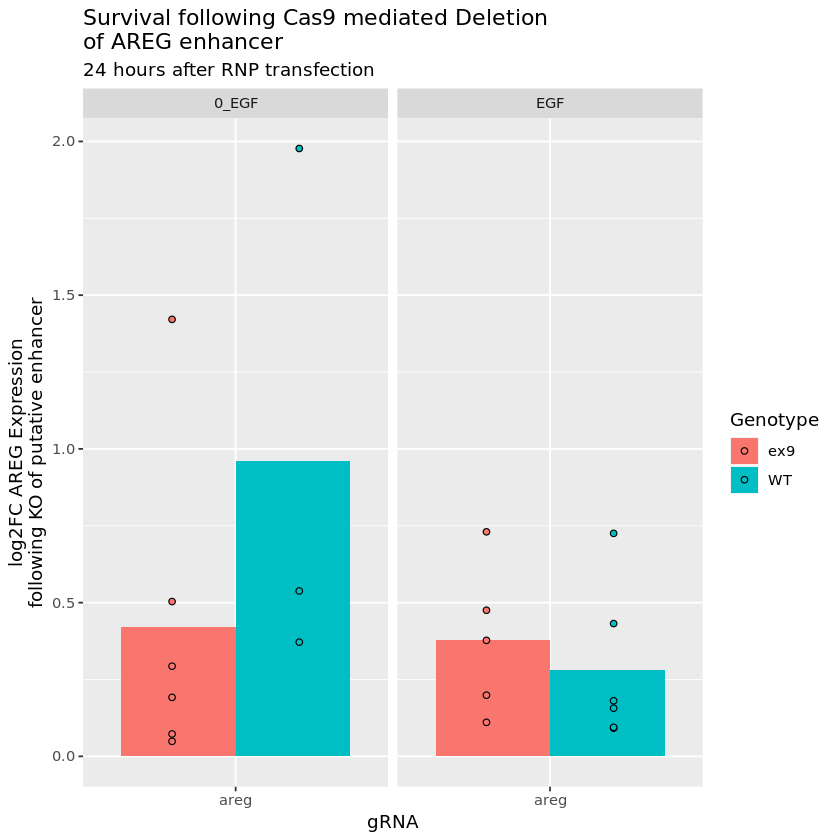

In [26]:
prelim_plot <- table2plot_WTex9 %>%
ggplot(aes(x = gRNA, y = log2FC)) +
     facet_grid(~Media) +
     geom_bar(aes(fill = Genotype), 
              position = "dodge", stat = "summary") + 
     geom_point(aes(x = gRNA, fill = Genotype), shape = 21, position = position_dodge(width = 1)) +
     ggtitle(label = "Survival following Cas9 mediated Deletion\nof AREG enhancer",
             subtitle = "24 hours after RNP transfection") +
     ylab(label = "log2FC AREG Expression\nfollowing KO of putative enhancer") + 
     xlab(label = "gRNA")
#      coord_cartesian(ylim=c(0, 1.8)) +     
#      scale_fill_discrete(labels(c("WT", "E545K"))) +
#      scale_fill_manual(values = c("#8CB3DF", "#C29ABB", "#B2D498")) +
#      stat_summary(aes(fill = Genotype), 
#                   fun.data = stat_box_data, geom = "text", hjust = 0.5, 
#                          vjust = 0.52, family = "Arial", size = 3.75, 
#                   position = position_dodge(width = 1)) +
#      geom_errorbar(aes(fill = Genotype),
#          stat = 'summary', position = position_dodge(width = .9), width = .25) +
#      theme_classic() + theme(text = element_text(family = "Arial"),
#                           axis.title = element_text(size = 16),
#                           axis.text = element_text(size = 10),
#                           plot.title = element_text(size = 20),
#                           plot.subtitle = element_text(size = 14),
#                           strip.text = element_text(size = 12),
# #                           legend.text = element_text(size = 12),
# #                           legend.title = element_text(size = 14),
#                           plot.margin = margin(10, 10, 10, 10))
prelim_plot

In [27]:
Mar21Assay_trim

Sample Name,Target Name,CT
<chr>,<chr>,<chr>
20_0-,ACTB,18.876
20_0-,ACTB,17.932
20_0-,ACTB,18.059
20_0-,ACTB,17.681
20_0-,ACTB,17.582
20_0-,ACTB,17.701
20_0a,ACTB,17.926
20_0a,ACTB,17.849
20_0a,ACTB,17.322


## Delta delta CT method

In [28]:
###data cleaning
Mar21Assay_trim_actb <- Mar21Assay_trim %>% filter(`Target Name` == "ACTB") %>%
                        filter(!row_number()==1)
Mar21Assay_trim_areg <- Mar21Assay_trim %>% filter(`Target Name` == "AREG") %>%
                        filter(!`CT` == "Undetermined")
str(Mar21Assay_trim_actb)
str(Mar21Assay_trim_areg)
#calculate CT
Mar21Assay_trim_actb$CT <- Mar21Assay_trim_actb$CT %>% as.numeric()
Mar21Assay_trim_areg$CT <- Mar21Assay_trim_areg$CT %>% as.numeric()
Mar21Assay_trim_areg$deltaCT <- Mar21Assay_trim_areg$CT - Mar21Assay_trim_actb$CT
#add metadata
Mar21Assay_trim_areg$Genotype <- c(rep("ex20", 23)) %>% as.factor()
Mar21Assay_trim_areg$gRNA <- c(rep("negative", 5), rep("areg", 6),
                               rep("negative", 6), rep("areg", 6)) %>% as.factor()
Mar21Assay_trim_areg$Media <- c(rep("0_EGF", 11), rep("EGF", 12)) %>% as.factor()
Mar21Assay_trim_deltCT <- Mar21Assay_trim_areg
Mar21Assay_trim_deltCT

'data.frame':	23 obs. of  3 variables:
 $ Sample Name: chr  "20_0-" "20_0-" "20_0-" "20_0-" ...
 $ Target Name: chr  "ACTB" "ACTB" "ACTB" "ACTB" ...
 $ CT         : chr  "17.932" "18.059" "17.681" "17.582" ...
'data.frame':	23 obs. of  3 variables:
 $ Sample Name: chr  "20_0-" "20_0-" "20_0-" "20_0-" ...
 $ Target Name: chr  "AREG" "AREG" "AREG" "AREG" ...
 $ CT         : chr  "25.981" "27.651" "25.643" "26.486" ...


Sample Name,Target Name,CT,deltaCT,Genotype,gRNA,Media
<chr>,<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>
20_0-,AREG,25.981,8.049,ex20,negative,0_EGF
20_0-,AREG,27.651,9.592,ex20,negative,0_EGF
20_0-,AREG,25.643,7.962,ex20,negative,0_EGF
20_0-,AREG,26.486,8.904,ex20,negative,0_EGF
20_0-,AREG,25.848,8.147,ex20,negative,0_EGF
20_0a,AREG,27.985,10.059,ex20,areg,0_EGF
20_0a,AREG,27.957,10.108,ex20,areg,0_EGF
20_0a,AREG,27.428,10.106,ex20,areg,0_EGF
20_0a,AREG,27.921,9.947,ex20,areg,0_EGF


In [29]:
Mar21Assay_trim_deltCT_ex20_EGF <- Mar21Assay_trim_deltCT %>%
                                  filter(Media == "EGF") %>% 
                                  select (!`Target Name`)
Mar21Assay_trim_deltCT_ex20_EGF_neg <- Mar21Assay_trim_deltCT_ex20_EGF %>% 
                                      filter(gRNA == "negative")
Mar21Assay_trim_deltCT_ex20_EGF_areg <- Mar21Assay_trim_deltCT_ex20_EGF %>% 
                                      filter(gRNA == "areg")
Mar21Assay_trim_deltCT_ex20_EGF_areg
Mar21Assay_trim_deltCT_ex20_EGF_neg
Mar21Assay_trim_deltCT_ex20_EGF_areg$deltdeltCT <- Mar21Assay_trim_deltCT_ex20_EGF_areg$CT - mean(Mar21Assay_trim_deltCT_ex20_EGF_neg$CT)
Mar21Assay_trim_deltCT_ex20_EGF_areg

Sample Name,CT,deltaCT,Genotype,gRNA,Media
<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>
20ea,27.284,8.433,ex20,areg,EGF
20ea,27.206,8.311,ex20,areg,EGF
20ea,26.713,8.054,ex20,areg,EGF
20ea,26.241,8.221,ex20,areg,EGF
20ea,27.900,8.336,ex20,areg,EGF
20ea,27.893,8.329,ex20,areg,EGF


Sample Name,CT,deltaCT,Genotype,gRNA,Media
<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>
20e-,26.677,6.220,ex20,negative,EGF
20e-,25.956,6.349,ex20,negative,EGF
20e-,25.956,6.972,ex20,negative,EGF
20e-,25.857,7.056,ex20,negative,EGF
20e-,25.994,7.317,ex20,negative,EGF
20e-,25.493,6.919,ex20,negative,EGF


Sample Name,CT,deltaCT,Genotype,gRNA,Media,deltdeltCT
<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>
20ea,27.284,8.433,ex20,areg,EGF,1.2951667
20ea,27.206,8.311,ex20,areg,EGF,1.2171667
20ea,26.713,8.054,ex20,areg,EGF,0.7241667
20ea,26.241,8.221,ex20,areg,EGF,0.2521667
20ea,27.900,8.336,ex20,areg,EGF,1.9111667
20ea,27.893,8.329,ex20,areg,EGF,1.9041667


In [30]:
Mar21Assay_trim_deltCT_ex20_0EGF <- Mar21Assay_trim_deltCT %>%
                                  filter(Media == "0_EGF") %>% 
                                  select (!`Target Name`)
Mar21Assay_trim_deltCT_ex20_0EGF_neg <- Mar21Assay_trim_deltCT_ex20_0EGF %>% 
                                      filter(gRNA == "negative")
Mar21Assay_trim_deltCT_ex20_0EGF_areg <- Mar21Assay_trim_deltCT_ex20_0EGF %>% 
                                      filter(gRNA == "areg")
Mar21Assay_trim_deltCT_ex20_0EGF_areg$deltdeltCT <- Mar21Assay_trim_deltCT_ex20_0EGF_areg$CT - mean(Mar21Assay_trim_deltCT_ex20_0EGF_neg$CT)
Mar21Assay_trim_deltCT_ex20_0EGF_areg

Sample Name,CT,deltaCT,Genotype,gRNA,Media,deltdeltCT
<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>
20_0a,27.985,10.059,ex20,areg,0_EGF,1.6632
20_0a,27.957,10.108,ex20,areg,0_EGF,1.6352
20_0a,27.428,10.106,ex20,areg,0_EGF,1.1062
20_0a,27.921,9.947,ex20,areg,0_EGF,1.5992
20_0a,28.518,8.425,ex20,areg,0_EGF,2.1962
20_0a,28.829,7.993,ex20,areg,0_EGF,2.5072


In [31]:
table2plot_ex20 <- rbind(Mar21Assay_trim_deltCT_ex20_EGF_areg,
                         Mar21Assay_trim_deltCT_ex20_0EGF_areg)

table2plot_ex20$log2FC <- 2^(-table2plot_ex20$deltdeltCT)
table2plot_ex20

Sample Name,CT,deltaCT,Genotype,gRNA,Media,deltdeltCT,log2FC
<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>
20ea,27.284,8.433,ex20,areg,EGF,1.2951667,0.4074891
20ea,27.206,8.311,ex20,areg,EGF,1.2171667,0.4301266
20ea,26.713,8.054,ex20,areg,EGF,0.7241667,0.6053466
20ea,26.241,8.221,ex20,areg,EGF,0.2521667,0.8396345
20ea,27.900,8.336,ex20,areg,EGF,1.9111667,0.2658775
20ea,27.893,8.329,ex20,areg,EGF,1.9041667,0.2671706
20_0a,27.985,10.059,ex20,areg,0_EGF,1.6632000,0.3157380
20_0a,27.957,10.108,ex20,areg,0_EGF,1.6352000,0.3219258
20_0a,27.428,10.106,ex20,areg,0_EGF,1.1062000,0.4645159


In [32]:
table2plot_total <- rbind(table2plot_WTex9, table2plot_ex20)

In [33]:
table2plot_total

Sample Name,CT,deltaCT,Genotype,gRNA,Media,deltdeltCT,log2FC
<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>
wa,33.315,11.152,WT,areg,0_EGF,1.4286667,0.37147405
wa,32.781,12.517,WT,areg,0_EGF,0.8946667,0.53787146
wa,30.903,12.272,WT,areg,0_EGF,-0.9833333,1.97702804
wea,27.032,9.038,WT,areg,EGF,0.4635000,0.72522472
wea,27.780,9.156,WT,areg,EGF,1.2115000,0.43181941
wea,29.036,6.932,WT,areg,EGF,2.4675000,0.18080419
wea,29.243,6.932,WT,areg,EGF,2.6745000,0.15663733
wea,30.016,7.032,WT,areg,EGF,3.4475000,0.09166406
wea,29.973,6.733,WT,areg,EGF,3.4045000,0.09443726


In [34]:
table2plot_total$Genotype <- relevel(table2plot_total$Genotype, "WT")
table2plot_total$Genotype

[1] WT   WT   WT   WT   WT   WT   WT   WT   WT   ex9  ex9  ex9  ex9  ex9  ex9 
[16] ex9  ex9  ex9  ex9  ex9  ex20 ex20 ex20 ex20 ex20 ex20 ex20 ex20 ex20 ex20
[31] ex20 ex20
Levels: WT ex9 ex20

In [35]:
table2plot_total

Sample Name,CT,deltaCT,Genotype,gRNA,Media,deltdeltCT,log2FC
<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>
wa,33.315,11.152,WT,areg,0_EGF,1.4286667,0.37147405
wa,32.781,12.517,WT,areg,0_EGF,0.8946667,0.53787146
wa,30.903,12.272,WT,areg,0_EGF,-0.9833333,1.97702804
wea,27.032,9.038,WT,areg,EGF,0.4635000,0.72522472
wea,27.780,9.156,WT,areg,EGF,1.2115000,0.43181941
wea,29.036,6.932,WT,areg,EGF,2.4675000,0.18080419
wea,29.243,6.932,WT,areg,EGF,2.6745000,0.15663733
wea,30.016,7.032,WT,areg,EGF,3.4475000,0.09166406
wea,29.973,6.733,WT,areg,EGF,3.4045000,0.09443726


Warning message in geom_errorbar(aes(fill = Genotype), stat = "summary", position = position_dodge(width = 0.9), :
“Ignoring unknown aesthetics: fill”
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


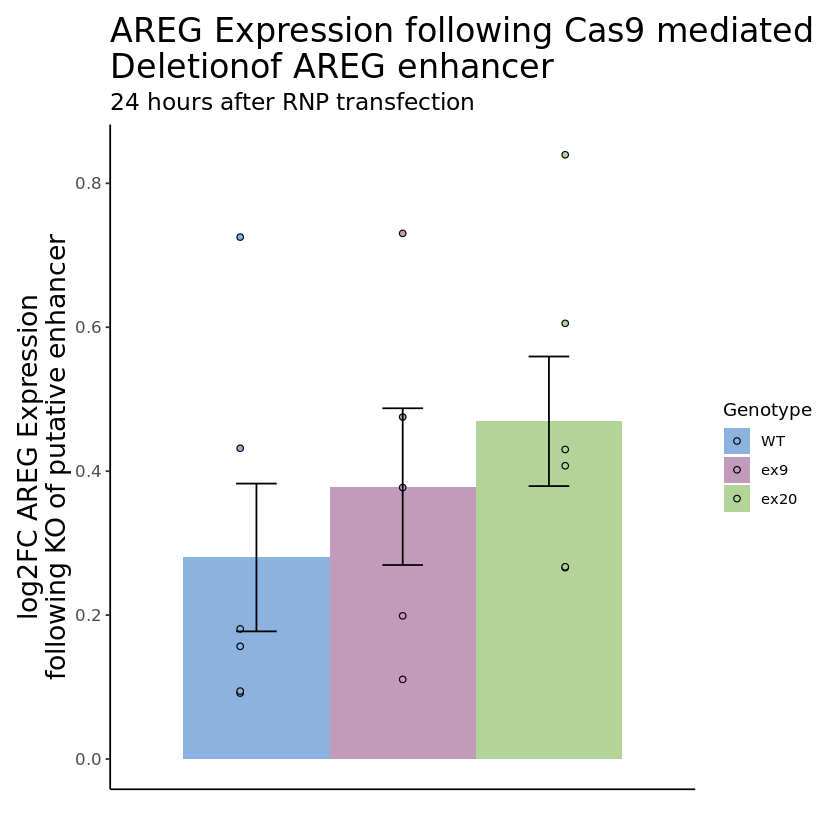

In [36]:
total_plot <- table2plot_total %>% filter(Media == "EGF") %>%
ggplot(aes(x = gRNA, y = log2FC)) +
#      facet_grid(~Media) +
     geom_bar(aes(fill = Genotype), 
              position = "dodge", stat = "summary") + 
     geom_point(aes(x = gRNA, fill = Genotype), shape = 21, position = position_dodge(width = 1)) +
     ggtitle(label = "AREG Expression following Cas9 mediated\nDeletionof AREG enhancer",
             subtitle = "24 hours after RNP transfection") +
     ylab(label = "log2FC AREG Expression\nfollowing KO of putative enhancer") + 
     xlab(label = "") +
#      coord_cartesian(ylim=c(0, 1.8)) +     
     scale_fill_manual(values = c("#8CB3DF", "#C29ABB", "#B2D498")) +
#      stat_summary(aes(fill = Genotype), 
#                   fun.data = stat_box_data, geom = "text", hjust = 0.5, 
#                          vjust = 0.52, family = "Arial", size = 3.75, 
#                   position = position_dodge(width = 1)) +
     geom_errorbar(aes(fill = Genotype),
         stat = 'summary', position = position_dodge(width = .9), width = .25) +
     theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 16),
                          axis.text = element_text(size = 10),
                          axis.text.x = element_blank(),
                          axis.ticks.x=element_blank(),
                          plot.title = element_text(size = 20),
                          plot.subtitle = element_text(size = 14),
                          strip.text = element_text(size = 12),

#                           legend.text = element_text(size = 12),
#                           legend.title = element_text(size = 14),
                          plot.margin = margin(10, 10, 10, 10))
total_plot

In [37]:
ggsave(filename="/data/park_lab/adam/figures/AREG_FC_4-13.eps", 
       plot = total_plot, device = cairo_ps, width = 8, height = 8)

No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


## Relative Expression

In [38]:
str(Mar20Assay_trim)
str(Mar21Assay_trim)

'data.frame':	84 obs. of  3 variables:
 $ Sample Name: chr  "W-" "W-" "W-" "wa" ...
 $ Target Name: chr  "actb" "actb" "actb" "actb" ...
 $ CT         : chr  "20.160" "19.506" "17.973" "22.163" ...
'data.frame':	48 obs. of  3 variables:
 $ Sample Name: chr  "20_0-" "20_0-" "20_0-" "20_0-" ...
 $ Target Name: chr  "ACTB" "ACTB" "ACTB" "ACTB" ...
 $ CT         : chr  "18.876" "17.932" "18.059" "17.681" ...


In [39]:
total_trim_df <- rbind(Mar20Assay_trim, Mar21Assay_trim)
str(total_trim_df)

'data.frame':	132 obs. of  3 variables:
 $ Sample Name: chr  "W-" "W-" "W-" "wa" ...
 $ Target Name: chr  "actb" "actb" "actb" "actb" ...
 $ CT         : chr  "20.160" "19.506" "17.973" "22.163" ...


In [40]:
total_trim_df[total_trim_df=="ACTB"] <- "actb"
total_trim_df[total_trim_df=="AREG"] <- "areg"
total_trim_df

Sample Name,Target Name,CT
<chr>,<chr>,<chr>
W-,actb,20.160
W-,actb,19.506
W-,actb,17.973
wa,actb,22.163
wa,actb,20.264
wa,actb,18.631
we-,actb,19.787
we-,actb,18.458
we-,actb,18.384


In [41]:
total_trim_df_actb <- total_trim_df %>%
                      filter(`Target Name` == "actb")
total_trim_df_areg <- total_trim_df %>%
                      filter(`Target Name` == "areg")
total_trim_df_actb
total_trim_df_areg

Sample Name,Target Name,CT
<chr>,<chr>,<chr>
W-,actb,20.160
W-,actb,19.506
W-,actb,17.973
wa,actb,22.163
wa,actb,20.264
wa,actb,18.631
we-,actb,19.787
we-,actb,18.458
we-,actb,18.384


Sample Name,Target Name,CT
<chr>,<chr>,<chr>
W-,areg,33.347
W-,areg,31.841
W-,areg,30.471
wa,areg,33.315
wa,areg,32.781
wa,areg,30.903
we-,areg,27.254
we-,areg,27.369
we-,areg,26.507


In [42]:
total_trim_df_actb$AREG_CT <- total_trim_df_areg$CT
total_trim_df_actb

Sample Name,Target Name,CT,AREG_CT
<chr>,<chr>,<chr>,<chr>
W-,actb,20.160,33.347
W-,actb,19.506,31.841
W-,actb,17.973,30.471
wa,actb,22.163,33.315
wa,actb,20.264,32.781
wa,actb,18.631,30.903
we-,actb,19.787,27.254
we-,actb,18.458,27.369
we-,actb,18.384,26.507


In [43]:
total_trim_relex<-total_trim_df_actb[!(total_trim_df_actb$CT=="Undetermined" | total_trim_df_actb$AREG_CT=="Undetermined"),]
total_trim_relex

,Sample Name,Target Name,CT,AREG_CT
,<chr>,<chr>,<chr>,<chr>
1,W-,actb,20.160,33.347
2,W-,actb,19.506,31.841
3,W-,actb,17.973,30.471
4,wa,actb,22.163,33.315
5,wa,actb,20.264,32.781
6,wa,actb,18.631,30.903
7,we-,actb,19.787,27.254
8,we-,actb,18.458,27.369
9,we-,actb,18.384,26.507


In [44]:
total_trim_relex$CT <- as.numeric(total_trim_relex$CT)
total_trim_relex$AREG_CT <- as.numeric(total_trim_relex$AREG_CT)

In [45]:
total_trim_relex$relexp <- (40 - total_trim_relex$`AREG_CT`)/(40 - total_trim_relex$`CT`)
total_trim_relex

,Sample Name,Target Name,CT,AREG_CT,relexp
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,W-,actb,20.160,33.347,0.3353327
2,W-,actb,19.506,31.841,0.3981165
3,W-,actb,17.973,30.471,0.4326054
4,wa,actb,22.163,33.315,0.3747828
5,wa,actb,20.264,32.781,0.3657783
6,wa,actb,18.631,30.903,0.4257101
7,we-,actb,19.787,27.254,0.6305843
8,we-,actb,18.458,27.369,0.5863430
9,we-,actb,18.384,26.507,0.6242135


In [46]:
total_trim_relex$`Sample Name`

[1] "W-"    "W-"    "W-"    "wa"    "wa"    "wa"    "we-"   "we-"   "we-"  
[10] "we-"   "we-"   "we-"   "wea"   "wea"   "wea"   "wea"   "wea"   "wea"  
[19] "9-"    "9-"    "9-"    "9-"    "9-"    "9-"    "9a"    "9a"    "9a"   
[28] "9a"    "9a"    "9a"    "9e-"   "9e-"   "9e-"   "9e-"   "9e-"   "9e-"  
[37] "9ea"   "9ea"   "9ea"   "9ea"   "9ea"   "20_0-" "20_0-" "20_0-" "20_0-"
[46] "20_0-" "20_0a" "20_0a" "20_0a" "20_0a" "20_0a" "20_0a" "20e-"  "20e-" 
[55] "20e-"  "20e-"  "20e-"  "20e-"  "20ea"  "20ea"  "20ea"  "20ea"  "20ea" 
[64] "20ea"

In [47]:
total_trim_relex$Genotype <- c(rep("WT", 18), rep("ex9", 23), rep("ex20", 23))
total_trim_relex$Media <- c(rep("0EGF", 6), rep("EGF", 12), 
                            rep("0EGF", 12), rep("EGF", 11),
                            rep("0EGF", 11), rep("EGF", 12))
total_trim_relex$gRNA <- c(rep("negative", 3), rep("areg", 3), 
                           rep("negative", 6), rep("areg", 6),
                           rep("negative", 6), rep("areg", 6),
                           rep("negative", 6), rep("areg", 5),
                           rep("negative", 5), rep("areg", 6),
                           rep("negative", 6), rep("areg", 6))

In [48]:
total_trim_relex

,Sample Name,Target Name,CT,AREG_CT,relexp,Genotype,Media,gRNA
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,W-,actb,20.160,33.347,0.3353327,WT,0EGF,negative
2,W-,actb,19.506,31.841,0.3981165,WT,0EGF,negative
3,W-,actb,17.973,30.471,0.4326054,WT,0EGF,negative
4,wa,actb,22.163,33.315,0.3747828,WT,0EGF,areg
5,wa,actb,20.264,32.781,0.3657783,WT,0EGF,areg
6,wa,actb,18.631,30.903,0.4257101,WT,0EGF,areg
7,we-,actb,19.787,27.254,0.6305843,WT,EGF,negative
8,we-,actb,18.458,27.369,0.5863430,WT,EGF,negative
9,we-,actb,18.384,26.507,0.6242135,WT,EGF,negative


### Relative expression Figure

In [49]:
library(ggbreak)
library(ggpubr)

ggbreak v0.1.1

If you use ggbreak in published research, please cite the following
paper:

S Xu, M Chen, T Feng, L Zhan, L Zhou, G Yu. Use ggbreak to effectively
utilize plotting space to deal with large datasets and outliers.
Frontiers in Genetics. 2021, 12:774846. doi: 10.3389/fgene.2021.774846




In [50]:
total_trim_relex$Genotype <- factor(total_trim_relex$Genotype,
                                    levels = c("WT", "ex9", "ex20"))
total_trim_relex$Media <- total_trim_relex$Media %>% as.factor() %>%
                               recode_factor("0EGF" = "EGF-free Media", 
                               "EGF" = "20ng/mL EGF Media")

Warning message in geom_errorbar(aes(fill = gRNA), stat = "summary", position = position_dodge(width = 0.9), :
“Ignoring unknown aesthetics: fill”
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


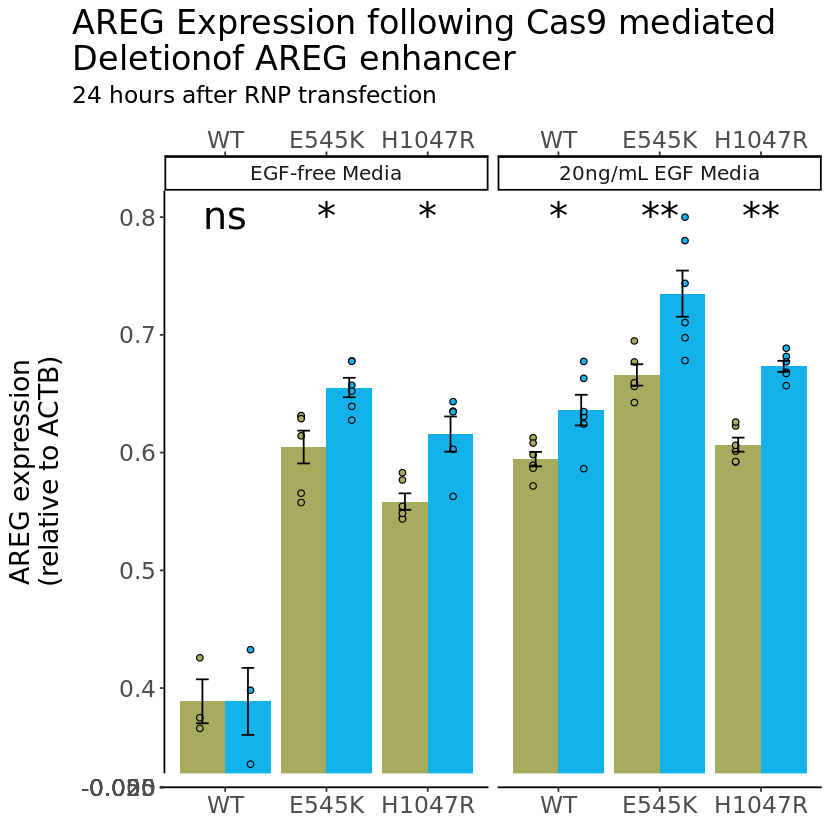

In [51]:
total_plot_relex <- total_trim_relex %>%
ggplot(aes(x = Genotype, y = relexp)) +
     facet_grid(~Media) +
     geom_bar(aes(fill = gRNA), 
              position = "dodge", stat = "summary") + 
     geom_point(aes(x = Genotype, fill = gRNA), shape = 21, 
                position = position_dodge(width = 1)) +
     ggtitle(label = "AREG Expression following Cas9 mediated\nDeletionof AREG enhancer",
             subtitle = "24 hours after RNP transfection") +
     ylab(label = "AREG expression\n(relative to ACTB)") + 
     xlab(label = NULL) + scale_y_break(c(0,0.35)) + 
     coord_cartesian(ylim=c(0,0.86)) +
     stat_compare_means(aes(group = gRNA), size = 8, label = "p.signif", label.y = 0.79) +
     scale_x_discrete(labels = c("WT" = "WT", "ex9" = "E545K", "ex20" = "H1047R")) +
     scale_fill_manual(labels = c("AREG Enhancer\nFlanking",
                                    "Alt-R® Negative\nControl crRNA #1"),
                         values = c("#A7AB5D", "#14B2EB")) +
    geom_errorbar(aes(fill = gRNA),
    stat = 'summary', position = position_dodge(width = .9), width = .25) +
          theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 16),
                          axis.text = element_text(size = 14),
                          plot.title = element_text(size = 20),
                          plot.subtitle = element_text(size = 14),
                          strip.text = element_text(size = 12),
                          legend.position = "none",
#                           legend.text = element_text(size = 12),
#                           legend.title = element_text(size = 14),
                          plot.margin = margin(10, 10, 10, 10))
     
total_plot_relex

In [52]:
str(total_trim_relex)

'data.frame':	64 obs. of  8 variables:
 $ Sample Name: chr  "W-" "W-" "W-" "wa" ...
 $ Target Name: chr  "actb" "actb" "actb" "actb" ...
 $ CT         : num  20.2 19.5 18 22.2 20.3 ...
 $ AREG_CT    : num  33.3 31.8 30.5 33.3 32.8 ...
 $ relexp     : num  0.335 0.398 0.433 0.375 0.366 ...
 $ Genotype   : Factor w/ 3 levels "WT","ex9","ex20": 1 1 1 1 1 1 1 1 1 1 ...
 $ Media      : Factor w/ 2 levels "EGF-free Media",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ gRNA       : chr  "negative" "negative" "negative" "areg" ...


In [53]:
total_trim_relex$gRNA <- as.factor(total_trim_relex$gRNA) %>%
                             factor(levels = c("negative", "areg"))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message in geom_errorbar(aes(fill = Genotype), stat = "summary", position = position_dodge(width = 0.9), :
“Ignoring unknown aesthetics: fill”
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


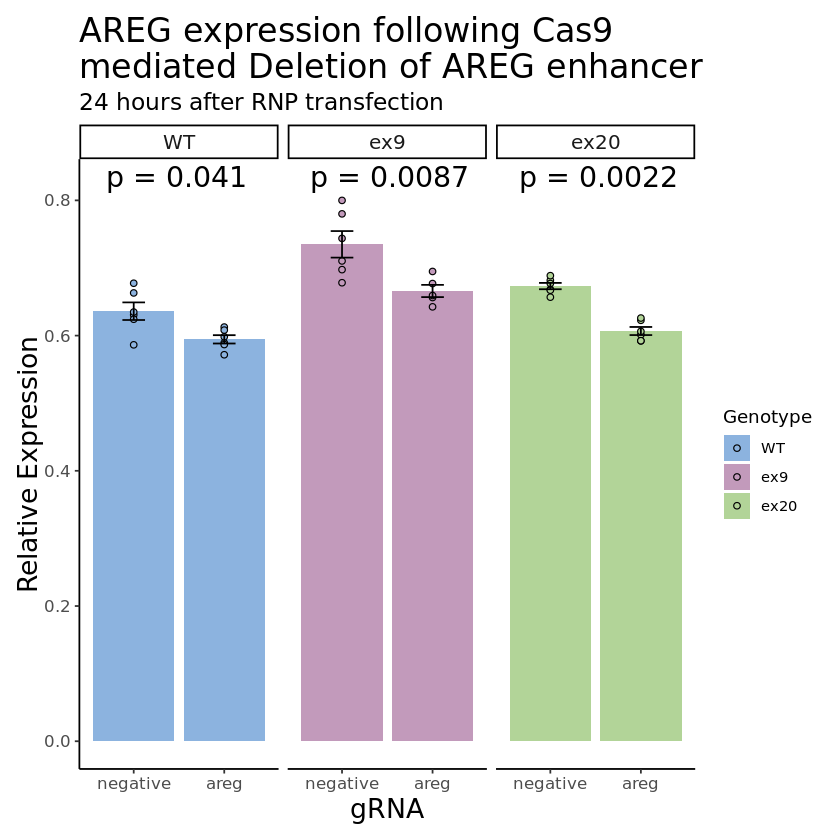

In [54]:
pres <- total_trim_relex %>% filter(Media == "20ng/mL EGF Media") %>%
     ggplot(aes(x = gRNA, y = relexp)) +
     facet_grid(~Genotype) +
     geom_bar(aes(fill = Genotype), 
              position = "dodge", stat = "summary") + 
     geom_point(aes(x = gRNA, fill = Genotype), shape = 21, position = position_dodge(width = 1)) +
     ggtitle(label = "AREG expression following Cas9\nmediated Deletion of AREG enhancer",
             subtitle = "24 hours after RNP transfection") +
     ylab(label = "Relative Expression") + xlab(label = "gRNA") +
#      coord_cartesian(ylim=c(0, 0.8)) +     
     scale_fill_discrete(labels(c("WT", "E545K", "H1047R"))) +
     scale_fill_manual(values = c("#8CB3DF", "#C29ABB", "#B2D498")) +
#      scale_x_discrete(labels(c("Alt-R® Negative\nControl crRNA #1",
#                                "AREG Enhancer\nFlanking"))) +
     stat_compare_means(aes(group = gRNA), size = 6, 
                                           label = "p.format", label.y = 0.82) +
#      stat_summary(aes(fill = Genotype), 
#                   fun.data = stat_box_data, geom = "text", hjust = 0.5, 
#                          vjust = 0.52, family = "Arial", size = 3.75, 
#                   position = position_dodge(width = 1)) +
     geom_errorbar(aes(fill = Genotype),
         stat = 'summary', position = position_dodge(width = .9), width = .25) +
     theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 16),
                          axis.text = element_text(size = 10),
                          plot.title = element_text(size = 20),
                          plot.subtitle = element_text(size = 14),
                          strip.text = element_text(size = 12),
#                           legend.text = element_text(size = 12),
#                           legend.title = element_text(size = 14),
                          plot.margin = margin(10, 10, 10, 10))
pres

In [55]:
total_trim_relex

,Sample Name,Target Name,CT,AREG_CT,relexp,Genotype,Media,gRNA
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
1,W-,actb,20.160,33.347,0.3353327,WT,EGF-free Media,negative
2,W-,actb,19.506,31.841,0.3981165,WT,EGF-free Media,negative
3,W-,actb,17.973,30.471,0.4326054,WT,EGF-free Media,negative
4,wa,actb,22.163,33.315,0.3747828,WT,EGF-free Media,areg
5,wa,actb,20.264,32.781,0.3657783,WT,EGF-free Media,areg
6,wa,actb,18.631,30.903,0.4257101,WT,EGF-free Media,areg
7,we-,actb,19.787,27.254,0.6305843,WT,20ng/mL EGF Media,negative
8,we-,actb,18.458,27.369,0.5863430,WT,20ng/mL EGF Media,negative
9,we-,actb,18.384,26.507,0.6242135,WT,20ng/mL EGF Media,negative


### DDcT again

In [56]:
clean_df_delt <- total_trim_relex %>% mutate(deltCT = AREG_CT - CT)
clean_df_delt

,Sample Name,Target Name,CT,AREG_CT,relexp,Genotype,Media,gRNA,deltCT
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>
1,W-,actb,20.160,33.347,0.3353327,WT,EGF-free Media,negative,13.187
2,W-,actb,19.506,31.841,0.3981165,WT,EGF-free Media,negative,12.335
3,W-,actb,17.973,30.471,0.4326054,WT,EGF-free Media,negative,12.498
4,wa,actb,22.163,33.315,0.3747828,WT,EGF-free Media,areg,11.152
5,wa,actb,20.264,32.781,0.3657783,WT,EGF-free Media,areg,12.517
6,wa,actb,18.631,30.903,0.4257101,WT,EGF-free Media,areg,12.272
7,we-,actb,19.787,27.254,0.6305843,WT,20ng/mL EGF Media,negative,7.467
8,we-,actb,18.458,27.369,0.5863430,WT,20ng/mL EGF Media,negative,8.911
9,we-,actb,18.384,26.507,0.6242135,WT,20ng/mL EGF Media,negative,8.123


In [57]:
clean_df_delt_EGF <- clean_df_delt %>% filter(Media == "20ng/mL EGF Media")
clean_df_delt_noEGF <- clean_df_delt %>% filter(Media == "EGF-free Media")

In [58]:
clean_df_delt_EGF

Sample Name,Target Name,CT,AREG_CT,relexp,Genotype,Media,gRNA,deltCT
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>
we-,actb,19.787,27.254,0.6305843,WT,20ng/mL EGF Media,negative,7.467
we-,actb,18.458,27.369,0.5863430,WT,20ng/mL EGF Media,negative,8.911
we-,actb,18.384,26.507,0.6242135,WT,20ng/mL EGF Media,negative,8.123
we-,actb,17.620,25.160,0.6630920,WT,20ng/mL EGF Media,negative,7.540
we-,actb,18.851,26.574,0.6348291,WT,20ng/mL EGF Media,negative,7.723
we-,actb,20.142,26.547,0.6774600,WT,20ng/mL EGF Media,negative,6.405
wea,actb,17.994,27.032,0.5892938,WT,20ng/mL EGF Media,areg,9.038
wea,actb,18.624,27.780,0.5716692,WT,20ng/mL EGF Media,areg,9.156
wea,actb,22.104,29.036,0.6126509,WT,20ng/mL EGF Media,areg,6.932


In [59]:
EGF_normFactor <- clean_df_delt_EGF %>% filter(Genotype == "WT" & gRNA == "negative")
EGF_normFactor <- mean(EGF_normFactor$deltCT)
EGF_normFactor
noEGF_normFactor <- clean_df_delt_noEGF %>% filter(Genotype == "WT" & gRNA == "negative")
noEGF_normFactor <- mean(noEGF_normFactor$deltCT)
noEGF_normFactor

[1] 7.694833

[1] 12.67333

In [60]:
clean_df_delt_EGF <- clean_df_delt_EGF %>% mutate(deltdeltCT = deltCT - EGF_normFactor)
clean_df_delt_noEGF <- clean_df_delt_noEGF %>% mutate(deltdeltCT = deltCT - noEGF_normFactor)
clean_df_delt_EGF
clean_df_delt_noEGF

Sample Name,Target Name,CT,AREG_CT,relexp,Genotype,Media,gRNA,deltCT,deltdeltCT
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>
we-,actb,19.787,27.254,0.6305843,WT,20ng/mL EGF Media,negative,7.467,-0.22783333
we-,actb,18.458,27.369,0.5863430,WT,20ng/mL EGF Media,negative,8.911,1.21616667
we-,actb,18.384,26.507,0.6242135,WT,20ng/mL EGF Media,negative,8.123,0.42816667
we-,actb,17.620,25.160,0.6630920,WT,20ng/mL EGF Media,negative,7.540,-0.15483333
we-,actb,18.851,26.574,0.6348291,WT,20ng/mL EGF Media,negative,7.723,0.02816667
we-,actb,20.142,26.547,0.6774600,WT,20ng/mL EGF Media,negative,6.405,-1.28983333
wea,actb,17.994,27.032,0.5892938,WT,20ng/mL EGF Media,areg,9.038,1.34316667
wea,actb,18.624,27.780,0.5716692,WT,20ng/mL EGF Media,areg,9.156,1.46116667
wea,actb,22.104,29.036,0.6126509,WT,20ng/mL EGF Media,areg,6.932,-0.76283333


Sample Name,Target Name,CT,AREG_CT,relexp,Genotype,Media,gRNA,deltCT,deltdeltCT
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>
W-,actb,20.160,33.347,0.3353327,WT,EGF-free Media,negative,13.187,0.5136667
W-,actb,19.506,31.841,0.3981165,WT,EGF-free Media,negative,12.335,-0.3383333
W-,actb,17.973,30.471,0.4326054,WT,EGF-free Media,negative,12.498,-0.1753333
wa,actb,22.163,33.315,0.3747828,WT,EGF-free Media,areg,11.152,-1.5213333
wa,actb,20.264,32.781,0.3657783,WT,EGF-free Media,areg,12.517,-0.1563333
wa,actb,18.631,30.903,0.4257101,WT,EGF-free Media,areg,12.272,-0.4013333
9-,actb,20.819,27.395,0.6571607,ex9,EGF-free Media,negative,6.576,-6.0973333
9-,actb,20.124,26.525,0.6779533,ex9,EGF-free Media,negative,6.401,-6.2723333
9-,actb,21.889,27.729,0.6775440,ex9,EGF-free Media,negative,5.840,-6.8333333


In [61]:
total_cleandelt_df <- rbind(clean_df_delt_EGF, clean_df_delt_noEGF)
total_cleandelt_df <- total_cleandelt_df %>% mutate(foldChange = 2^(-deltdeltCT))
total_cleandelt_df

Sample Name,Target Name,CT,AREG_CT,relexp,Genotype,Media,gRNA,deltCT,deltdeltCT,foldChange
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
we-,actb,19.787,27.254,0.6305843,WT,20ng/mL EGF Media,negative,7.467,-0.22783333,1.1710749
we-,actb,18.458,27.369,0.5863430,WT,20ng/mL EGF Media,negative,8.911,1.21616667,0.4304249
we-,actb,18.384,26.507,0.6242135,WT,20ng/mL EGF Media,negative,8.123,0.42816667,0.7432056
we-,actb,17.620,25.160,0.6630920,WT,20ng/mL EGF Media,negative,7.540,-0.15483333,1.1132930
we-,actb,18.851,26.574,0.6348291,WT,20ng/mL EGF Media,negative,7.723,0.02816667,0.9806657
we-,actb,20.142,26.547,0.6774600,WT,20ng/mL EGF Media,negative,6.405,-1.28983333,2.4449981
wea,actb,17.994,27.032,0.5892938,WT,20ng/mL EGF Media,areg,9.038,1.34316667,0.3941545
wea,actb,18.624,27.780,0.5716692,WT,20ng/mL EGF Media,areg,9.156,1.46116667,0.3631993
wea,actb,22.104,29.036,0.6126509,WT,20ng/mL EGF Media,areg,6.932,-0.76283333,1.6968198


In [62]:
library(ggplot2)
library(ggpubr)
library(tidyverse)
library(ggpubr)
library(rstatix)


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [63]:
EGFtotal_cleandelt_df <- total_cleandelt_df %>% filter(Media == "20ng/mL EGF Media")
noEGFtotal_cleandelt_df <- total_cleandelt_df %>% filter(Media == "EGF-free Media")

In [64]:
EGFrelnormfactor <- EGFtotal_cleandelt_df %>% filter(Genotype == "WT" & gRNA == "negative")
EGFrelnormfactor <- mean(EGFrelnormfactor$relexp)
EGFrelnormfactor
noEGFrelnormfactor <- noEGFtotal_cleandelt_df %>% filter(Genotype == "WT" & gRNA == "negative")
noEGFrelnormfactor <- mean(noEGFrelnormfactor$relexp)
noEGFrelnormfactor

[1] 0.636087

[1] 0.3886849

In [65]:
EGFtotal_cleandelt_df <- EGFtotal_cleandelt_df %>% mutate(normrelexp = relexp / 
                                                          EGFrelnormfactor)
noEGFtotal_cleandelt_df <- noEGFtotal_cleandelt_df %>% mutate(normrelexp = relexp / 
                                                          noEGFrelnormfactor)

In [66]:
library(ggprism)

In [67]:
EGFtotal_cleandelt_df

Sample Name,Target Name,CT,AREG_CT,relexp,Genotype,Media,gRNA,deltCT,deltdeltCT,foldChange,normrelexp
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
we-,actb,19.787,27.254,0.6305843,WT,20ng/mL EGF Media,negative,7.467,-0.22783333,1.1710749,0.9913491
we-,actb,18.458,27.369,0.5863430,WT,20ng/mL EGF Media,negative,8.911,1.21616667,0.4304249,0.9217968
we-,actb,18.384,26.507,0.6242135,WT,20ng/mL EGF Media,negative,8.123,0.42816667,0.7432056,0.9813336
we-,actb,17.620,25.160,0.6630920,WT,20ng/mL EGF Media,negative,7.540,-0.15483333,1.1132930,1.0424550
we-,actb,18.851,26.574,0.6348291,WT,20ng/mL EGF Media,negative,7.723,0.02816667,0.9806657,0.9980224
we-,actb,20.142,26.547,0.6774600,WT,20ng/mL EGF Media,negative,6.405,-1.28983333,2.4449981,1.0650430
wea,actb,17.994,27.032,0.5892938,WT,20ng/mL EGF Media,areg,9.038,1.34316667,0.3941545,0.9264359
wea,actb,18.624,27.780,0.5716692,WT,20ng/mL EGF Media,areg,9.156,1.46116667,0.3631993,0.8987280
wea,actb,22.104,29.036,0.6126509,WT,20ng/mL EGF Media,areg,6.932,-0.76283333,1.6968198,0.9631558


Genotype,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif,xmin,xmax,y.position
<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
WT,normrelexp,negative,areg,6,6,2.889758,7.129359,2.29e-02,2.290e-02,*,0.7,1.7,1.45
ex9,normrelexp,negative,areg,6,5,3.191717,6.965643,1.53e-02,2.290e-02,*,1.0,2.0,1.35
ex20,normrelexp,negative,areg,6,6,8.768990,9.451339,7.64e-06,2.292e-05,****,1.3,2.3,1.15


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message in geom_errorbar(aes(fill = Genotype), stat = "summary", position = position_dodge(width = 0.9), :
“Ignoring unknown aesthetics: fill”
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


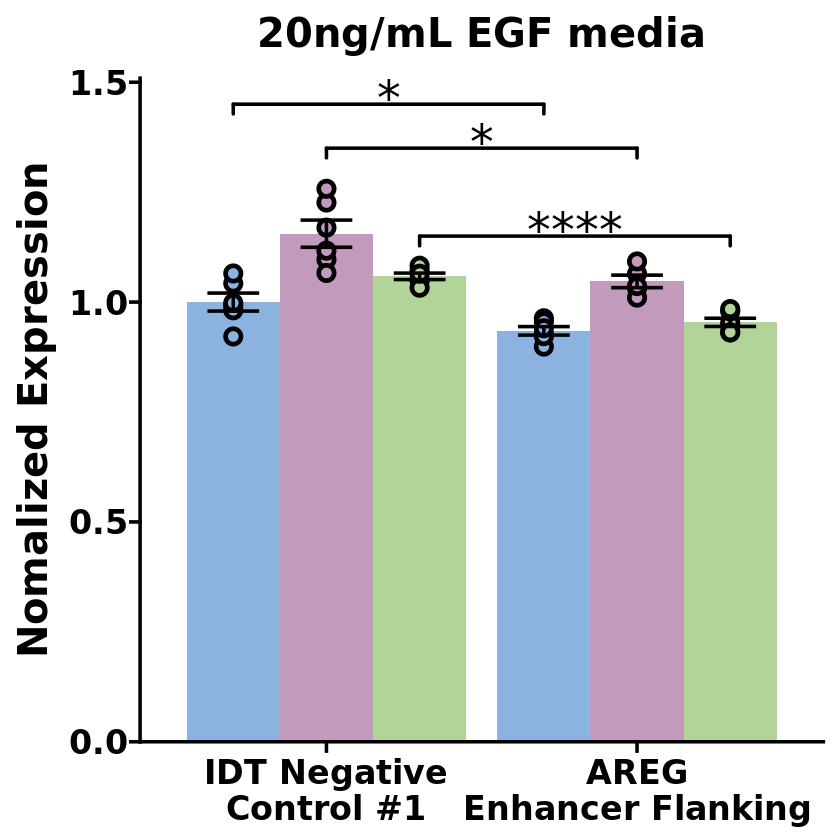

In [68]:
stat.test <- EGFtotal_cleandelt_df %>%
  group_by(Genotype) %>%
  t_test(normrelexp ~ gRNA) %>%
  adjust_pvalue(method = "fdr") %>%
  add_significance("p.adj")
stat.test <- stat.test %>% mutate(xmin = c(0.7, 1, 1.3)) %>%
             mutate(xmax = c(1.7, 2, 2.3)) %>%
             mutate(y.position = c(1.45, 1.35, 1.15))
stat.test
stat_box_data <- function(y, upper_limit = max(EGFtotal_cleandelt_df$normrelexp) * 1.1) {
  return( 
    data.frame(
      y = upper_limit,
      label = paste('n =', length(y), '\n',
                    'mean =', round(mean(y), 1), '\n')
    )
  )
}
EGFp <- EGFtotal_cleandelt_df %>% 
     ggplot(aes(x = gRNA, y = normrelexp)) +
#      facet_grid(~Media) +
     geom_bar(aes(fill = Genotype), 
              position = "dodge", stat = "summary") + 
     geom_point(aes(x = gRNA, fill = Genotype), shape = 21, position = position_dodge(0.9),
                size = 3, stroke = 2) +
     ggtitle("20ng/mL EGF media") +
     ylab(label = "Nomalized Expression") + xlab(label = NULL) +
     coord_cartesian(ylim=c(0, max(EGFtotal_cleandelt_df$normrelexp) * 1.2)) +     
     scale_fill_discrete(labels(c("WT", "E545K", "H1047R"))) +
     scale_fill_manual(values = c("#8CB3DF", "#C29ABB", "#B2D498")) +
#      stat_summary(aes(fill = Genotype), 
#                   fun.data = stat_box_data, geom = "text", hjust = 0.5, 
#                          vjust = 0.52, family = "Arial", size = 6, 
#                   position = position_dodge(width = 1)) +
     geom_errorbar(aes(fill = Genotype),
         stat = 'summary', position = position_dodge(width = .9), width = .5,
            size = 1) +
    stat_pvalue_manual(stat.test,  label = "p.adj.signif", tip.length = .04, 
                       size = 10, bracket.size = 1) +
    scale_x_discrete(labels=c("negative" = "IDT Negative\nControl #1", 
                              "areg" = "AREG\nEnhancer Flanking")) +
    scale_y_continuous(expand = c(0,0)) +
     theme_prism() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 24),
                          axis.text = element_text(size = 20, colour = "black"),
                          plot.title = element_text(size = 24),
                          plot.subtitle = element_text(size = 24, colour = "black"),
                          strip.text = element_text(size = 12),
                          legend.text = element_text(size = 14),
                          legend.title = element_text(size = 16),
                          legend.position = "none",
                          plot.margin = margin(10, 10, 10, 10))
EGFp

Genotype,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif,xmin,xmax,y.position
<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
WT,normrelexp,negative,areg,3,3,-0.002120373,3.450229,0.9980,0.9980,ns,0.7,1.7,1.25
ex9,normrelexp,negative,areg,6,6,3.119955964,8.132255,0.0139,0.0213,*,1.0,2.0,2.00
ex20,normrelexp,negative,areg,5,6,3.476679567,5.729308,0.0142,0.0213,*,1.3,2.3,1.80


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message in geom_errorbar(aes(fill = Genotype), stat = "summary", position = position_dodge(width = 0.9), :
“Ignoring unknown aesthetics: fill”
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


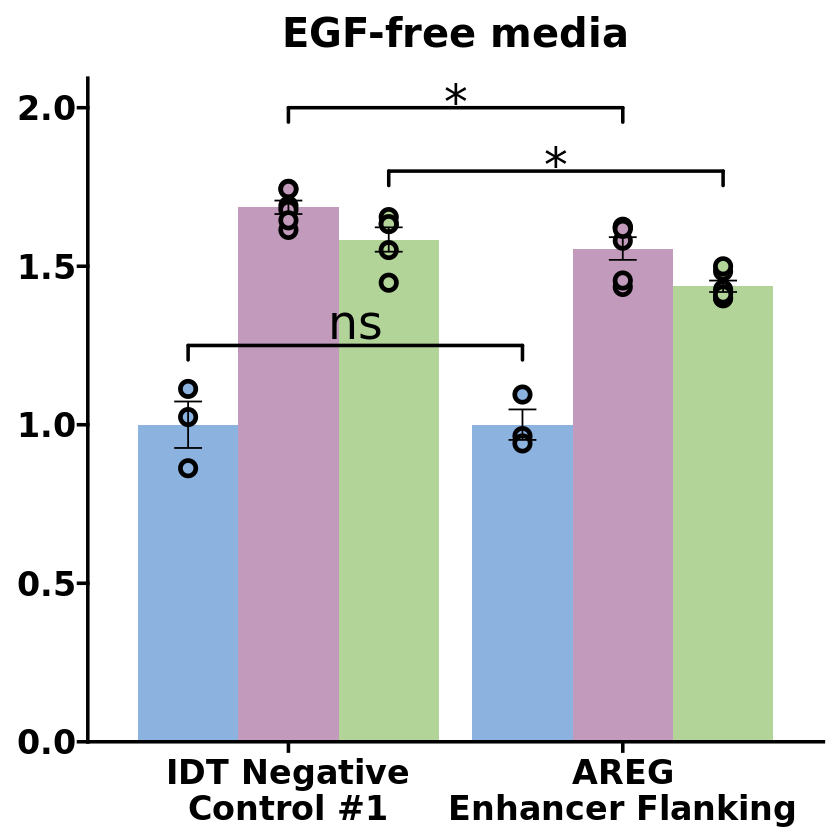

In [69]:
stat.test <- noEGFtotal_cleandelt_df %>%
  group_by(Genotype) %>%
  t_test(normrelexp ~ gRNA) %>%
  adjust_pvalue(method = "fdr") %>%
  add_significance("p.adj")
stat.test <- stat.test %>% mutate(xmin = c(0.7, 1, 1.3)) %>%
             mutate(xmax = c(1.7, 2, 2.3)) %>%
             mutate(y.position = c(1.25, 2, 1.8))
stat.test
stat_box_data <- function(y, upper_limit = max(noEGFtotal_cleandelt_df$normrelexp) * 1.1) {
  return( 
    data.frame(
      y = upper_limit,
      label = paste('n =', length(y), '\n',
                    'mean =', round(mean(y), 1), '\n')
    )
  )
}
noEGFp <- noEGFtotal_cleandelt_df %>% 
     ggplot(aes(x = gRNA, y = normrelexp)) +
#      facet_grid(~Media) +
     geom_bar(aes(fill = Genotype), 
              position = "dodge", stat = "summary") + 
     geom_point(aes(x = gRNA, fill = Genotype), shape = 21, , position = position_dodge(0.9),
                size = 3, stroke = 2) +
     ylab(label = NULL) + xlab(label = NULL) +
     coord_cartesian(ylim=c(0, max(noEGFtotal_cleandelt_df$normrelexp) * 1.2)) +     
     scale_fill_discrete(labels(c("WT", "E545K", "H1047R"))) +
     scale_fill_manual(values = c("#8CB3DF", "#C29ABB", "#B2D498")) +
#      stat_summary(aes(fill = Genotype), 
#                   fun.data = stat_box_data, geom = "text", hjust = 0.5, 
#                          vjust = 0.52, family = "Arial", size = 6, 
#                   position = position_dodge(width = 1)) +
     geom_errorbar(aes(fill = Genotype),
         stat = 'summary', position = position_dodge(width = .9), width = .25) +
    stat_pvalue_manual(stat.test,  label = "p.adj.signif", tip.length = .04, 
                       size = 10, bracket.size = 1) +
    scale_x_discrete(labels=c("negative" = "IDT Negative\nControl #1", 
                              "areg" = "AREG\nEnhancer Flanking")) +
    scale_y_continuous(expand = c(0,0)) +
    ggtitle("EGF-free media") +
     theme_prism() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 24),
                          axis.text = element_text(size = 20, colour = "black"),
                          plot.title = element_text(size = 24),
                          plot.subtitle = element_text(size = 16, colour = "black"),
                          strip.text = element_text(size = 12),
                          legend.text = element_text(size = 14),
                          legend.title = element_text(size = 16),
                          legend.position = "none",
                          plot.margin = margin(10, 10, 10, 10))
noEGFp

In [71]:
expression_df_4B <- rbind(EGFtotal_cleandelt_df, noEGFtotal_cleandelt_df)
expression_df_4B

Sample Name,Target Name,CT,AREG_CT,relexp,Genotype,Media,gRNA,deltCT,deltdeltCT,foldChange,normrelexp
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
we-,actb,19.787,27.254,0.6305843,WT,20ng/mL EGF Media,negative,7.467,-0.22783333,1.1710749,0.9913491
we-,actb,18.458,27.369,0.5863430,WT,20ng/mL EGF Media,negative,8.911,1.21616667,0.4304249,0.9217968
we-,actb,18.384,26.507,0.6242135,WT,20ng/mL EGF Media,negative,8.123,0.42816667,0.7432056,0.9813336
we-,actb,17.620,25.160,0.6630920,WT,20ng/mL EGF Media,negative,7.540,-0.15483333,1.1132930,1.0424550
we-,actb,18.851,26.574,0.6348291,WT,20ng/mL EGF Media,negative,7.723,0.02816667,0.9806657,0.9980224
we-,actb,20.142,26.547,0.6774600,WT,20ng/mL EGF Media,negative,6.405,-1.28983333,2.4449981,1.0650430
wea,actb,17.994,27.032,0.5892938,WT,20ng/mL EGF Media,areg,9.038,1.34316667,0.3941545,0.9264359
wea,actb,18.624,27.780,0.5716692,WT,20ng/mL EGF Media,areg,9.156,1.46116667,0.3631993,0.8987280
wea,actb,22.104,29.036,0.6126509,WT,20ng/mL EGF Media,areg,6.932,-0.76283333,1.6968198,0.9631558


In [73]:
write_csv(expression_df_4B, file = "/data/park_lab/adam/figures/expression_df_4B.csv")

In [221]:
library(extrafont)

In [222]:
library(extrafont)

No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


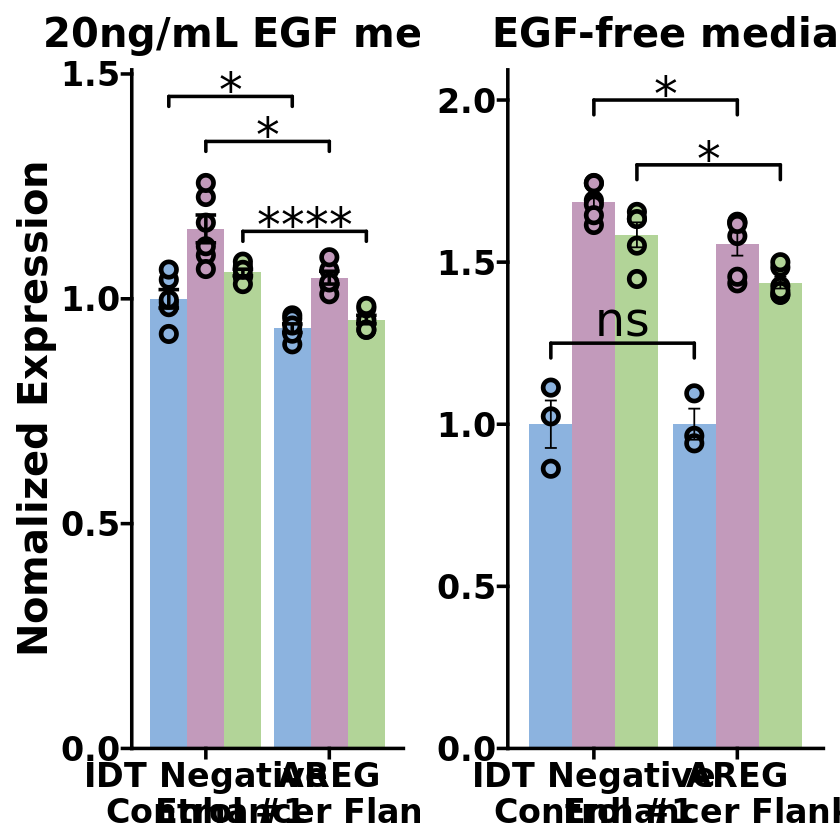

In [223]:
enhCRISPRexp <- ggarrange(EGFp, noEGFp, ncol = 2, nrow = 1, widths = c(8,8), heights = c(8))
enhCRISPRexp

In [224]:
ggsave(filename = "/data/park_lab/adam/figures/enhCRISPRexp6-6.pdf", plot =enhCRISPRexp,
       device = cairo_pdf, width = 16, height = 8)

In [81]:
ggsave(filename="/data/park_lab/adam/figures/AREGEnhDel_Expr4-14.eps", 
       plot = pres, device = cairo_ps, width = 8, height = 8)

No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


In [22]:
ggsave(filename="/data/park_lab/adam/figures/Mar20_expr_norm4-10.eps", 
       plot = total_plot_relex, device = cairo_ps, width = 8, height = 8)

No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


png 
  2

# dCas Assays

## Jan19 Ex9 only

In [1]:
setwd("/data/park_lab/adam/dCasAssay/")
list.files()

[1] "1_23_23qPCRresults.csv"                             
[2] "2_6_23qPCR.csv"                                     
[3] "CombineddCasAssay.pdf"                              
[4] "Jan19Assay.pdf"                                     
[5] "Summary__Sample Set (1-19-2023)_20230119_160241.csv"
[6] "Summary__Sample Set (1-30-2023)_20230130_125150.csv"

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.0      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.1 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()



In [5]:
Jan19Assay <- read_csv(file = "Summary__Sample Set (1-19-2023)_20230119_160241.csv") %>%
              as.data.frame()
Jan19Assay

Rows: 12 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): Sample ID, Cell type, Decluster degree, Analysis date/time, Analys...
dbl (24): Cell count, Viable cells, Total (x10^6) cells/mL, Viable (x10^6) c...
lgl  (3): Reanalysis date/time, Reanalysis by, Tag

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sample ID,Cell count,Viable cells,Total (x10^6) cells/mL,Viable (x10^6) cells/mL,Viability (%),Average diameter (µm),Average viable diameter (µm),Average circularity,Average viable circularity,⋯,Viable spot brightness (%),Viable spot area (%),Mixing cycles,Analysis date/time,Reanalysis date/time,Analysis by,Reanalysis by,Dilution,Wash,Tag
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<lgl>,<dbl>,<chr>,<lgl>
Con1,3834,3714,1.37,1.33,96.87,17.14,17.35,0.85,0.85,⋯,50,5,3,1/19/2023 2:49:03 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
Con2,4329,4168,1.55,1.49,96.28,16.93,17.18,0.85,0.85,⋯,50,5,3,1/19/2023 2:51:07 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
Con3,4542,4280,1.62,1.53,94.23,16.50,16.83,0.85,0.86,⋯,50,5,3,1/19/2023 2:53:13 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
Con4,4294,4180,1.53,1.49,97.35,17.09,17.28,0.86,0.86,⋯,50,5,3,1/19/2023 2:55:16 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
Con5,4019,3858,1.44,1.38,95.99,16.97,17.22,0.86,0.87,⋯,50,5,3,1/19/2023 2:57:21 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
Con6,4369,4180,1.56,1.49,95.67,16.73,17.00,0.86,0.86,⋯,50,5,3,1/19/2023 2:59:27 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
AREG1,677,590,0.24,0.21,87.15,17.15,17.97,0.84,0.85,⋯,50,5,3,1/19/2023 3:01:30 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
AREG2,867,811,0.31,0.29,93.54,17.04,17.38,0.84,0.85,⋯,50,5,3,1/19/2023 3:03:33 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
AREG3,1287,1172,0.46,0.42,91.06,17.92,18.56,0.86,0.87,⋯,50,5,3,1/19/2023 3:05:36 PM,NA,Vi-CELL,NA,1,Normal Wash,NA


In [6]:
Jan19Assay <- Jan19Assay %>%
            mutate(Treatment = c(rep("Control", 6),
                                 rep("AREG_gRNA", 6)),
                    .after = `Sample ID`)
Jan19Assay$Treatment <- as.factor(Jan19Assay$Treatment)
Jan19Assay

Sample ID,Treatment,Cell count,Viable cells,Total (x10^6) cells/mL,Viable (x10^6) cells/mL,Viability (%),Average diameter (µm),Average viable diameter (µm),Average circularity,⋯,Viable spot brightness (%),Viable spot area (%),Mixing cycles,Analysis date/time,Reanalysis date/time,Analysis by,Reanalysis by,Dilution,Wash,Tag
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<lgl>,<dbl>,<chr>,<lgl>
Con1,Control,3834,3714,1.37,1.33,96.87,17.14,17.35,0.85,⋯,50,5,3,1/19/2023 2:49:03 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
Con2,Control,4329,4168,1.55,1.49,96.28,16.93,17.18,0.85,⋯,50,5,3,1/19/2023 2:51:07 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
Con3,Control,4542,4280,1.62,1.53,94.23,16.50,16.83,0.85,⋯,50,5,3,1/19/2023 2:53:13 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
Con4,Control,4294,4180,1.53,1.49,97.35,17.09,17.28,0.86,⋯,50,5,3,1/19/2023 2:55:16 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
Con5,Control,4019,3858,1.44,1.38,95.99,16.97,17.22,0.86,⋯,50,5,3,1/19/2023 2:57:21 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
Con6,Control,4369,4180,1.56,1.49,95.67,16.73,17.00,0.86,⋯,50,5,3,1/19/2023 2:59:27 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
AREG1,AREG_gRNA,677,590,0.24,0.21,87.15,17.15,17.97,0.84,⋯,50,5,3,1/19/2023 3:01:30 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
AREG2,AREG_gRNA,867,811,0.31,0.29,93.54,17.04,17.38,0.84,⋯,50,5,3,1/19/2023 3:03:33 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
AREG3,AREG_gRNA,1287,1172,0.46,0.42,91.06,17.92,18.56,0.86,⋯,50,5,3,1/19/2023 3:05:36 PM,NA,Vi-CELL,NA,1,Normal Wash,NA


In [7]:
library(ggsignif)
library(ggpubr)

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



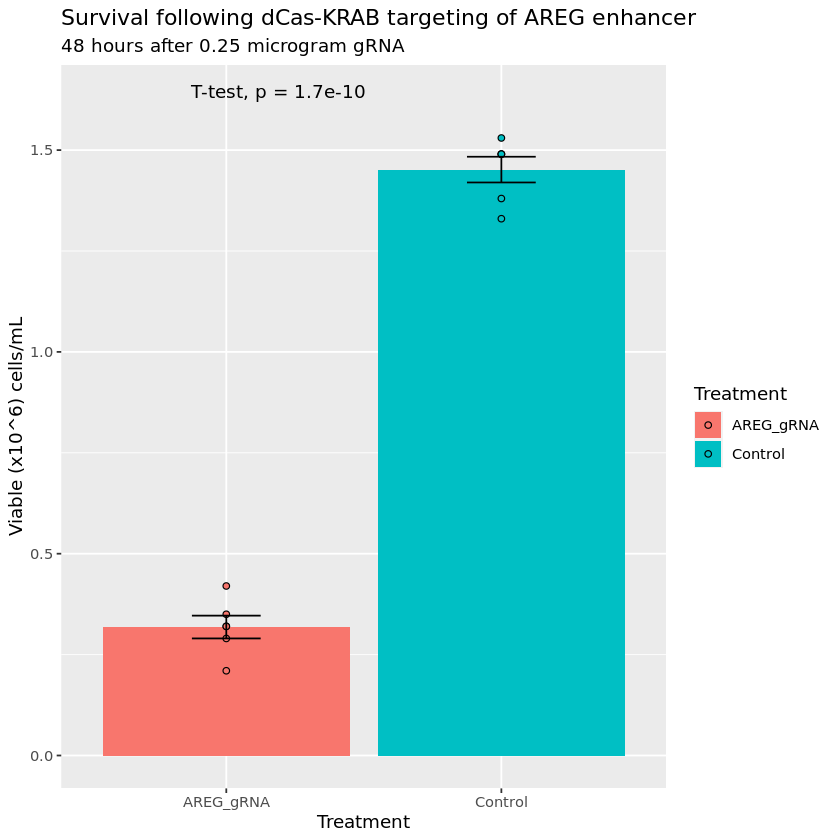

In [13]:
p <- Jan19Assay %>%
     ggplot(aes(x = Treatment, fill = Treatment, y = `Viable (x10^6) cells/mL`)) +
     geom_bar(position = "dodge", stat = "summary") + 
     geom_point(aes(x = Treatment), shape = 21, position = position_dodge(width = 1)) +
     ggtitle(label = "Survival following dCas-KRAB targeting of AREG enhancer",
             subtitle = "48 hours after 0.25 microgram gRNA") +
     stat_compare_means(aes(group=Treatment), method = "t.test", label.y = 1.63) +
     geom_errorbar(stat = 'summary', position = position_dodge(width = .9), width = .25)
p

In [14]:
pdf(file = "Jan19Assay.pdf", width = 8, height = 8)
p
dev.off()

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



png 
  2

### qPCR Verification

In [1]:
setwd("/data/park_lab/adam/dCasAssay/")
library(tidyverse)
list.files()

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()



[1] "1_23_23qPCRresults.csv"                             
[2] "2_6_23qPCR.csv"                                     
[3] "CombineddCasAssay.pdf"                              
[4] "Jan19Assay.pdf"                                     
[5] "Summary__Sample Set (1-19-2023)_20230119_160241.csv"
[6] "Summary__Sample Set (1-30-2023)_20230130_125150.csv"

In [2]:
qPCRresults <- read_csv(file = "1_23_23qPCRresults.csv") %>% as.data.frame()

Rows: 24 Columns: 32
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Well Position, Sample Name, Target Name, Task, Reporter, Quencher,...
dbl (11): Well, CT, Ct Mean, Ct SD, Ct Threshold, Baseline Start, Baseline E...
lgl (12): Omit, Quantity, Quantity Mean, Quantity SD, Y-Intercept, R(supersc...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
qPCRresults

Well,Well Position,Omit,Sample Name,Target Name,Task,Reporter,Quencher,CT,Ct Mean,⋯,Baseline End,Amp Status,Comments,Cq Conf,MTP,OUTLIERRG,Tm1,Tm2,Tm3,Tm4
<dbl>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>
1,A1,FALSE,Control,ACTB,UNKNOWN,SYBR,None,15.058,15.163,⋯,10,Amp,NA,0.940,N,N,86.873,NA,NA,NA
2,A2,FALSE,Control,ACTB,UNKNOWN,SYBR,None,15.060,15.163,⋯,10,Amp,NA,0.963,N,N,86.873,NA,NA,NA
3,A3,FALSE,Control,ACTB,UNKNOWN,SYBR,None,14.858,15.163,⋯,9,Amp,NA,0.955,N,N,86.870,NA,NA,NA
4,A4,FALSE,Control,ACTB,UNKNOWN,SYBR,None,15.041,15.163,⋯,9,Amp,NA,0.956,N,N,87.031,NA,NA,NA
5,A5,FALSE,Control,ACTB,UNKNOWN,SYBR,None,15.566,15.163,⋯,10,Amp,NA,0.966,N,N,87.017,NA,NA,NA
6,A6,FALSE,Control,ACTB,UNKNOWN,SYBR,None,15.397,15.163,⋯,10,Amp,NA,0.964,N,N,87.017,NA,NA,NA
7,A7,FALSE,AREG_Enh,ACTB,UNKNOWN,SYBR,None,15.222,15.698,⋯,10,Amp,NA,0.959,N,N,87.021,NA,NA,NA
8,A8,FALSE,AREG_Enh,ACTB,UNKNOWN,SYBR,None,15.213,15.698,⋯,10,Amp,NA,0.968,N,N,87.021,NA,NA,NA
9,A9,FALSE,AREG_Enh,ACTB,UNKNOWN,SYBR,None,15.716,15.698,⋯,10,Amp,NA,0.975,N,N,87.023,NA,NA,NA


In [4]:
qPCRresults$`Sample Name` <- as.factor(qPCRresults$`Sample Name`)
qPCRresults$`Target Name` <- as.factor(qPCRresults$`Target Name`)
str(qPCRresults)

'data.frame':	24 obs. of  32 variables:
 $ Well                  : num  1 2 3 4 5 6 7 8 9 10 ...
 $ Well Position         : chr  "A1" "A2" "A3" "A4" ...
 $ Omit                  : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Sample Name           : Factor w/ 2 levels "AREG_Enh","Control": 2 2 2 2 2 2 1 1 1 1 ...
 $ Target Name           : Factor w/ 2 levels "ACTB","AREG": 1 1 1 1 1 1 1 1 1 1 ...
 $ Task                  : chr  "UNKNOWN" "UNKNOWN" "UNKNOWN" "UNKNOWN" ...
 $ Reporter              : chr  "SYBR" "SYBR" "SYBR" "SYBR" ...
 $ Quencher              : chr  "None" "None" "None" "None" ...
 $ CT                    : num  15.1 15.1 14.9 15 15.6 ...
 $ Ct Mean               : num  15.2 15.2 15.2 15.2 15.2 ...
 $ Ct SD                 : num  0.263 0.263 0.263 0.263 0.263 0.263 0.454 0.454 0.454 0.454 ...
 $ Quantity              : logi  NA NA NA NA NA NA ...
 $ Quantity Mean         : logi  NA NA NA NA NA NA ...
 $ Quantity SD           : logi  NA NA NA NA NA NA ...
 $ Y-Interce

In [5]:
qPCRresults_slim <- qPCRresults %>%
                    filter(`Target Name` == "ACTB") %>%
                    select(c("Sample Name", "Target Name", "CT"))
qPCRresults_slim

Sample Name,Target Name,CT
<fct>,<fct>,<dbl>
Control,ACTB,15.058
Control,ACTB,15.060
Control,ACTB,14.858
Control,ACTB,15.041
Control,ACTB,15.566
Control,ACTB,15.397
AREG_Enh,ACTB,15.222
AREG_Enh,ACTB,15.213
AREG_Enh,ACTB,15.716


In [6]:
qPCRresults_AREG <- qPCRresults %>%
                    filter(`Target Name` == "AREG")
qPCRresults_AREG

Well,Well Position,Omit,Sample Name,Target Name,Task,Reporter,Quencher,CT,Ct Mean,⋯,Baseline End,Amp Status,Comments,Cq Conf,MTP,OUTLIERRG,Tm1,Tm2,Tm3,Tm4
<dbl>,<chr>,<lgl>,<fct>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>
13,B1,FALSE,Control,AREG,UNKNOWN,SYBR,None,24.069,24.061,⋯,18,Amp,NA,0.884,Y,N,82.851,88.643,NA,NA
14,B2,FALSE,Control,AREG,UNKNOWN,SYBR,None,24.179,24.061,⋯,18,Amp,NA,0.908,Y,N,82.851,88.643,NA,NA
15,B3,FALSE,Control,AREG,UNKNOWN,SYBR,None,24.217,24.061,⋯,18,Amp,NA,0.910,Y,N,83.009,88.801,NA,NA
16,B4,FALSE,Control,AREG,UNKNOWN,SYBR,None,23.661,24.061,⋯,17,Amp,NA,0.884,Y,Y,83.009,88.801,NA,NA
17,B5,FALSE,Control,AREG,UNKNOWN,SYBR,None,24.121,24.061,⋯,18,Amp,NA,0.912,Y,N,82.997,88.786,NA,NA
18,B6,FALSE,Control,AREG,UNKNOWN,SYBR,None,24.121,24.061,⋯,18,Amp,NA,0.900,Y,N,82.997,88.786,NA,NA
19,B7,FALSE,AREG_Enh,AREG,UNKNOWN,SYBR,None,23.149,23.193,⋯,17,Amp,NA,0.864,Y,N,82.839,88.790,NA,NA
20,B8,FALSE,AREG_Enh,AREG,UNKNOWN,SYBR,None,23.299,23.193,⋯,17,Amp,NA,0.872,Y,N,82.839,88.790,NA,NA
21,B9,FALSE,AREG_Enh,AREG,UNKNOWN,SYBR,None,22.817,23.193,⋯,16,Amp,NA,0.860,Y,N,82.841,88.792,NA,NA


In [7]:
AREG_CT <- qPCRresults_AREG$CT
AREG_CT

[1] 24.069 24.179 24.217 23.661 24.121 24.121 23.149 23.299 22.817 23.561
[11] 23.456 22.876

In [8]:
qPCRresults_slim$AREG_CT <- AREG_CT
qPCRresults_slim

Sample Name,Target Name,CT,AREG_CT
<fct>,<fct>,<dbl>,<dbl>
Control,ACTB,15.058,24.069
Control,ACTB,15.060,24.179
Control,ACTB,14.858,24.217
Control,ACTB,15.041,23.661
Control,ACTB,15.566,24.121
Control,ACTB,15.397,24.121
AREG_Enh,ACTB,15.222,23.149
AREG_Enh,ACTB,15.213,23.299
AREG_Enh,ACTB,15.716,22.817


In [21]:
qPCRresults_slim$deltaCT <- qPCRresults_slim$AREG_CT - qPCRresults_slim$CT
qPCRresults_slim

Sample Name,Target Name,CT,AREG_CT,deltaCT
<fct>,<fct>,<dbl>,<dbl>,<dbl>
Control,ACTB,15.058,24.069,9.011
Control,ACTB,15.060,24.179,9.119
Control,ACTB,14.858,24.217,9.359
Control,ACTB,15.041,23.661,8.620
Control,ACTB,15.566,24.121,8.555
Control,ACTB,15.397,24.121,8.724
AREG_Enh,ACTB,15.222,23.149,7.927
AREG_Enh,ACTB,15.213,23.299,8.086
AREG_Enh,ACTB,15.716,22.817,7.101


In [9]:
qPCRresults_slim$Media <- c(rep("No_EGF", 12))
qPCRresults_slim$relexp <- (40 - qPCRresults_slim$`AREG_CT`)/(40 - qPCRresults_slim$`CT`)
qPCRresults_slim

Sample Name,Target Name,CT,AREG_CT,Media,relexp
<fct>,<fct>,<dbl>,<dbl>,<chr>,<dbl>
Control,ACTB,15.058,24.069,No_EGF,0.6387218
Control,ACTB,15.060,24.179,No_EGF,0.6343625
Control,ACTB,14.858,24.217,No_EGF,0.6277544
Control,ACTB,15.041,23.661,No_EGF,0.6546336
Control,ACTB,15.566,24.121,No_EGF,0.6498731
Control,ACTB,15.397,24.121,No_EGF,0.6454091
AREG_Enh,ACTB,15.222,23.149,No_EGF,0.6800791
AREG_Enh,ACTB,15.213,23.299,No_EGF,0.6737806
AREG_Enh,ACTB,15.716,22.817,No_EGF,0.7075852


## Jan31 Assay with EGF

In [30]:
Jan30Assayb <- read_csv(file = "Summary__Sample Set (1-30-2023)_20230130_125150.csv") %>% 
            as.data.frame() %>%
            head(n = 12)
Jan30Assayb

Rows: 24 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): Sample ID, Cell type, Decluster degree, Analysis date/time, Analys...
dbl (24): Cell count, Viable cells, Total (x10^6) cells/mL, Viable (x10^6) c...
lgl  (3): Reanalysis date/time, Reanalysis by, Tag

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,Sample ID,Cell count,Viable cells,Total (x10^6) cells/mL,Viable (x10^6) cells/mL,Viability (%),Average diameter (µm),Average viable diameter (µm),Average circularity,Average viable circularity,⋯,Viable spot brightness (%),Viable spot area (%),Mixing cycles,Analysis date/time,Reanalysis date/time,Analysis by,Reanalysis by,Dilution,Wash,Tag
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<lgl>,<dbl>,<chr>,<lgl>
1,Untreated,3662,3620,1.31,1.29,98.85,17.33,17.41,0.88,0.88,⋯,50,5,3,1/30/2023 11:24:38 AM,NA,Vi-CELL,NA,1,Normal Wash,NA
2,Untreated,7434,7260,2.66,2.59,97.66,16.98,17.12,0.90,0.91,⋯,50,5,3,1/30/2023 11:26:46 AM,NA,Vi-CELL,NA,1,Normal Wash,NA
3,Untreated,2649,2588,0.95,0.92,97.70,16.39,16.53,0.88,0.88,⋯,50,5,3,1/30/2023 11:28:50 AM,NA,Vi-CELL,NA,1,Normal Wash,NA
4,Untreated,5093,5020,1.82,1.79,98.57,17.65,17.75,0.88,0.88,⋯,50,5,3,1/30/2023 11:30:55 AM,NA,Vi-CELL,NA,1,Normal Wash,NA
5,Untreated,6601,6490,2.36,2.32,98.32,16.32,16.41,0.88,0.88,⋯,50,5,3,1/30/2023 11:33:01 AM,NA,Vi-CELL,NA,1,Normal Wash,NA
6,Untreated,5159,5085,1.84,1.82,98.57,17.08,17.17,0.88,0.88,⋯,50,5,3,1/30/2023 11:35:06 AM,NA,Vi-CELL,NA,1,Normal Wash,NA
7,AREG_dCas,4967,4857,1.77,1.74,97.79,17.44,17.57,0.89,0.89,⋯,50,5,3,1/30/2023 11:37:11 AM,NA,Vi-CELL,NA,1,Normal Wash,NA
8,AREG_dCas,4809,4695,1.72,1.68,97.63,16.77,16.90,0.88,0.88,⋯,50,5,3,1/30/2023 11:39:17 AM,NA,Vi-CELL,NA,1,Normal Wash,NA
9,AREG_dCas,4964,4717,1.77,1.69,95.02,16.81,17.13,0.86,0.87,⋯,50,5,3,1/30/2023 11:41:25 AM,NA,Vi-CELL,NA,1,Normal Wash,NA


In [31]:
Jan30Assayb <- Jan30Assayb %>%
            mutate(Treatment = c(rep("Control", 6),
                                 rep("AREG_gRNA", 6)),
                    .after = `Sample ID`)
Jan30Assayb$Treatment <- as.factor(Jan30Assayb$Treatment)
Jan30Assayb

,Sample ID,Treatment,Cell count,Viable cells,Total (x10^6) cells/mL,Viable (x10^6) cells/mL,Viability (%),Average diameter (µm),Average viable diameter (µm),Average circularity,⋯,Viable spot brightness (%),Viable spot area (%),Mixing cycles,Analysis date/time,Reanalysis date/time,Analysis by,Reanalysis by,Dilution,Wash,Tag
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<lgl>,<dbl>,<chr>,<lgl>
1,Untreated,Control,3662,3620,1.31,1.29,98.85,17.33,17.41,0.88,⋯,50,5,3,1/30/2023 11:24:38 AM,NA,Vi-CELL,NA,1,Normal Wash,NA
2,Untreated,Control,7434,7260,2.66,2.59,97.66,16.98,17.12,0.90,⋯,50,5,3,1/30/2023 11:26:46 AM,NA,Vi-CELL,NA,1,Normal Wash,NA
3,Untreated,Control,2649,2588,0.95,0.92,97.70,16.39,16.53,0.88,⋯,50,5,3,1/30/2023 11:28:50 AM,NA,Vi-CELL,NA,1,Normal Wash,NA
4,Untreated,Control,5093,5020,1.82,1.79,98.57,17.65,17.75,0.88,⋯,50,5,3,1/30/2023 11:30:55 AM,NA,Vi-CELL,NA,1,Normal Wash,NA
5,Untreated,Control,6601,6490,2.36,2.32,98.32,16.32,16.41,0.88,⋯,50,5,3,1/30/2023 11:33:01 AM,NA,Vi-CELL,NA,1,Normal Wash,NA
6,Untreated,Control,5159,5085,1.84,1.82,98.57,17.08,17.17,0.88,⋯,50,5,3,1/30/2023 11:35:06 AM,NA,Vi-CELL,NA,1,Normal Wash,NA
7,AREG_dCas,AREG_gRNA,4967,4857,1.77,1.74,97.79,17.44,17.57,0.89,⋯,50,5,3,1/30/2023 11:37:11 AM,NA,Vi-CELL,NA,1,Normal Wash,NA
8,AREG_dCas,AREG_gRNA,4809,4695,1.72,1.68,97.63,16.77,16.90,0.88,⋯,50,5,3,1/30/2023 11:39:17 AM,NA,Vi-CELL,NA,1,Normal Wash,NA
9,AREG_dCas,AREG_gRNA,4964,4717,1.77,1.69,95.02,16.81,17.13,0.86,⋯,50,5,3,1/30/2023 11:41:25 AM,NA,Vi-CELL,NA,1,Normal Wash,NA


## Combine Assays

In [35]:
Jan30Assayb <- Jan30Assayb %>%
            mutate(Media = c(rep("EGF", 12)))
Jan19Assay <- Jan19Assay %>%
            mutate(Media = c(rep("No EGF", 12)))
combined_df <- rbind(Jan30Assayb, Jan19Assay)
combined_df

Sample ID,Treatment,Cell count,Viable cells,Total (x10^6) cells/mL,Viable (x10^6) cells/mL,Viability (%),Average diameter (µm),Average viable diameter (µm),Average circularity,⋯,Viable spot area (%),Mixing cycles,Analysis date/time,Reanalysis date/time,Analysis by,Reanalysis by,Dilution,Wash,Tag,Media
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<lgl>,<dbl>,<chr>,<lgl>,<chr>
Untreated,Control,3662,3620,1.31,1.29,98.85,17.33,17.41,0.88,⋯,5,3,1/30/2023 11:24:38 AM,NA,Vi-CELL,NA,1,Normal Wash,NA,EGF
Untreated,Control,7434,7260,2.66,2.59,97.66,16.98,17.12,0.90,⋯,5,3,1/30/2023 11:26:46 AM,NA,Vi-CELL,NA,1,Normal Wash,NA,EGF
Untreated,Control,2649,2588,0.95,0.92,97.70,16.39,16.53,0.88,⋯,5,3,1/30/2023 11:28:50 AM,NA,Vi-CELL,NA,1,Normal Wash,NA,EGF
Untreated,Control,5093,5020,1.82,1.79,98.57,17.65,17.75,0.88,⋯,5,3,1/30/2023 11:30:55 AM,NA,Vi-CELL,NA,1,Normal Wash,NA,EGF
Untreated,Control,6601,6490,2.36,2.32,98.32,16.32,16.41,0.88,⋯,5,3,1/30/2023 11:33:01 AM,NA,Vi-CELL,NA,1,Normal Wash,NA,EGF
Untreated,Control,5159,5085,1.84,1.82,98.57,17.08,17.17,0.88,⋯,5,3,1/30/2023 11:35:06 AM,NA,Vi-CELL,NA,1,Normal Wash,NA,EGF
AREG_dCas,AREG_gRNA,4967,4857,1.77,1.74,97.79,17.44,17.57,0.89,⋯,5,3,1/30/2023 11:37:11 AM,NA,Vi-CELL,NA,1,Normal Wash,NA,EGF
AREG_dCas,AREG_gRNA,4809,4695,1.72,1.68,97.63,16.77,16.90,0.88,⋯,5,3,1/30/2023 11:39:17 AM,NA,Vi-CELL,NA,1,Normal Wash,NA,EGF
AREG_dCas,AREG_gRNA,4964,4717,1.77,1.69,95.02,16.81,17.13,0.86,⋯,5,3,1/30/2023 11:41:25 AM,NA,Vi-CELL,NA,1,Normal Wash,NA,EGF


No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



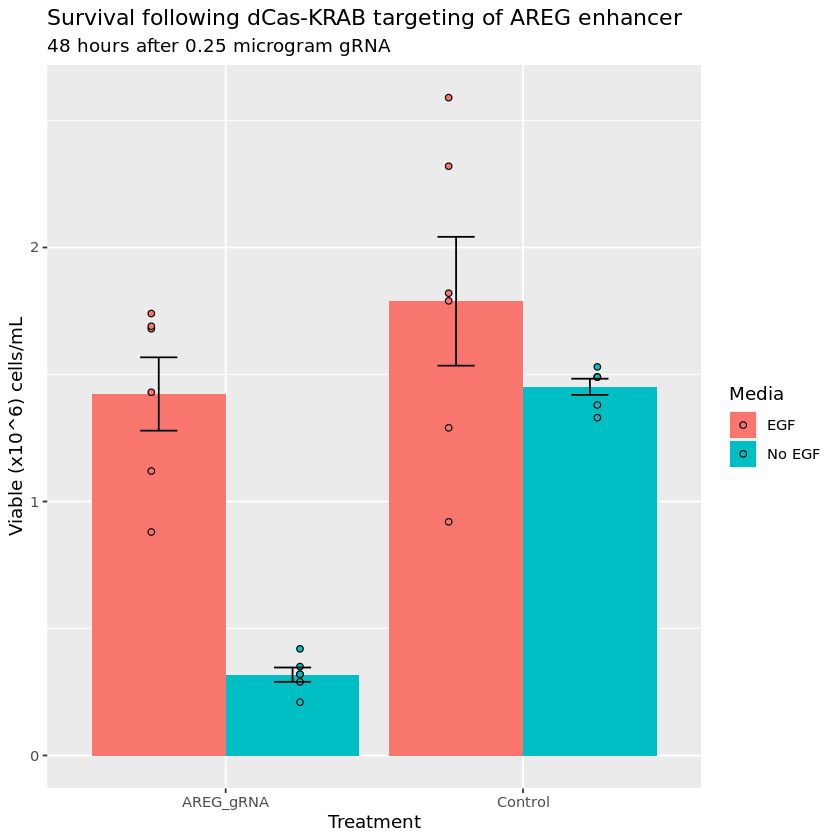

In [36]:
p <- combined_df %>%
     ggplot(aes(x = Treatment, fill = Media, y = `Viable (x10^6) cells/mL`)) +
     geom_bar(position = "dodge", stat = "summary") + 
     geom_point(aes(x = Treatment), shape = 21, position = position_dodge(width = 1)) +
     ggtitle(label = "Survival following dCas-KRAB targeting of AREG enhancer",
             subtitle = "48 hours after 0.25 microgram gRNA") +
#      stat_compare_means(aes(group=Treatment), method = "t.test", label.y = 1.63) +
     geom_errorbar(stat = 'summary', position = position_dodge(width = .9), width = .25)
p

In [37]:
pdf(file = "CombineddCasAssay.pdf", width = 8, height = 8)
p
dev.off()

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



png 
  2

### qPCR of Jan31 Assay

In [10]:
qPCRres <- read_csv("2_6_23qPCR.csv") %>% as.data.frame()
qPCRres

Rows: 24 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): Well Position, Sample Name, Target Name, Task, Reporter, Quencher, CT
dbl (3): Well, Ct Mean, Ct SD
lgl (1): Omit

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Well,Well Position,Omit,Sample Name,Target Name,Task,Reporter,Quencher,CT,Ct Mean,Ct SD
<dbl>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,A1,FALSE,Control,ACTB,UNKNOWN,SYBR,None,19.389,17.234,1.204
2,A2,FALSE,Control,ACTB,UNKNOWN,SYBR,None,16.468,17.234,1.204
3,A3,FALSE,Control,ACTB,UNKNOWN,SYBR,None,17.954,17.234,1.204
4,A4,FALSE,Control,ACTB,UNKNOWN,SYBR,None,16.633,17.234,1.204
5,A5,FALSE,Control,ACTB,UNKNOWN,SYBR,None,16.487,17.234,1.204
6,A6,FALSE,Control,ACTB,UNKNOWN,SYBR,None,16.474,17.234,1.204
7,A7,FALSE,Treated,ACTB,UNKNOWN,SYBR,None,18.801,17.808,0.660
8,A8,FALSE,Treated,ACTB,UNKNOWN,SYBR,None,17.456,17.808,0.660
9,A9,FALSE,Treated,ACTB,UNKNOWN,SYBR,None,17.256,17.808,0.660


In [11]:
qPCRres <- qPCRres[-c(12,24),]
qPCRres

,Well,Well Position,Omit,Sample Name,Target Name,Task,Reporter,Quencher,CT,Ct Mean,Ct SD
,<dbl>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,1,A1,FALSE,Control,ACTB,UNKNOWN,SYBR,None,19.389,17.234,1.204
2,2,A2,FALSE,Control,ACTB,UNKNOWN,SYBR,None,16.468,17.234,1.204
3,3,A3,FALSE,Control,ACTB,UNKNOWN,SYBR,None,17.954,17.234,1.204
4,4,A4,FALSE,Control,ACTB,UNKNOWN,SYBR,None,16.633,17.234,1.204
5,5,A5,FALSE,Control,ACTB,UNKNOWN,SYBR,None,16.487,17.234,1.204
6,6,A6,FALSE,Control,ACTB,UNKNOWN,SYBR,None,16.474,17.234,1.204
7,7,A7,FALSE,Treated,ACTB,UNKNOWN,SYBR,None,18.801,17.808,0.660
8,8,A8,FALSE,Treated,ACTB,UNKNOWN,SYBR,None,17.456,17.808,0.660
9,9,A9,FALSE,Treated,ACTB,UNKNOWN,SYBR,None,17.256,17.808,0.660


In [12]:
qPCRres_stack <- head(qPCRres, 11) %>%
                 select(c("Sample Name", "CT"))
names(qPCRres_stack) <- c("Sample Name", "ACTB_CT")
qPCRres_stack

,Sample Name,ACTB_CT
,<chr>,<chr>
1,Control,19.389
2,Control,16.468
3,Control,17.954
4,Control,16.633
5,Control,16.487
6,Control,16.474
7,Treated,18.801
8,Treated,17.456
9,Treated,17.256


In [13]:
AREG_CT <- tail(qPCRres, 11) %>%
        select(c("CT"))
AREG_CT
qPCRres_stack <- cbind(qPCRres_stack, AREG_CT)
qPCRres_stack

,CT
,<chr>
13,23.104
14,21.644
15,24.496
16,21.575
17,19.595
18,20.591
19,22.620
20,20.825
21,21.578


,Sample Name,ACTB_CT,CT
,<chr>,<chr>,<chr>
1,Control,19.389,23.104
2,Control,16.468,21.644
3,Control,17.954,24.496
4,Control,16.633,21.575
5,Control,16.487,19.595
6,Control,16.474,20.591
7,Treated,18.801,22.620
8,Treated,17.456,20.825
9,Treated,17.256,21.578


In [14]:
qPCRres_stack$ACTB_CT <- as.numeric(qPCRres_stack$ACTB_CT)
qPCRres_stack$CT <- as.numeric(qPCRres_stack$CT)

In [15]:
qPCRres_stack$delt <- qPCRres_stack$CT - qPCRres_stack$ACTB_CT
qPCRres_stack

,Sample Name,ACTB_CT,CT,delt
,<chr>,<dbl>,<dbl>,<dbl>
1,Control,19.389,23.104,3.715
2,Control,16.468,21.644,5.176
3,Control,17.954,24.496,6.542
4,Control,16.633,21.575,4.942
5,Control,16.487,19.595,3.108
6,Control,16.474,20.591,4.117
7,Treated,18.801,22.620,3.819
8,Treated,17.456,20.825,3.369
9,Treated,17.256,21.578,4.322


In [17]:
qPCRres_stack$Media <- c(rep("EGF", 11))
qPCRres_stack$relexp <- (40 - qPCRres_stack$`CT`)/(40 - qPCRres_stack$`ACTB_CT`)
qPCRres_stack

,Sample Name,ACTB_CT,CT,delt,Media,relexp
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Control,19.389,23.104,3.715,EGF,0.8197564
2,Control,16.468,21.644,5.176,EGF,0.7800442
3,Control,17.954,24.496,6.542,EGF,0.7032568
4,Control,16.633,21.575,4.942,EGF,0.7885052
5,Control,16.487,19.595,3.108,EGF,0.8678178
6,Control,16.474,20.591,4.117,EGF,0.8250021
7,Treated,18.801,22.620,3.819,EGF,0.8198500
8,Treated,17.456,20.825,3.369,EGF,0.8505589
9,Treated,17.256,21.578,4.322,EGF,0.8099719


In [18]:
qPCRresults_slim

Sample Name,Target Name,CT,AREG_CT,Media,relexp
<fct>,<fct>,<dbl>,<dbl>,<chr>,<dbl>
Control,ACTB,15.058,24.069,No_EGF,0.6387218
Control,ACTB,15.060,24.179,No_EGF,0.6343625
Control,ACTB,14.858,24.217,No_EGF,0.6277544
Control,ACTB,15.041,23.661,No_EGF,0.6546336
Control,ACTB,15.566,24.121,No_EGF,0.6498731
Control,ACTB,15.397,24.121,No_EGF,0.6454091
AREG_Enh,ACTB,15.222,23.149,No_EGF,0.6800791
AREG_Enh,ACTB,15.213,23.299,No_EGF,0.6737806
AREG_Enh,ACTB,15.716,22.817,No_EGF,0.7075852


In [19]:
qPCRres_stack_4comb <- qPCRres_stack %>%
                    select(c(1,5,6))
qPCRresults_slim_4comb <- qPCRresults_slim %>%
                    select(c(1,5,6))
combexps <- rbind(qPCRres_stack_4comb, qPCRresults_slim_4comb)

In [20]:
combexps

Sample Name,Media,relexp
<chr>,<chr>,<dbl>
Control,EGF,0.8197564
Control,EGF,0.7800442
Control,EGF,0.7032568
Control,EGF,0.7885052
Control,EGF,0.8678178
Control,EGF,0.8250021
Treated,EGF,0.8198500
Treated,EGF,0.8505589
Treated,EGF,0.8099719


In [21]:
combexps$`Sample Name` <- str_replace(combexps$`Sample Name`, "AREG_Enh", "Treated")
combexps

Sample Name,Media,relexp
<chr>,<chr>,<dbl>
Control,EGF,0.8197564
Control,EGF,0.7800442
Control,EGF,0.7032568
Control,EGF,0.7885052
Control,EGF,0.8678178
Control,EGF,0.8250021
Treated,EGF,0.8198500
Treated,EGF,0.8505589
Treated,EGF,0.8099719


In [22]:
combexps$`Sample Name` <- as.factor(combexps$`Sample Name`)
combexps$Media <- as.factor(combexps$Media)

No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


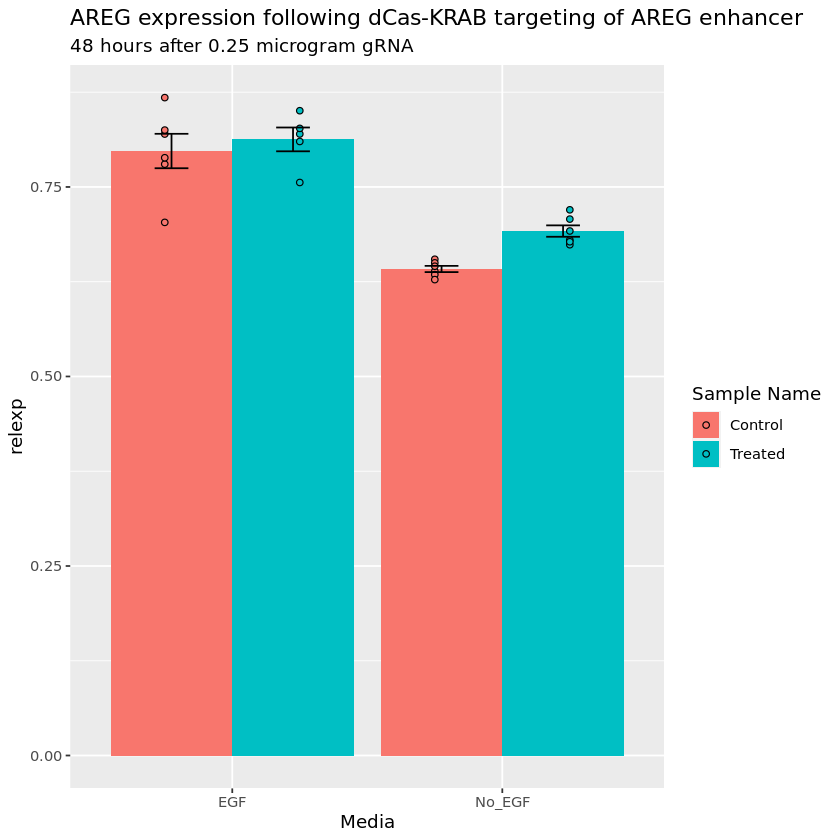

In [26]:
p <- combexps %>%
     ggplot(aes(x = Media, fill = `Sample Name`, y = relexp)) +
     geom_bar(position = "dodge", stat = "summary") + 
     geom_point(aes(x = Media), shape = 21, position = position_dodge(width = 1)) +
     ggtitle(label = "AREG expression following dCas-KRAB targeting of AREG enhancer",
             subtitle = "48 hours after 0.25 microgram gRNA") +
#      stat_compare_means(aes(group=Treatment), method = "t.test", label.y = 1.63) +
     geom_errorbar(stat = 'summary', position = position_dodge(width = .9), width = .25)
p

In [27]:
pdf(file = "CombinedqPCR.pdf", width = 8, height = 8)
p
dev.off()

No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


png 
  2

### EREG qPCR

In [3]:
EREG_qPCR <- read_csv(file = "4_26_EREGqPCR.csv") %>% as.data.frame()
EREG_qPCR20 <- read_csv(file = "5-10qPCR.csv") %>% as.data.frame()
EREG_qPCR
EREG_qPCR20

Rows: 82 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Sample Name, Target Name
dbl (1): CT

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 48 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Sample Name, Target Name
dbl (1): CT

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sample Name,Target Name,CT
<chr>,<chr>,<dbl>
WT-,ACTB,18.884
WT-,ACTB,18.348
WT-,ACTB,16.859
WT-,ACTB,21.028
WT-,ACTB,19.203
WT-,ACTB,17.789
WTA,ACTB,18.278
WTA,ACTB,17.232
WTA,ACTB,16.998


Sample Name,Target Name,CT
<chr>,<chr>,<dbl>
20-,ACTB,18.011
20-,ACTB,17.518
20-,ACTB,17.257
20-,ACTB,18.088
20-,ACTB,17.773
20-,ACTB,17.658
20a,ACTB,17.869
20a,ACTB,17.939
20a,ACTB,16.772


In [4]:
EREG_qPCR$`Sample Name`

[1] "WT-" "WT-" "WT-" "WT-" "WT-" "WT-" "WTA" "WTA" "WTA" "WTA" "WTA" "WTA"
[13] "WTA" "WTA" "WTA" "WTA" "WTA" "WTA" "9-"  "9-"  "9-"  "9-"  "9-"  "9-" 
[25] "9-"  "9-"  "9-"  "9-"  "9-"  "9-"  "9A"  "9A"  "9A"  "9A"  "9A"  "9A" 
[37] "9A"  "9A"  "9A"  "9A"  "9A"  "WT-" "WT-" "WT-" "WT-" "WT-" "WT-" "WTA"
[49] "WTA" "WTA" "WTA" "WTA" "WTA" "WTA" "WTA" "WTA" "WTA" "WTA" "WTA" "9-" 
[61] "9-"  "9-"  "9-"  "9-"  "9-"  "9-"  "9-"  "9-"  "9-"  "9-"  "9-"  "9A" 
[73] "9A"  "9A"  "9A"  "9A"  "9A"  "9A"  "9A"  "9A"  "9A"  "9A"

In [5]:
EREG_qPCR$Genotype <- c(rep("WT", 18),
                        rep("ex9", 23),
                        rep("WT", 18), 
                        rep("ex9", 23)) %>% as.factor() %>%
                        factor(levels = c("WT", "ex9"))
EREG_qPCR$Treatment <- c(rep("negative", 6),
                         rep("Enh_flanking", 12),
                         rep("negative", 12),
                         rep("Enh_flanking", 11),
                         rep("negative", 6),
                         rep("Enh_flanking", 12),
                         rep("negative", 12),
                         rep("Enh_flanking", 11)) %>% as.factor() %>% 
                         factor(levels = c("negative","Enh_flanking"))
EREG_qPCR

Sample Name,Target Name,CT,Genotype,Treatment
<chr>,<chr>,<dbl>,<fct>,<fct>
WT-,ACTB,18.884,WT,negative
WT-,ACTB,18.348,WT,negative
WT-,ACTB,16.859,WT,negative
WT-,ACTB,21.028,WT,negative
WT-,ACTB,19.203,WT,negative
WT-,ACTB,17.789,WT,negative
WTA,ACTB,18.278,WT,Enh_flanking
WTA,ACTB,17.232,WT,Enh_flanking
WTA,ACTB,16.998,WT,Enh_flanking


In [12]:
EREG_qPCR20 <- EREG_qPCR20 %>%
            mutate(Genotype = c(rep("ex20", 48))) %>%
            mutate(Treatment = c(rep("negative", 6),
                                 rep("Enh_flanking", 6),
                                 rep("negative", 6),
                                 rep("Enh_flanking", 6),
                                 rep("negative", 6),
                                 rep("Enh_flanking", 6),
                                 rep("negative", 6),
                                 rep("Enh_flanking", 6))
                  )
EREG_qPCR20$Treatment <- as.factor(EREG_qPCR20$Treatment)

In [13]:
EREG_qPCR20

Sample Name,Target Name,CT,Genotype,Treatment
<chr>,<chr>,<dbl>,<chr>,<fct>
20-,ACTB,18.011,ex20,negative
20-,ACTB,17.518,ex20,negative
20-,ACTB,17.257,ex20,negative
20-,ACTB,18.088,ex20,negative
20-,ACTB,17.773,ex20,negative
20-,ACTB,17.658,ex20,negative
20a,ACTB,17.869,ex20,Enh_flanking
20a,ACTB,17.939,ex20,Enh_flanking
20a,ACTB,16.772,ex20,Enh_flanking


In [6]:
EREG_qPCR_ACTB <- EREG_qPCR %>% filter(`Target Name` == "ACTB")
EREG_qPCR_EREG <- EREG_qPCR %>% filter(`Target Name` == "EREG")

In [14]:
EREG_qPCR20_ACTB <- EREG_qPCR20 %>% filter(`Target Name` == "ACTB")
EREG_qPCR20_EREG <- EREG_qPCR20 %>% filter(`Target Name` == "EREG")

In [7]:
EREG_qPCR_EREG

Sample Name,Target Name,CT,Genotype,Treatment
<chr>,<chr>,<dbl>,<fct>,<fct>
WT-,EREG,27.951,WT,negative
WT-,EREG,27.992,WT,negative
WT-,EREG,27.228,WT,negative
WT-,EREG,28.267,WT,negative
WT-,EREG,27.708,WT,negative
WT-,EREG,27.602,WT,negative
WTA,EREG,24.053,WT,Enh_flanking
WTA,EREG,23.368,WT,Enh_flanking
WTA,EREG,23.206,WT,Enh_flanking


In [18]:
EREG_qPCR_ACTB$EREG_CT <- EREG_qPCR_EREG$CT
EREG_qPCR_stack <- EREG_qPCR_ACTB
EREG_qPCR_stack

Sample Name,Target Name,CT,Genotype,Treatment,EREG_CT
<chr>,<chr>,<dbl>,<fct>,<fct>,<dbl>
WT-,ACTB,18.884,WT,negative,27.951
WT-,ACTB,18.348,WT,negative,27.992
WT-,ACTB,16.859,WT,negative,27.228
WT-,ACTB,21.028,WT,negative,28.267
WT-,ACTB,19.203,WT,negative,27.708
WT-,ACTB,17.789,WT,negative,27.602
WTA,ACTB,18.278,WT,Enh_flanking,24.053
WTA,ACTB,17.232,WT,Enh_flanking,23.368
WTA,ACTB,16.998,WT,Enh_flanking,23.206


In [15]:
EREG_qPCR20_ACTB$EREG_CT <- EREG_qPCR20_EREG$CT
EREG_qPCR20_stack <- EREG_qPCR20_ACTB
EREG_qPCR20_stack

Sample Name,Target Name,CT,Genotype,Treatment,EREG_CT
<chr>,<chr>,<dbl>,<chr>,<fct>,<dbl>
20-,ACTB,18.011,ex20,negative,31.391
20-,ACTB,17.518,ex20,negative,31.239
20-,ACTB,17.257,ex20,negative,31.165
20-,ACTB,18.088,ex20,negative,30.935
20-,ACTB,17.773,ex20,negative,31.230
20-,ACTB,17.658,ex20,negative,30.744
20a,ACTB,17.869,ex20,Enh_flanking,31.584
20a,ACTB,17.939,ex20,Enh_flanking,31.993
20a,ACTB,16.772,ex20,Enh_flanking,30.926


In [9]:
EREG_qPCR_stack$relexp <- (40 - EREG_qPCR_stack$EREG_CT) / (40 - EREG_qPCR_stack$CT)
EREG_qPCR_stack

Sample Name,Target Name,CT,Genotype,Treatment,EREG_CT,relexp
<chr>,<chr>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
WT-,ACTB,18.884,WT,negative,27.951,0.5706100
WT-,ACTB,18.348,WT,negative,27.992,0.5545908
WT-,ACTB,16.859,WT,negative,27.228,0.5519208
WT-,ACTB,21.028,WT,negative,28.267,0.6184377
WT-,ACTB,19.203,WT,negative,27.708,0.5910468
WT-,ACTB,17.789,WT,negative,27.602,0.5581919
WTA,ACTB,18.278,WT,Enh_flanking,24.053,0.7341405
WTA,ACTB,17.232,WT,Enh_flanking,23.368,0.7304989
WTA,ACTB,16.998,WT,Enh_flanking,23.206,0.7301104


In [19]:
EREG_qPCR_doublestack <- rbind(EREG_qPCR_stack, EREG_qPCR20_stack)
EREG_qPCR_doublestack$relexp <- (40 - EREG_qPCR_doublestack$EREG_CT) / (40 - EREG_qPCR_doublestack$CT)
EREG_qPCR_doublestack

Sample Name,Target Name,CT,Genotype,Treatment,EREG_CT,relexp
<chr>,<chr>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
WT-,ACTB,18.884,WT,negative,27.951,0.5706100
WT-,ACTB,18.348,WT,negative,27.992,0.5545908
WT-,ACTB,16.859,WT,negative,27.228,0.5519208
WT-,ACTB,21.028,WT,negative,28.267,0.6184377
WT-,ACTB,19.203,WT,negative,27.708,0.5910468
WT-,ACTB,17.789,WT,negative,27.602,0.5581919
WTA,ACTB,18.278,WT,Enh_flanking,24.053,0.7341405
WTA,ACTB,17.232,WT,Enh_flanking,23.368,0.7304989
WTA,ACTB,16.998,WT,Enh_flanking,23.206,0.7301104


No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


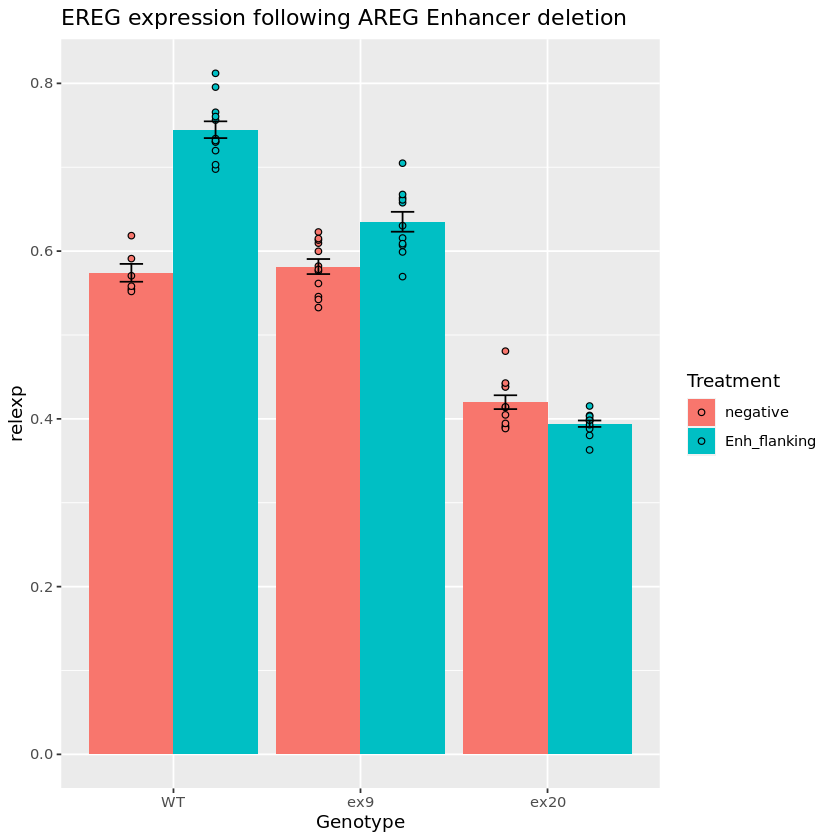

In [21]:
p <- EREG_qPCR_doublestack %>%
     ggplot(aes(x = Genotype, y = relexp, fill = Treatment)) +
     geom_bar(position = "dodge", stat = "summary") +
     geom_point(aes(x = Genotype), shape = 21, position = position_dodge(width = 0.9)) +
     geom_errorbar(stat = 'summary', position = position_dodge(width = .9), width = .25) +
     ggtitle("EREG expression following AREG Enhancer deletion")
p

In [22]:
ggsave(filename = "EREG_prelim.pdf", width = 8, height = 8, plot = p)

No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


# Reanalyzing the qPCR from 3/20 and 3/21

In [2]:
setwd("/data/park_lab/adam/SyntheticLethal/")
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()



## H1047R

In [3]:
Mar21Assay <- read_csv("2023-03-21_qPCR.csv") %>% as.data.frame()

Rows: 48 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Sample Name, Target Name, Task, Reporter, Quencher, CT

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
Mar21Assay

Sample Name,Target Name,Task,Reporter,Quencher,CT
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
20_0-,ACTB,UNKNOWN,SYBR,None,18.876
20_0-,ACTB,UNKNOWN,SYBR,None,17.932
20_0-,ACTB,UNKNOWN,SYBR,None,18.059
20_0-,ACTB,UNKNOWN,SYBR,None,17.681
20_0-,ACTB,UNKNOWN,SYBR,None,17.582
20_0-,ACTB,UNKNOWN,SYBR,None,17.701
20_0a,ACTB,UNKNOWN,SYBR,None,17.926
20_0a,ACTB,UNKNOWN,SYBR,None,17.849
20_0a,ACTB,UNKNOWN,SYBR,None,17.322


In [30]:
H1047RqPCRres <- Mar21Assay %>% filter(`Target Name` == "ACTB") %>% 
                select(c(1, 6))
# H1047RqPCRres
AREG_CT <- Mar21Assay %>% filter(`Target Name` == "AREG") %>% select(c(6))
# as.vector(AREG_CT)
H1047RqPCRres <- cbind(H1047RqPCRres, AREG_CT)
# H1047RqPCRres
names(H1047RqPCRres) <- c("sampleID", "ACTB_CT", "AREG_CT")
H1047RqPCRres <- H1047RqPCRres %>% filter(!AREG_CT == "Undetermined")
H1047RqPCRres$Genotype <- c(rep("H1047R", 23))
H1047RqPCRres$Media <- c(rep("No_EGF", 11), rep("EGF", 12))
H1047RqPCRres$gRNA <- c(rep("Negative", 5), rep("AREGflanking", 6),
                        rep("Negative", 6), rep("AREGflanking", 6))
H1047RqPCRres$ACTB_CT <- as.numeric(H1047RqPCRres$ACTB_CT)
H1047RqPCRres$AREG_CT <- as.numeric(H1047RqPCRres$AREG_CT)
H1047RqPCRres$deltCT <- H1047RqPCRres$AREG_CT - H1047RqPCRres$ACTB_CT
H1047RqPCRres

sampleID,ACTB_CT,AREG_CT,Genotype,Media,gRNA,deltCT
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
20_0-,17.932,25.981,H1047R,No_EGF,Negative,8.049
20_0-,18.059,27.651,H1047R,No_EGF,Negative,9.592
20_0-,17.681,25.643,H1047R,No_EGF,Negative,7.962
20_0-,17.582,26.486,H1047R,No_EGF,Negative,8.904
20_0-,17.701,25.848,H1047R,No_EGF,Negative,8.147
20_0a,17.926,27.985,H1047R,No_EGF,AREGflanking,10.059
20_0a,17.849,27.957,H1047R,No_EGF,AREGflanking,10.108
20_0a,17.322,27.428,H1047R,No_EGF,AREGflanking,10.106
20_0a,17.974,27.921,H1047R,No_EGF,AREGflanking,9.947


In [31]:
H1047RqPCRres_noEGF <- H1047RqPCRres %>% filter(Media == "No_EGF")
H1047RqPCRres_EGF <- H1047RqPCRres %>% filter(Media == "EGF")
H1047RqPCRres_noEGF
H1047RqPCRres_EGF

sampleID,ACTB_CT,AREG_CT,Genotype,Media,gRNA,deltCT
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
20_0-,17.932,25.981,H1047R,No_EGF,Negative,8.049
20_0-,18.059,27.651,H1047R,No_EGF,Negative,9.592
20_0-,17.681,25.643,H1047R,No_EGF,Negative,7.962
20_0-,17.582,26.486,H1047R,No_EGF,Negative,8.904
20_0-,17.701,25.848,H1047R,No_EGF,Negative,8.147
20_0a,17.926,27.985,H1047R,No_EGF,AREGflanking,10.059
20_0a,17.849,27.957,H1047R,No_EGF,AREGflanking,10.108
20_0a,17.322,27.428,H1047R,No_EGF,AREGflanking,10.106
20_0a,17.974,27.921,H1047R,No_EGF,AREGflanking,9.947


sampleID,ACTB_CT,AREG_CT,Genotype,Media,gRNA,deltCT
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
20e-,20.457,26.677,H1047R,EGF,Negative,6.220
20e-,19.607,25.956,H1047R,EGF,Negative,6.349
20e-,18.984,25.956,H1047R,EGF,Negative,6.972
20e-,18.801,25.857,H1047R,EGF,Negative,7.056
20e-,18.677,25.994,H1047R,EGF,Negative,7.317
20e-,18.574,25.493,H1047R,EGF,Negative,6.919
20ea,18.851,27.284,H1047R,EGF,AREGflanking,8.433
20ea,18.895,27.206,H1047R,EGF,AREGflanking,8.311
20ea,18.659,26.713,H1047R,EGF,AREGflanking,8.054


In [37]:
H1047R_noEGF_controlgeomean <- H1047RqPCRres_noEGF %>% filter(gRNA == "Negative") %>%
                            select(c(7))
H1047R_noEGF_controlgeomean <- exp(mean(log(
                            H1047R_noEGF_controlgeomean$deltCT)))
H1047R_noEGF_controlgeomean
H1047R_EGF_controlgeomean <- H1047RqPCRres_EGF %>% filter(gRNA == "Negative") %>%
                            select(c(7))
H1047R_EGF_controlgeomean <- exp(mean(log(
                            H1047R_EGF_controlgeomean$deltCT)))
H1047R_EGF_controlgeomean

[1] 8.508465

[1] 6.794091

In [38]:
H1047RqPCRres_noEGF$deltdeltCT <- H1047RqPCRres_noEGF$deltCT - H1047R_noEGF_controlgeomean
H1047RqPCRres_EGF$deltdeltCT <- H1047RqPCRres_EGF$deltCT - H1047R_EGF_controlgeomean
H1047RqPCRres_noEGF
H1047RqPCRres_EGF

sampleID,ACTB_CT,AREG_CT,Genotype,Media,gRNA,deltCT,deltdeltCT
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
20_0-,17.932,25.981,H1047R,No_EGF,Negative,8.049,-0.45946521
20_0-,18.059,27.651,H1047R,No_EGF,Negative,9.592,1.08353479
20_0-,17.681,25.643,H1047R,No_EGF,Negative,7.962,-0.54646521
20_0-,17.582,26.486,H1047R,No_EGF,Negative,8.904,0.39553479
20_0-,17.701,25.848,H1047R,No_EGF,Negative,8.147,-0.36146521
20_0a,17.926,27.985,H1047R,No_EGF,AREGflanking,10.059,1.55053479
20_0a,17.849,27.957,H1047R,No_EGF,AREGflanking,10.108,1.59953479
20_0a,17.322,27.428,H1047R,No_EGF,AREGflanking,10.106,1.59753479
20_0a,17.974,27.921,H1047R,No_EGF,AREGflanking,9.947,1.43853479


sampleID,ACTB_CT,AREG_CT,Genotype,Media,gRNA,deltCT,deltdeltCT
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
20e-,20.457,26.677,H1047R,EGF,Negative,6.220,-0.5740907
20e-,19.607,25.956,H1047R,EGF,Negative,6.349,-0.4450907
20e-,18.984,25.956,H1047R,EGF,Negative,6.972,0.1779093
20e-,18.801,25.857,H1047R,EGF,Negative,7.056,0.2619093
20e-,18.677,25.994,H1047R,EGF,Negative,7.317,0.5229093
20e-,18.574,25.493,H1047R,EGF,Negative,6.919,0.1249093
20ea,18.851,27.284,H1047R,EGF,AREGflanking,8.433,1.6389093
20ea,18.895,27.206,H1047R,EGF,AREGflanking,8.311,1.5169093
20ea,18.659,26.713,H1047R,EGF,AREGflanking,8.054,1.2599093


In [39]:
H1047RqPCRres_noEGF$foldexpression <- 2^-(H1047RqPCRres_noEGF$deltdeltCT)
H1047RqPCRres_noEGF

sampleID,ACTB_CT,AREG_CT,Genotype,Media,gRNA,deltCT,deltdeltCT,foldexpression
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
20_0-,17.932,25.981,H1047R,No_EGF,Negative,8.049,-0.45946521,1.3750320
20_0-,18.059,27.651,H1047R,No_EGF,Negative,9.592,1.08353479,0.4718713
20_0-,17.681,25.643,H1047R,No_EGF,Negative,7.962,-0.54646521,1.4605029
20_0-,17.582,26.486,H1047R,No_EGF,Negative,8.904,0.39553479,0.7602075
20_0-,17.701,25.848,H1047R,No_EGF,Negative,8.147,-0.36146521,1.2847300
20_0a,17.926,27.985,H1047R,No_EGF,AREGflanking,10.059,1.55053479,0.3413835
20_0a,17.849,27.957,H1047R,No_EGF,AREGflanking,10.108,1.59953479,0.3299834
20_0a,17.322,27.428,H1047R,No_EGF,AREGflanking,10.106,1.59753479,0.3304411
20_0a,17.974,27.921,H1047R,No_EGF,AREGflanking,9.947,1.43853479,0.3689418


In [40]:
H1047RqPCRres_EGF$foldexpression <- 2^-(H1047RqPCRres_EGF$deltdeltCT)
H1047RqPCRres_EGF

sampleID,ACTB_CT,AREG_CT,Genotype,Media,gRNA,deltCT,deltdeltCT,foldexpression
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
20e-,20.457,26.677,H1047R,EGF,Negative,6.220,-0.5740907,1.4887389
20e-,19.607,25.956,H1047R,EGF,Negative,6.349,-0.4450907,1.3613997
20e-,18.984,25.956,H1047R,EGF,Negative,6.972,0.1779093,0.8839831
20e-,18.801,25.857,H1047R,EGF,Negative,7.056,0.2619093,0.8339835
20e-,18.677,25.994,H1047R,EGF,Negative,7.317,0.5229093,0.6959670
20e-,18.574,25.493,H1047R,EGF,Negative,6.919,0.1249093,0.9170617
20ea,18.851,27.284,H1047R,EGF,AREGflanking,8.433,1.6389093,0.3210991
20ea,18.895,27.206,H1047R,EGF,AREGflanking,8.311,1.5169093,0.3494337
20ea,18.659,26.713,H1047R,EGF,AREGflanking,8.054,1.2599093,0.4175702


In [41]:
H1047R_totalqPCRres <- rbind(H1047RqPCRres_noEGF, H1047RqPCRres_EGF)
H1047R_totalqPCRres

sampleID,ACTB_CT,AREG_CT,Genotype,Media,gRNA,deltCT,deltdeltCT,foldexpression
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
20_0-,17.932,25.981,H1047R,No_EGF,Negative,8.049,-0.45946521,1.3750320
20_0-,18.059,27.651,H1047R,No_EGF,Negative,9.592,1.08353479,0.4718713
20_0-,17.681,25.643,H1047R,No_EGF,Negative,7.962,-0.54646521,1.4605029
20_0-,17.582,26.486,H1047R,No_EGF,Negative,8.904,0.39553479,0.7602075
20_0-,17.701,25.848,H1047R,No_EGF,Negative,8.147,-0.36146521,1.2847300
20_0a,17.926,27.985,H1047R,No_EGF,AREGflanking,10.059,1.55053479,0.3413835
20_0a,17.849,27.957,H1047R,No_EGF,AREGflanking,10.108,1.59953479,0.3299834
20_0a,17.322,27.428,H1047R,No_EGF,AREGflanking,10.106,1.59753479,0.3304411
20_0a,17.974,27.921,H1047R,No_EGF,AREGflanking,9.947,1.43853479,0.3689418


added to prism

In [42]:
Mar20Assay <- read_csv("2023-03-20_qPCR.csv") %>% as.data.frame()
Mar20Assay

Rows: 84 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Sample Name, Target Name, Task, Reporter, Quencher, CT
dbl (2): Ct Mean, Ct SD

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sample Name,Target Name,Task,Reporter,Quencher,CT,Ct Mean,Ct SD
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
W-,actb,UNKNOWN,SYBR,None,20.160,19.213,1.122
W-,actb,UNKNOWN,SYBR,None,19.506,19.213,1.122
W-,actb,UNKNOWN,SYBR,None,17.973,19.213,1.122
wa,actb,UNKNOWN,SYBR,None,22.163,20.353,1.768
wa,actb,UNKNOWN,SYBR,None,20.264,20.353,1.768
wa,actb,UNKNOWN,SYBR,None,18.631,20.353,1.768
we-,actb,UNKNOWN,SYBR,None,19.787,18.873,0.941
we-,actb,UNKNOWN,SYBR,None,18.458,18.873,0.941
we-,actb,UNKNOWN,SYBR,None,18.384,18.873,0.941


## WT and E545K

In [43]:
Mar20Assay <- read_csv("2023-03-20_qPCR.csv") %>% as.data.frame()
Mar20Assay

Rows: 84 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Sample Name, Target Name, Task, Reporter, Quencher, CT
dbl (2): Ct Mean, Ct SD

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sample Name,Target Name,Task,Reporter,Quencher,CT,Ct Mean,Ct SD
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
W-,actb,UNKNOWN,SYBR,None,20.160,19.213,1.122
W-,actb,UNKNOWN,SYBR,None,19.506,19.213,1.122
W-,actb,UNKNOWN,SYBR,None,17.973,19.213,1.122
wa,actb,UNKNOWN,SYBR,None,22.163,20.353,1.768
wa,actb,UNKNOWN,SYBR,None,20.264,20.353,1.768
wa,actb,UNKNOWN,SYBR,None,18.631,20.353,1.768
we-,actb,UNKNOWN,SYBR,None,19.787,18.873,0.941
we-,actb,UNKNOWN,SYBR,None,18.458,18.873,0.941
we-,actb,UNKNOWN,SYBR,None,18.384,18.873,0.941


In [47]:
Mar20Assay$`Sample Name`
summary(as.factor(Mar20Assay$`Sample Name`))

[1] "W-"  "W-"  "W-"  "wa"  "wa"  "wa"  "we-" "we-" "we-" "we-" "we-" "we-"
[13] "wea" "wea" "wea" "wea" "wea" "wea" "9-"  "9-"  "9-"  "9-"  "9-"  "9-" 
[25] "9a"  "9a"  "9a"  "9a"  "9a"  "9a"  "9e-" "9e-" "9e-" "9e-" "9e-" "9e-"
[37] "9ea" "9ea" "9ea" "9ea" "9ea" "9ea" "W-"  "W-"  "W-"  "wa"  "wa"  "wa" 
[49] "we-" "we-" "we-" "we-" "we-" "we-" "wea" "wea" "wea" "wea" "wea" "wea"
[61] "9-"  "9-"  "9-"  "9-"  "9-"  "9-"  "9a"  "9a"  "9a"  "9a"  "9a"  "9a" 
[73] "9e-" "9e-" "9e-" "9e-" "9e-" "9e-" "9ea" "9ea" "9ea" "9ea" "9ea" "9ea"

9-  9a 9e- 9ea  W-  wa we- wea 
 12  12  12  12   6   6  12  12

In [53]:
qPCRres <- Mar20Assay %>% filter(`Target Name` == "actb") %>% 
                select(c(1, 6))
# H1047RqPCRres
AREG_CT <- Mar20Assay %>% filter(`Target Name` == "areg") %>% select(c(6))
# as.vector(AREG_CT)
qPCRres <- cbind(qPCRres, AREG_CT)
names(qPCRres) <- c("sampleID", "ACTB_CT", "AREG_CT")

qPCRres$Genotype <- c(rep("WT", 18), rep("E545K", 24))
qPCRres$Media <- c(rep("No_EGF", 6), rep("EGF", 12),
                   rep("No_EGF", 12), rep("EGF", 12))
qPCRres$gRNA <- c(rep("Negative", 3), rep("AREGflanking", 3),
                  rep("Negative", 6), rep("AREGflanking", 6),
                  rep("Negative", 6), rep("AREGflanking", 6),
                  rep("Negative", 6), rep("AREGflanking", 6))
qPCRres <- qPCRres %>% filter(!AREG_CT == "Undetermined")
qPCRres$ACTB_CT <- as.numeric(qPCRres$ACTB_CT)
qPCRres$AREG_CT <- as.numeric(qPCRres$AREG_CT)
qPCRres$deltCT <- qPCRres$AREG_CT - qPCRres$ACTB_CT
qPCRres

sampleID,ACTB_CT,AREG_CT,Genotype,Media,gRNA,deltCT
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
W-,20.160,33.347,WT,No_EGF,Negative,13.187
W-,19.506,31.841,WT,No_EGF,Negative,12.335
W-,17.973,30.471,WT,No_EGF,Negative,12.498
wa,22.163,33.315,WT,No_EGF,AREGflanking,11.152
wa,20.264,32.781,WT,No_EGF,AREGflanking,12.517
wa,18.631,30.903,WT,No_EGF,AREGflanking,12.272
we-,19.787,27.254,WT,EGF,Negative,7.467
we-,18.458,27.369,WT,EGF,Negative,8.911
we-,18.384,26.507,WT,EGF,Negative,8.123


In [54]:
WTqPCRres <- qPCRres %>% filter(Genotype == "WT")
E545KqPCRres <- qPCRres %>% filter(Genotype == "E545K")

In [55]:
WTqPCRres_noEGF <- WTqPCRres %>% filter(Media == "No_EGF")
WTqPCRres_EGF <- WTqPCRres %>% filter(Media == "EGF")
WTqPCRres_noEGF
WTqPCRres_EGF

sampleID,ACTB_CT,AREG_CT,Genotype,Media,gRNA,deltCT
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
W-,20.160,33.347,WT,No_EGF,Negative,13.187
W-,19.506,31.841,WT,No_EGF,Negative,12.335
W-,17.973,30.471,WT,No_EGF,Negative,12.498
wa,22.163,33.315,WT,No_EGF,AREGflanking,11.152
wa,20.264,32.781,WT,No_EGF,AREGflanking,12.517
wa,18.631,30.903,WT,No_EGF,AREGflanking,12.272


sampleID,ACTB_CT,AREG_CT,Genotype,Media,gRNA,deltCT
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
we-,19.787,27.254,WT,EGF,Negative,7.467
we-,18.458,27.369,WT,EGF,Negative,8.911
we-,18.384,26.507,WT,EGF,Negative,8.123
we-,17.620,25.160,WT,EGF,Negative,7.540
we-,18.851,26.574,WT,EGF,Negative,7.723
we-,20.142,26.547,WT,EGF,Negative,6.405
wea,17.994,27.032,WT,EGF,AREGflanking,9.038
wea,18.624,27.780,WT,EGF,AREGflanking,9.156
wea,22.104,29.036,WT,EGF,AREGflanking,6.932


In [56]:
E545KqPCRres_noEGF <- E545KqPCRres %>% filter(Media == "No_EGF")
E545KqPCRres_EGF <- E545KqPCRres %>% filter(Media == "EGF")
E545KqPCRres_noEGF
E545KqPCRres_EGF

sampleID,ACTB_CT,AREG_CT,Genotype,Media,gRNA,deltCT
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
9-,20.819,27.395,E545K,No_EGF,Negative,6.576
9-,20.124,26.525,E545K,No_EGF,Negative,6.401
9-,21.889,27.729,E545K,No_EGF,Negative,5.840
9-,18.584,26.561,E545K,No_EGF,Negative,7.977
9-,21.474,27.918,E545K,No_EGF,Negative,6.444
9-,18.568,26.299,E545K,No_EGF,Negative,7.731
9a,24.623,31.426,E545K,No_EGF,AREGflanking,6.803
9a,23.822,30.851,E545K,No_EGF,AREGflanking,7.029
9a,18.698,26.564,E545K,No_EGF,AREGflanking,7.866


sampleID,ACTB_CT,AREG_CT,Genotype,Media,gRNA,deltCT
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
9e-,22.031,25.983,E545K,EGF,Negative,3.952
9e-,22.673,26.139,E545K,EGF,Negative,3.466
9e-,18.206,23.790,E545K,EGF,Negative,5.584
9e-,18.584,25.061,E545K,EGF,Negative,6.477
9e-,19.525,26.114,E545K,EGF,Negative,6.589
9e-,18.682,24.855,E545K,EGF,Negative,6.173
9ea,19.273,26.397,E545K,EGF,AREGflanking,7.124
9ea,18.991,25.777,E545K,EGF,AREGflanking,6.786
9ea,19.347,26.730,E545K,EGF,AREGflanking,7.383


In [57]:
WT_noEGF_controlgeomean <- WTqPCRres_noEGF %>% filter(gRNA == "Negative") %>%
                            select(c(7))
WT_noEGF_controlgeomean <- exp(mean(log(
                            WT_noEGF_controlgeomean$deltCT)))
WT_noEGF_controlgeomean
WT_EGF_controlgeomean <- WTqPCRres_EGF %>% filter(gRNA == "Negative") %>%
                            select(c(7))
WT_EGF_controlgeomean <- exp(mean(log(
                            WT_EGF_controlgeomean$deltCT)))
WT_EGF_controlgeomean

[1] 12.66801

[1] 7.657334

In [58]:
E545K_noEGF_controlgeomean <- E545KqPCRres_noEGF %>% filter(gRNA == "Negative") %>%
                            select(c(7))
E545K_noEGF_controlgeomean <- exp(mean(log(
                            E545K_noEGF_controlgeomean$deltCT)))
E545K_noEGF_controlgeomean
E545K_EGF_controlgeomean <- E545KqPCRres_EGF %>% filter(gRNA == "Negative") %>%
                            select(c(7))
E545K_EGF_controlgeomean <- exp(mean(log(
                            E545K_EGF_controlgeomean$deltCT)))
E545K_EGF_controlgeomean

[1] 6.786443

[1] 5.216511

In [59]:
WTqPCRres_noEGF$deltdeltCT <- WTqPCRres_noEGF$deltCT - WT_noEGF_controlgeomean
WTqPCRres_EGF$deltdeltCT <- WTqPCRres_EGF$deltCT - WT_EGF_controlgeomean
WTqPCRres_noEGF
WTqPCRres_EGF

sampleID,ACTB_CT,AREG_CT,Genotype,Media,gRNA,deltCT,deltdeltCT
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
W-,20.160,33.347,WT,No_EGF,Negative,13.187,0.5189853
W-,19.506,31.841,WT,No_EGF,Negative,12.335,-0.3330147
W-,17.973,30.471,WT,No_EGF,Negative,12.498,-0.1700147
wa,22.163,33.315,WT,No_EGF,AREGflanking,11.152,-1.5160147
wa,20.264,32.781,WT,No_EGF,AREGflanking,12.517,-0.1510147
wa,18.631,30.903,WT,No_EGF,AREGflanking,12.272,-0.3960147


sampleID,ACTB_CT,AREG_CT,Genotype,Media,gRNA,deltCT,deltdeltCT
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
we-,19.787,27.254,WT,EGF,Negative,7.467,-0.19033406
we-,18.458,27.369,WT,EGF,Negative,8.911,1.25366594
we-,18.384,26.507,WT,EGF,Negative,8.123,0.46566594
we-,17.620,25.160,WT,EGF,Negative,7.540,-0.11733406
we-,18.851,26.574,WT,EGF,Negative,7.723,0.06566594
we-,20.142,26.547,WT,EGF,Negative,6.405,-1.25233406
wea,17.994,27.032,WT,EGF,AREGflanking,9.038,1.38066594
wea,18.624,27.780,WT,EGF,AREGflanking,9.156,1.49866594
wea,22.104,29.036,WT,EGF,AREGflanking,6.932,-0.72533406


In [60]:
E545KqPCRres_noEGF$deltdeltCT <- E545KqPCRres_noEGF$deltCT - E545K_noEGF_controlgeomean
E545KqPCRres_EGF$deltdeltCT <- E545KqPCRres_EGF$deltCT - E545K_EGF_controlgeomean
E545KqPCRres_noEGF
E545KqPCRres_EGF

sampleID,ACTB_CT,AREG_CT,Genotype,Media,gRNA,deltCT,deltdeltCT
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
9-,20.819,27.395,E545K,No_EGF,Negative,6.576,-0.21044311
9-,20.124,26.525,E545K,No_EGF,Negative,6.401,-0.38544311
9-,21.889,27.729,E545K,No_EGF,Negative,5.840,-0.94644311
9-,18.584,26.561,E545K,No_EGF,Negative,7.977,1.19055689
9-,21.474,27.918,E545K,No_EGF,Negative,6.444,-0.34244311
9-,18.568,26.299,E545K,No_EGF,Negative,7.731,0.94455689
9a,24.623,31.426,E545K,No_EGF,AREGflanking,6.803,0.01655689
9a,23.822,30.851,E545K,No_EGF,AREGflanking,7.029,0.24255689
9a,18.698,26.564,E545K,No_EGF,AREGflanking,7.866,1.07955689


sampleID,ACTB_CT,AREG_CT,Genotype,Media,gRNA,deltCT,deltdeltCT
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
9e-,22.031,25.983,E545K,EGF,Negative,3.952,-1.2645106
9e-,22.673,26.139,E545K,EGF,Negative,3.466,-1.7505106
9e-,18.206,23.790,E545K,EGF,Negative,5.584,0.3674894
9e-,18.584,25.061,E545K,EGF,Negative,6.477,1.2604894
9e-,19.525,26.114,E545K,EGF,Negative,6.589,1.3724894
9e-,18.682,24.855,E545K,EGF,Negative,6.173,0.9564894
9ea,19.273,26.397,E545K,EGF,AREGflanking,7.124,1.9074894
9ea,18.991,25.777,E545K,EGF,AREGflanking,6.786,1.5694894
9ea,19.347,26.730,E545K,EGF,AREGflanking,7.383,2.1664894


In [61]:
WTqPCRres_noEGF$foldexpression <- 2^-(WTqPCRres_noEGF$deltdeltCT)
WTqPCRres_noEGF

sampleID,ACTB_CT,AREG_CT,Genotype,Media,gRNA,deltCT,deltdeltCT,foldexpression
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
W-,20.160,33.347,WT,No_EGF,Negative,13.187,0.5189853,0.6978625
W-,19.506,31.841,WT,No_EGF,Negative,12.335,-0.3330147,1.2596429
W-,17.973,30.471,WT,No_EGF,Negative,12.498,-0.1700147,1.1250700
wa,22.163,33.315,WT,No_EGF,AREGflanking,11.152,-1.5160147,2.8599992
wa,20.264,32.781,WT,No_EGF,AREGflanking,12.517,-0.1510147,1.1103502
wa,18.631,30.903,WT,No_EGF,AREGflanking,12.272,-0.3960147,1.3158680


In [62]:
E545KqPCRres_noEGF$foldexpression <- 2^-(E545KqPCRres_noEGF$deltdeltCT)
E545KqPCRres_noEGF

sampleID,ACTB_CT,AREG_CT,Genotype,Media,gRNA,deltCT,deltdeltCT,foldexpression
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
9-,20.819,27.395,E545K,No_EGF,Negative,6.576,-0.21044311,1.1570435
9-,20.124,26.525,E545K,No_EGF,Negative,6.401,-0.38544311,1.3062609
9-,21.889,27.729,E545K,No_EGF,Negative,5.840,-0.94644311,1.9271156
9-,18.584,26.561,E545K,No_EGF,Negative,7.977,1.19055689,0.4381337
9-,21.474,27.918,E545K,No_EGF,Negative,6.444,-0.34244311,1.2679019
9-,18.568,26.299,E545K,No_EGF,Negative,7.731,0.94455689,0.5195891
9a,24.623,31.426,E545K,No_EGF,AREGflanking,6.803,0.01655689,0.9885892
9a,23.822,30.851,E545K,No_EGF,AREGflanking,7.029,0.24255689,0.8452460
9a,18.698,26.564,E545K,No_EGF,AREGflanking,7.866,1.07955689,0.4731741


In [63]:
WTqPCRres_EGF$foldexpression <- 2^-(WTqPCRres_EGF$deltdeltCT)
WTqPCRres_EGF

sampleID,ACTB_CT,AREG_CT,Genotype,Media,gRNA,deltCT,deltdeltCT,foldexpression
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
we-,19.787,27.254,WT,EGF,Negative,7.467,-0.19033406,1.1410279
we-,18.458,27.369,WT,EGF,Negative,8.911,1.25366594,0.4193812
we-,18.384,26.507,WT,EGF,Negative,8.123,0.46566594,0.7241367
we-,17.620,25.160,WT,EGF,Negative,7.540,-0.11733406,1.0847285
we-,18.851,26.574,WT,EGF,Negative,7.723,0.06566594,0.9555042
we-,20.142,26.547,WT,EGF,Negative,6.405,-1.25233406,2.3822652
wea,17.994,27.032,WT,EGF,AREGflanking,9.038,1.38066594,0.3840415
wea,18.624,27.780,WT,EGF,AREGflanking,9.156,1.49866594,0.3538805
wea,22.104,29.036,WT,EGF,AREGflanking,6.932,-0.72533406,1.6532834


In [64]:
E545KqPCRres_EGF$foldexpression <- 2^-(E545KqPCRres_EGF$deltdeltCT)
E545KqPCRres_EGF

sampleID,ACTB_CT,AREG_CT,Genotype,Media,gRNA,deltCT,deltdeltCT,foldexpression
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
9e-,22.031,25.983,E545K,EGF,Negative,3.952,-1.2645106,2.4024571
9e-,22.673,26.139,E545K,EGF,Negative,3.466,-1.7505106,3.3647764
9e-,18.206,23.790,E545K,EGF,Negative,5.584,0.3674894,0.7751302
9e-,18.584,25.061,E545K,EGF,Negative,6.477,1.2604894,0.4174024
9e-,19.525,26.114,E545K,EGF,Negative,6.589,1.3724894,0.3862242
9e-,18.682,24.855,E545K,EGF,Negative,6.173,0.9564894,0.5153093
9ea,19.273,26.397,E545K,EGF,AREGflanking,7.124,1.9074894,0.2665560
9ea,18.991,25.777,E545K,EGF,AREGflanking,6.786,1.5694894,0.3369276
9ea,19.347,26.730,E545K,EGF,AREGflanking,7.383,2.1664894,0.2227521


# Reanalyzing the 3-13 Analysis

In [1]:
library(tidyverse)
setwd("/data/park_lab/adam/SyntheticLethal/")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()



In [2]:
Mar13_assay <- read_csv(file = "Summary__Sample Set (3-13-2023)_20230313_155551.csv") %>% as.data.frame()
Mar13_assay

Rows: 68 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): Sample ID, Cell type, Decluster degree, Analysis date/time, Analys...
dbl (24): Cell count, Viable cells, Total (x10^6) cells/mL, Viable (x10^6) c...
lgl  (3): Reanalysis date/time, Reanalysis by, Tag

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sample ID,Cell count,Viable cells,Total (x10^6) cells/mL,Viable (x10^6) cells/mL,Viability (%),Average diameter (µm),Average viable diameter (µm),Average circularity,Average viable circularity,⋯,Viable spot brightness (%),Viable spot area (%),Mixing cycles,Analysis date/time,Reanalysis date/time,Analysis by,Reanalysis by,Dilution,Wash,Tag
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<lgl>,<dbl>,<chr>,<lgl>
wte-,5737,5669,2.05,2.03,98.81000,17.59000,17.69000,0.8600000,0.8600000,⋯,50,5,3,3/13/2023 1:24:29 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
wte-,6414,6280,2.29,2.24,97.91082,16.67636,16.82483,0.8580933,0.8612931,⋯,NA,NA,0,3/13/2023 1:26:45 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
wte-,7265,7101,2.60,2.54,97.74260,16.00778,16.14856,0.8530189,0.8560738,⋯,NA,NA,0,3/13/2023 1:29:04 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
wte-,8364,8178,2.99,2.92,97.77618,15.77601,15.91615,0.8526158,0.8558877,⋯,NA,NA,0,3/13/2023 1:31:21 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
wtea,5296,5174,1.89,1.85,97.70000,17.17000,17.35000,0.8500000,0.8600000,⋯,50,5,3,3/13/2023 1:33:37 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
wtea,4919,4808,1.76,1.72,97.74345,17.78322,17.95021,0.8675846,0.8717248,⋯,NA,NA,0,3/13/2023 1:35:52 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
wtea,4614,4509,1.65,1.61,97.72432,16.78213,16.94496,0.8568171,0.8601212,⋯,NA,NA,0,3/13/2023 1:38:07 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
wtea,8619,8493,3.08,3.03,98.53812,16.69166,16.79294,0.8645087,0.8668876,⋯,NA,NA,0,3/13/2023 1:40:23 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
wt-,707,685,0.25,0.24,96.89000,16.00000,16.23000,0.8800000,0.8800000,⋯,50,5,3,3/13/2023 1:42:37 PM,NA,Vi-CELL,NA,1,Normal Wash,NA


In [5]:
Mar13_assay_select <- Mar13_assay %>% select(c(1,3))
Mar13_assay_select$`Sample ID`
Mar13_assay_select$Genotype <- c(
    rep("WT", 20),
    rep("E545K", 24),
    rep("H1047R", 24))
Mar13_assay_select$gRNA <- c(
    rep("Negative", 4),
    rep("AREG-flanking", 4),
    rep("Negative", 6),
    rep("AREG-flanking", 6),
    rep("Negative", 6),
    rep("AREG-flanking", 6),
    rep("Negative", 6),
    rep("AREG-flanking", 6),
    rep("Negative", 6),
    rep("AREG-flanking", 6),
    rep("Negative", 6),
    rep("AREG-flanking", 6)
    )
Mar13_assay_select$Media <- c(
    rep("EGF", 8),
    rep("No_EGF", 12),
    rep("EGF", 12),
    rep("No_EGF", 12),
    rep("EGF", 12),
    rep("No_EGF", 12)
    )
Mar13_assay_select

[1] "wte-" "wte-" "wte-" "wte-" "wtea" "wtea" "wtea" "wtea" "wt-"  "wt-" 
[11] "wt-"  "wt-"  "wt-"  "wt-"  "wta"  "wta"  "wta"  "wta"  "wta"  "wta" 
[21] "9e-"  "9e-"  "9e-"  "9e-"  "9e-"  "9e-"  "9ea"  "9ea"  "9ea"  "9ea" 
[31] "9ea"  "9ea"  "9-"   "9-"   "9-"   "9-"   "9-"   "9-"   "9a"   "9a"  
[41] "9a"   "9a"   "9a"   "9a"   "20e-" "20e-" "20e-" "20e-" "20e-" "20e-"
[51] "20ea" "20ea" "20ea" "20ea" "20ea" "20ea" "20-"  "20-"  "20-"  "20-" 
[61] "20-"  "20-"  "20a"  "20a"  "20a"  "20a"  "20a"  "20a"

Sample ID,Viable cells,Genotype,gRNA,Media
<chr>,<dbl>,<chr>,<chr>,<chr>
wte-,5669,WT,Negative,EGF
wte-,6280,WT,Negative,EGF
wte-,7101,WT,Negative,EGF
wte-,8178,WT,Negative,EGF
wtea,5174,WT,AREG-flanking,EGF
wtea,4808,WT,AREG-flanking,EGF
wtea,4509,WT,AREG-flanking,EGF
wtea,8493,WT,AREG-flanking,EGF
wt-,685,WT,Negative,No_EGF


In [6]:
EGFsurvRes <- Mar13_assay_select %>% filter(Media == "EGF")
NoEGFsurvRes <- Mar13_assay_select %>% filter(Media == "No_EGF")
EGFsurvRes

Sample ID,Viable cells,Genotype,gRNA,Media
<chr>,<dbl>,<chr>,<chr>,<chr>
wte-,5669,WT,Negative,EGF
wte-,6280,WT,Negative,EGF
wte-,7101,WT,Negative,EGF
wte-,8178,WT,Negative,EGF
wtea,5174,WT,AREG-flanking,EGF
wtea,4808,WT,AREG-flanking,EGF
wtea,4509,WT,AREG-flanking,EGF
wtea,8493,WT,AREG-flanking,EGF
9e-,6042,E545K,Negative,EGF


In [8]:
WT_EGFsurvRes <- EGFsurvRes %>% filter(Genotype == "WT")
E545K_EGFsurvRes <- EGFsurvRes %>% filter(Genotype == "E545K")
H1047R_EGFsurvRes <- EGFsurvRes %>% filter(Genotype == "H1047R")

WT_NoEGFsurvRes <- NoEGFsurvRes %>% filter(Genotype == "WT")
E545K_NoEGFsurvRes <- NoEGFsurvRes %>% filter(Genotype == "E545K")
H1047R_NoEGFsurvRes <- NoEGFsurvRes %>% filter(Genotype == "H1047R")

In [10]:
WT_EGFnormfactor <- WT_EGFsurvRes %>% filter(gRNA == "Negative")
E545K_EGFnormfactor <- E545K_EGFsurvRes %>% filter(gRNA == "Negative")
H1047R_EGFnormfactor <- H1047R_EGFsurvRes %>% filter(gRNA == "Negative")
WT_EGFnormfactor <- mean(WT_EGFnormfactor$`Viable cells`)
E545K_EGFnormfactor <- mean(E545K_EGFnormfactor$`Viable cells`)
H1047R_EGFnormfactor <- mean(H1047R_EGFnormfactor$`Viable cells`)
WT_EGFnormfactor
E545K_EGFnormfactor
H1047R_EGFnormfactor

WT_NoEGFnormfactor <- WT_NoEGFsurvRes %>% filter(gRNA == "Negative")
E545K_NoEGFnormfactor <- E545K_NoEGFsurvRes %>% filter(gRNA == "Negative")
H1047R_NoEGFnormfactor <- H1047R_NoEGFsurvRes %>% filter(gRNA == "Negative")
WT_NoEGFnormfactor <- mean(WT_NoEGFnormfactor$`Viable cells`)
E545K_NoEGFnormfactor <- mean(E545K_NoEGFnormfactor$`Viable cells`)
H1047R_NoEGFnormfactor <- mean(H1047R_NoEGFnormfactor$`Viable cells`)
WT_NoEGFnormfactor
E545K_NoEGFnormfactor
H1047R_NoEGFnormfactor

[1] 6807

[1] 6878

[1] 2494.833

[1] 620

[1] 5267.667

[1] 1769.5

In [11]:
WT_EGFsurvRes$norm <- WT_EGFsurvRes$`Viable cells` / WT_EGFnormfactor
WT_NoEGFsurvRes$norm <- WT_NoEGFsurvRes$`Viable cells` / WT_NoEGFnormfactor

Sample ID,Viable cells,Genotype,gRNA,Media,norm
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
wte-,5669,WT,Negative,EGF,0.8328192
wte-,6280,WT,Negative,EGF,0.9225797
wte-,7101,WT,Negative,EGF,1.0431908
wte-,8178,WT,Negative,EGF,1.2014103
wtea,5174,WT,AREG-flanking,EGF,0.7600999
wtea,4808,WT,AREG-flanking,EGF,0.7063317
wtea,4509,WT,AREG-flanking,EGF,0.6624063
wtea,8493,WT,AREG-flanking,EGF,1.2476862


In [12]:
E545K_EGFsurvRes$norm <- E545K_EGFsurvRes$`Viable cells` / E545K_EGFnormfactor
E545K_NoEGFsurvRes$norm <- E545K_NoEGFsurvRes$`Viable cells` / E545K_NoEGFnormfactor

In [13]:
H1047R_EGFsurvRes$norm <- H1047R_EGFsurvRes$`Viable cells` / H1047R_EGFnormfactor
H1047R_NoEGFsurvRes$norm <- H1047R_NoEGFsurvRes$`Viable cells` / H1047R_NoEGFnormfactor

In [19]:
WT_NoEGFsurvRes

Sample ID,Viable cells,Genotype,gRNA,Media,norm
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
wt-,685,WT,Negative,No_EGF,1.1048387
wt-,278,WT,Negative,No_EGF,0.4483871
wt-,277,WT,Negative,No_EGF,0.4467742
wt-,1460,WT,Negative,No_EGF,2.3548387
wt-,200,WT,Negative,No_EGF,0.3225806
wt-,820,WT,Negative,No_EGF,1.3225806
wta,1128,WT,AREG-flanking,No_EGF,1.8193548
wta,878,WT,AREG-flanking,No_EGF,1.4161290
wta,401,WT,AREG-flanking,No_EGF,0.6467742


# siRNA 9-28 and 9-29

In [1]:
setwd("/data/park_lab/adam/siRNA/")
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()



## Expression

In [15]:
wt_ex9_res <- read_tsv("9_28_qPCR.txt") %>% as.data.frame()
ex20_res <- read_tsv("9_29_qPCR.txt") %>% as.data.frame()

Rows: 96 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): Sample Name, Target Name, Task, Reporter, Quencher
dbl (1): CT

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 48 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): Sample Name, Target Name, Task, Reporter, Quencher
dbl (1): CT

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [16]:
wt_ex9_res

Sample Name,Target Name,Task,Reporter,Quencher,CT
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
WTA,ACTB,UNKNOWN,SYBR,None,17.822
WTA,ACTB,UNKNOWN,SYBR,None,17.336
WTA,ACTB,UNKNOWN,SYBR,None,17.924
WTA,ACTB,UNKNOWN,SYBR,None,17.796
WT-,ACTB,UNKNOWN,SYBR,None,16.910
WT-,ACTB,UNKNOWN,SYBR,None,19.381
WT-,ACTB,UNKNOWN,SYBR,None,17.520
WT-,ACTB,UNKNOWN,SYBR,None,17.679
WTN,ACTB,UNKNOWN,SYBR,None,17.107


In [17]:
wt_res <- wt_ex9_res %>% head(n = 48)
wt_res$Genotype <- c(rep("WT", 48))
wt_res_bytech <- wt_res %>% head(12)
ACTBrepCT <- wt_res %>% slice(13:24) %>% select(c(6)) %>% as.vector()
AREGrep1CT <- wt_res %>% slice(25:36) %>% select(c(6)) %>% as.vector()
AREGrep2CT <- wt_res %>% slice(37:48) %>% select(c(6)) %>% as.vector()
wt_res_bytech <- cbind(wt_res_bytech, ACTBrepCT, AREGrep1CT, AREGrep2CT)
names(wt_res_bytech) <- c("sample_ID", "rem1", "rem2", "rem3", "rem4", 
                          "ACTBrep1", "Genotype", "ACTBrep2", "AREGrep1", "AREGrep2")
wt_res_bytech$Treatment <- c(rep("AREG", 4), rep("Negative", 4), rep("none", 4))
wt_res_bytech <- wt_res_bytech %>% select(c(1,7, 11, 6, 8:10))
wt_res_bytech

,sample_ID,Genotype,Treatment,ACTBrep1,ACTBrep2,AREGrep1,AREGrep2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,WTA,WT,AREG,17.822,17.632,33.879,33.921
2,WTA,WT,AREG,17.336,17.290,33.823,34.314
3,WTA,WT,AREG,17.924,17.929,33.084,33.792
4,WTA,WT,AREG,17.796,17.817,33.630,34.695
5,WT-,WT,Negative,16.910,16.886,29.126,29.183
6,WT-,WT,Negative,19.381,19.339,29.286,29.355
7,WT-,WT,Negative,17.520,17.432,28.450,28.668
8,WT-,WT,Negative,17.679,17.664,28.600,28.609
9,WTN,WT,none,17.107,17.122,28.748,28.827


In [18]:
ex9_res <- wt_ex9_res %>% slice(49:96)
ex9_res$Genotype <- c(rep("Ex9", 48))
ex9_res_bytech <- ex9_res %>% head(12)
ACTBrepCT <- ex9_res %>% slice(13:24) %>% select(c(6)) %>% as.vector()
AREGrep1CT <- ex9_res %>% slice(25:36) %>% select(c(6)) %>% as.vector()
AREGrep2CT <- ex9_res %>% slice(37:48) %>% select(c(6)) %>% as.vector()
ex9_res_bytech <- cbind(ex9_res_bytech, ACTBrepCT, AREGrep1CT, AREGrep2CT)
names(ex9_res_bytech) <- c("sample_ID", "rem1", "rem2", "rem3", "rem4", 
                          "ACTBrep1", "Genotype", "ACTBrep2", "AREGrep1", "AREGrep2")
ex9_res_bytech$Treatment <- c(rep("AREG", 4), rep("Negative", 4), rep("none", 4))
ex9_res_bytech <- ex9_res_bytech %>% select(c(1,7, 11, 6, 8:10))
ex9_res_bytech

,sample_ID,Genotype,Treatment,ACTBrep1,ACTBrep2,AREGrep1,AREGrep2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,9A,Ex9,AREG,17.968,18.144,31.822,31.745
2,9A,Ex9,AREG,17.276,17.306,30.799,30.804
3,9A,Ex9,AREG,17.754,17.759,30.866,32.281
4,9A,Ex9,AREG,18.334,18.369,31.657,31.861
5,9-,Ex9,Negative,18.152,18.127,28.128,28.138
6,9-,Ex9,Negative,16.968,16.963,27.069,27.133
7,9-,Ex9,Negative,16.739,16.770,26.627,26.560
8,9-,Ex9,Negative,17.889,17.923,27.270,27.321
9,9N,Ex9,none,18.731,18.757,28.487,28.477


In [19]:
ex20_res$Genotype <- c(rep("Ex20", 48))
ex20_res_bytech <- ex20_res %>% head(12)
ACTBrepCT <- ex20_res %>% slice(13:24) %>% select(c(6)) %>% as.vector()
AREGrep1CT <- ex20_res %>% slice(25:36) %>% select(c(6)) %>% as.vector()
AREGrep2CT <- ex20_res %>% slice(37:48) %>% select(c(6)) %>% as.vector()
ex20_res_bytech <- cbind(ex20_res_bytech, ACTBrepCT, AREGrep1CT, AREGrep2CT)
names(ex20_res_bytech) <- c("sample_ID", "rem1", "rem2", "rem3", "rem4", 
                          "ACTBrep1", "Genotype", "ACTBrep2", "AREGrep1", "AREGrep2")
ex20_res_bytech$Treatment <- c(rep("AREG", 4), rep("Negative", 4), rep("none", 4))
ex20_res_bytech <- ex20_res_bytech %>% select(c(1,7, 11, 6, 8:10))
ex20_res_bytech

,sample_ID,Genotype,Treatment,ACTBrep1,ACTBrep2,AREGrep1,AREGrep2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,20a,Ex20,AREG,17.916,17.887,32.542,32.663
2,20a,Ex20,AREG,18.382,18.419,31.811,32.161
3,20a,Ex20,AREG,17.823,17.909,31.212,31.513
4,20a,Ex20,AREG,17.893,17.714,32.359,32.494
5,20-,Ex20,Negative,17.415,17.369,27.667,27.783
6,20-,Ex20,Negative,16.960,16.931,27.033,27.299
7,20-,Ex20,Negative,17.604,17.646,26.277,26.558
8,20-,Ex20,Negative,17.588,17.675,27.669,27.866
9,20n,Ex20,none,17.899,17.998,27.111,27.352


In [20]:
wt_res_bytech <- wt_res_bytech %>% mutate(ACTB_av = (ACTBrep1 + ACTBrep2)/2)
ex9_res_bytech <- ex9_res_bytech %>% mutate(ACTB_av = (ACTBrep1 + ACTBrep2)/2)
ex20_res_bytech <- ex20_res_bytech %>% mutate(ACTB_av = (ACTBrep1 + ACTBrep2)/2)
wt_res_bytech <- wt_res_bytech %>% mutate(AREG_av = (AREGrep1 + AREGrep2)/2)
ex9_res_bytech <- ex9_res_bytech %>% mutate(AREG_av = (AREGrep1 + AREGrep2)/2)
ex20_res_bytech <- ex20_res_bytech %>% mutate(AREG_av = (AREGrep1 + AREGrep2)/2)

wt_res_bytech <- wt_res_bytech %>% mutate(DeltCT = AREG_av - ACTB_av)
ex9_res_bytech <- ex9_res_bytech %>% mutate(DeltCT = AREG_av - ACTB_av)
ex20_res_bytech <- ex20_res_bytech %>% mutate(DeltCT = AREG_av - ACTB_av)

In [21]:
wt_none_av <- wt_res_bytech %>% filter(Treatment == "none") %>% select(c(10))
wt_none_av <- mean(wt_none_av$DeltCT)
ex9_none_av <- ex9_res_bytech %>% filter(Treatment == "none") %>% select(c(10))
ex9_none_av <- mean(ex9_none_av$DeltCT)
ex20_none_av <- ex20_res_bytech %>% filter(Treatment == "none") %>% select(c(10))
ex20_none_av <- mean(ex20_none_av$DeltCT)

In [22]:
wt_res_bytech <- wt_res_bytech %>% mutate(DeltDeltCT = DeltCT - wt_none_av)
ex9_res_bytech <- ex9_res_bytech %>% mutate(DeltDeltCT = DeltCT - ex9_none_av)
ex20_res_bytech <- ex20_res_bytech %>% mutate(DeltDeltCT = DeltCT - ex20_none_av)


In [23]:
wt_res_bytech <- wt_res_bytech %>% mutate(foldEXP = 2^(-DeltDeltCT))
ex9_res_bytech <- ex9_res_bytech %>% mutate(foldEXP = 2^(-DeltDeltCT))
ex20_res_bytech <- ex20_res_bytech %>% mutate(foldEXP = 2^(-DeltDeltCT))
total_df <- rbind(wt_res_bytech, ex9_res_bytech, ex20_res_bytech)
total_df

sample_ID,Genotype,Treatment,ACTBrep1,ACTBrep2,AREGrep1,AREGrep2,ACTB_av,AREG_av,DeltCT,DeltDeltCT,foldEXP
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WTA,WT,AREG,17.822,17.632,33.879,33.921,17.7270,33.9000,16.1730,5.625375,0.02025785
WTA,WT,AREG,17.336,17.290,33.823,34.314,17.3130,34.0685,16.7555,6.207875,0.01352831
WTA,WT,AREG,17.924,17.929,33.084,33.792,17.9265,33.4380,15.5115,4.963875,0.03204238
WTA,WT,AREG,17.796,17.817,33.630,34.695,17.8065,34.1625,16.3560,5.808375,0.01784452
WT-,WT,Negative,16.910,16.886,29.126,29.183,16.8980,29.1545,12.2565,1.708875,0.30589851
WT-,WT,Negative,19.381,19.339,29.286,29.355,19.3600,29.3205,9.9605,-0.587125,1.50225008
WT-,WT,Negative,17.520,17.432,28.450,28.668,17.4760,28.5590,11.0830,0.535375,0.68997931
WT-,WT,Negative,17.679,17.664,28.600,28.609,17.6715,28.6045,10.9330,0.385375,0.76557998
WTN,WT,none,17.107,17.122,28.748,28.827,17.1145,28.7875,11.6730,1.125375,0.45838286


In [24]:
write_tsv(total_df, file = "/data/park_lab/adam/firstmolecule_exp.txt")

Putting into Prism

## Survival

In [16]:
list.files()

[1] "9_28_qPCR.txt"                                              
[2] "9_29_qPCR.txt"                                              
[3] "ex20_exp2023-09-29_133740.xls"                              
[4] "survivalSummary__Sample Set (9-29-2023)_20230929_162803.csv"
[5] "WT_ex9_exp2023-09-28_114105.xls"

In [17]:
read_csv("survivalSummary__Sample Set (9-29-2023)_20230929_162803.csv") %>% as.data.frame()

Rows: 36 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): Sample ID, Cell type, Decluster degree, Analysis date/time, Analys...
dbl (24): Cell count, Viable cells, Total (x10^6) cells/mL, Viable (x10^6) c...
lgl  (3): Reanalysis date/time, Reanalysis by, Tag

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sample ID,Cell count,Viable cells,Total (x10^6) cells/mL,Viable (x10^6) cells/mL,Viability (%),Average diameter (µm),Average viable diameter (µm),Average circularity,Average viable circularity,⋯,Viable spot brightness (%),Viable spot area (%),Mixing cycles,Analysis date/time,Reanalysis date/time,Analysis by,Reanalysis by,Dilution,Wash,Tag
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<lgl>,<dbl>,<chr>,<lgl>
siRNAsurv,1116,1079,0.40,0.39,96.68000,16.10000,16.31000,0.8700000,0.8800000,⋯,50,5,3,9/29/2023 3:04:16 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
WasiRNAsurv,1001,984,0.36,0.35,98.30000,16.67000,16.79000,0.8800000,0.8900000,⋯,50,5,3,9/29/2023 3:06:19 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
WasiRNAsurv,1171,1148,0.42,0.41,98.03587,17.19708,17.33879,0.8846332,0.8888074,⋯,NA,NA,0,9/29/2023 3:08:22 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
WasiRNAsurv,656,640,0.23,0.23,97.56097,17.19685,17.35225,0.8761467,0.8816475,⋯,NA,NA,0,9/29/2023 3:10:25 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
W-siRNAsurv,1144,1106,0.41,0.40,96.68000,15.06000,15.22000,0.8600000,0.8700000,⋯,50,5,3,9/29/2023 3:12:28 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
W-siRNAsurv,860,833,0.31,0.30,96.86047,15.36780,15.56202,0.8655033,0.8709771,⋯,NA,NA,0,9/29/2023 3:14:31 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
W-siRNAsurv,960,936,0.34,0.33,97.50000,15.39064,15.53976,0.8580650,0.8617733,⋯,NA,NA,0,9/29/2023 3:16:33 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
W-siRNAsurv,971,909,0.35,0.32,93.61483,15.34104,15.71512,0.8482940,0.8614594,⋯,NA,NA,0,9/29/2023 3:18:36 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
WNsiRNAsurv,1235,1192,0.44,0.43,96.52000,14.98000,15.14000,0.8800000,0.8800000,⋯,50,5,3,9/29/2023 3:20:39 PM,NA,Vi-CELL,NA,1,Normal Wash,NA


# siRNA with second molecule

In [1]:
setwd("/data/park_lab/adam/siRNA/")
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()



## Expression 10/19 and 10/20

In [6]:
wt_ex9_res <- read_csv("10-19qPCRresults.csv") %>% as.data.frame()
ex20_res <- read_csv("10-20qPCRresults.csv") %>% as.data.frame()
wt_ex9_res

Rows: 96 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Sample Name, Target Name, Task, Reporter, Quencher
dbl (1): CT

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 48 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Sample Name, Target Name, Task, Reporter, Quencher
dbl (1): CT

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sample Name,Target Name,Task,Reporter,Quencher,CT
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
wa,actb,UNKNOWN,SYBR,None,20.147
wa,actb,UNKNOWN,SYBR,None,18.843
wa,actb,UNKNOWN,SYBR,None,17.936
wa,actb,UNKNOWN,SYBR,None,18.292
w-,actb,UNKNOWN,SYBR,None,18.673
w-,actb,UNKNOWN,SYBR,None,18.089
w-,actb,UNKNOWN,SYBR,None,18.751
w-,actb,UNKNOWN,SYBR,None,18.622
wn,actb,UNKNOWN,SYBR,None,19.087


In [7]:
wt_res <- wt_ex9_res %>% head(n = 48)
wt_res$Genotype <- c(rep("WT", 48))
wt_res_bytech <- wt_res %>% head(12)
ACTBrepCT <- wt_res %>% slice(13:24) %>% select(c(6)) %>% as.vector()
AREGrep1CT <- wt_res %>% slice(25:36) %>% select(c(6)) %>% as.vector()
AREGrep2CT <- wt_res %>% slice(37:48) %>% select(c(6)) %>% as.vector()
wt_res_bytech <- cbind(wt_res_bytech, ACTBrepCT, AREGrep1CT, AREGrep2CT)
names(wt_res_bytech) <- c("sample_ID", "rem1", "rem2", "rem3", "rem4", 
                          "ACTBrep1", "Genotype", "ACTBrep2", "AREGrep1", "AREGrep2")
wt_res_bytech$Treatment <- c(rep("AREG", 4), rep("Negative", 4), rep("none", 4))
wt_res_bytech <- wt_res_bytech %>% select(c(1,7, 11, 6, 8:10))
wt_res_bytech

,sample_ID,Genotype,Treatment,ACTBrep1,ACTBrep2,AREGrep1,AREGrep2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,wa,WT,AREG,20.147,18.659,31.684,31.765
2,wa,WT,AREG,18.843,18.925,31.320,31.532
3,wa,WT,AREG,17.936,17.982,30.862,30.549
4,wa,WT,AREG,18.292,18.324,31.881,32.159
5,w-,WT,Negative,18.673,18.648,30.148,30.143
6,w-,WT,Negative,18.089,18.131,29.111,29.163
7,w-,WT,Negative,18.751,18.661,29.424,29.519
8,w-,WT,Negative,18.622,18.555,29.390,29.433
9,wn,WT,none,19.087,19.160,29.645,29.891


In [8]:
ex9_res <- wt_ex9_res %>% slice(49:96)
ex9_res$Genotype <- c(rep("Ex9", 48))
ex9_res_bytech <- ex9_res %>% head(12)
ACTBrepCT <- ex9_res %>% slice(13:24) %>% select(c(6)) %>% as.vector()
AREGrep1CT <- ex9_res %>% slice(25:36) %>% select(c(6)) %>% as.vector()
AREGrep2CT <- ex9_res %>% slice(37:48) %>% select(c(6)) %>% as.vector()
ex9_res_bytech <- cbind(ex9_res_bytech, ACTBrepCT, AREGrep1CT, AREGrep2CT)
names(ex9_res_bytech) <- c("sample_ID", "rem1", "rem2", "rem3", "rem4", 
                          "ACTBrep1", "Genotype", "ACTBrep2", "AREGrep1", "AREGrep2")
ex9_res_bytech$Treatment <- c(rep("AREG", 4), rep("Negative", 4), rep("none", 4))
ex9_res_bytech <- ex9_res_bytech %>% select(c(1,7, 11, 6, 8:10))
ex9_res_bytech

,sample_ID,Genotype,Treatment,ACTBrep1,ACTBrep2,AREGrep1,AREGrep2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,9a,Ex9,AREG,17.955,17.987,37.528,29.615
2,9a,Ex9,AREG,18.863,18.836,29.520,29.647
3,9a,Ex9,AREG,19.125,19.096,30.633,30.241
4,9a,Ex9,AREG,18.168,18.200,29.135,28.996
5,9-,Ex9,Negative,17.960,17.972,27.975,27.788
6,9-,Ex9,Negative,18.262,18.233,28.107,27.873
7,9-,Ex9,Negative,17.740,17.752,27.430,27.223
8,9-,Ex9,Negative,18.512,18.673,28.830,28.622
9,9n,Ex9,none,17.941,17.981,27.342,27.291


In [9]:
ex20_res$Genotype <- c(rep("Ex20", 48))
ex20_res_bytech <- ex20_res %>% head(12)
ACTBrepCT <- ex20_res %>% slice(13:24) %>% select(c(6)) %>% as.vector()
AREGrep1CT <- ex20_res %>% slice(25:36) %>% select(c(6)) %>% as.vector()
AREGrep2CT <- ex20_res %>% slice(37:48) %>% select(c(6)) %>% as.vector()
ex20_res_bytech <- cbind(ex20_res_bytech, ACTBrepCT, AREGrep1CT, AREGrep2CT)
names(ex20_res_bytech) <- c("sample_ID", "rem1", "rem2", "rem3", "rem4", 
                          "ACTBrep1", "Genotype", "ACTBrep2", "AREGrep1", "AREGrep2")
ex20_res_bytech$Treatment <- c(rep("AREG", 4), rep("Negative", 4), rep("none", 4))
ex20_res_bytech <- ex20_res_bytech %>% select(c(1,7, 11, 6, 8:10))
ex20_res_bytech

,sample_ID,Genotype,Treatment,ACTBrep1,ACTBrep2,AREGrep1,AREGrep2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,20a,Ex20,AREG,19.187,19.149,29.755,29.974
2,20a,Ex20,AREG,18.558,18.602,29.173,29.932
3,20a,Ex20,AREG,17.975,17.931,29.180,29.733
4,20a,Ex20,AREG,18.926,18.970,29.567,30.138
5,20-,Ex20,Negative,18.926,18.923,28.369,29.149
6,20-,Ex20,Negative,19.014,19.005,27.710,28.231
7,20-,Ex20,Negative,18.756,18.793,27.346,27.934
8,20-,Ex20,Negative,19.363,19.330,28.477,29.193
9,20n,Ex20,none,19.508,19.448,28.379,29.191


In [10]:
wt_res_bytech <- wt_res_bytech %>% mutate(ACTB_av = (ACTBrep1 + ACTBrep2)/2)
ex9_res_bytech <- ex9_res_bytech %>% mutate(ACTB_av = (ACTBrep1 + ACTBrep2)/2)
ex20_res_bytech <- ex20_res_bytech %>% mutate(ACTB_av = (ACTBrep1 + ACTBrep2)/2)
wt_res_bytech <- wt_res_bytech %>% mutate(AREG_av = (AREGrep1 + AREGrep2)/2)
ex9_res_bytech <- ex9_res_bytech %>% mutate(AREG_av = (AREGrep1 + AREGrep2)/2)
ex20_res_bytech <- ex20_res_bytech %>% mutate(AREG_av = (AREGrep1 + AREGrep2)/2)

wt_res_bytech <- wt_res_bytech %>% mutate(DeltCT = AREG_av - ACTB_av)
ex9_res_bytech <- ex9_res_bytech %>% mutate(DeltCT = AREG_av - ACTB_av)
ex20_res_bytech <- ex20_res_bytech %>% mutate(DeltCT = AREG_av - ACTB_av)

In [11]:
wt_none_av <- wt_res_bytech %>% filter(Treatment == "none") %>% select(c(10))
wt_none_av <- mean(wt_none_av$DeltCT)
ex9_none_av <- ex9_res_bytech %>% filter(Treatment == "none") %>% select(c(10))
ex9_none_av <- mean(ex9_none_av$DeltCT)
ex20_none_av <- ex20_res_bytech %>% filter(Treatment == "none") %>% select(c(10))
ex20_none_av <- mean(ex20_none_av$DeltCT)

In [12]:
wt_res_bytech <- wt_res_bytech %>% mutate(DeltDeltCT = DeltCT - wt_none_av)
ex9_res_bytech <- ex9_res_bytech %>% mutate(DeltDeltCT = DeltCT - ex9_none_av)
ex20_res_bytech <- ex20_res_bytech %>% mutate(DeltDeltCT = DeltCT - ex20_none_av)


In [13]:
wt_res_bytech <- wt_res_bytech %>% mutate(foldEXP = 2^(-DeltDeltCT))
ex9_res_bytech <- ex9_res_bytech %>% mutate(foldEXP = 2^(-DeltDeltCT))
ex20_res_bytech <- ex20_res_bytech %>% mutate(foldEXP = 2^(-DeltDeltCT))
total_df <- rbind(wt_res_bytech, ex9_res_bytech, ex20_res_bytech)
total_df

sample_ID,Genotype,Treatment,ACTBrep1,ACTBrep2,AREGrep1,AREGrep2,ACTB_av,AREG_av,DeltCT,DeltDeltCT,foldEXP
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
wa,WT,AREG,20.147,18.659,31.684,31.765,19.4030,31.7245,12.3215,1.6900,0.30992692
wa,WT,AREG,18.843,18.925,31.320,31.532,18.8840,31.4260,12.5420,1.9105,0.26600034
wa,WT,AREG,17.936,17.982,30.862,30.549,17.9590,30.7055,12.7465,2.1150,0.23084558
wa,WT,AREG,18.292,18.324,31.881,32.159,18.3080,32.0200,13.7120,3.0805,0.11821623
w-,WT,Negative,18.673,18.648,30.148,30.143,18.6605,30.1455,11.4850,0.8535,0.55344045
w-,WT,Negative,18.089,18.131,29.111,29.163,18.1100,29.1370,11.0270,0.3955,0.76022586
w-,WT,Negative,18.751,18.661,29.424,29.519,18.7060,29.4715,10.7655,0.1340,0.91130128
w-,WT,Negative,18.622,18.555,29.390,29.433,18.5885,29.4115,10.8230,0.1915,0.87569477
wn,WT,none,19.087,19.160,29.645,29.891,19.1235,29.7680,10.6445,0.0130,0.99102956


In [14]:
write_tsv(total_df, file = "/data/park_lab/adam/secondmolecule_exp.txt")

## Survival 10-20

In [5]:
sirna_surv <- read_csv("siRNA2_10-20.csv") %>% as.data.frame()
sirna_surv

Rows: 36 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): Sample ID, Cell type, Decluster degree, Analysis date/time, Analys...
dbl (24): Cell count, Viable cells, Total (x10^6) cells/mL, Viable (x10^6) c...
lgl  (3): Reanalysis date/time, Reanalysis by, Tag

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sample ID,Cell count,Viable cells,Total (x10^6) cells/mL,Viable (x10^6) cells/mL,Viability (%),Average diameter (µm),Average viable diameter (µm),Average circularity,Average viable circularity,⋯,Viable spot brightness (%),Viable spot area (%),Mixing cycles,Analysis date/time,Reanalysis date/time,Analysis by,Reanalysis by,Dilution,Wash,Tag
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<lgl>,<dbl>,<chr>,<lgl>
wa,637,621,0.23,0.22,97.49,13.44,13.55,0.87,0.87,⋯,50,5,3,10/20/2023 12:48:42 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
wa,811,788,0.29,0.28,97.16,14.67,14.83,0.87,0.87,⋯,50,5,3,10/20/2023 12:50:45 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
wa,1395,1365,0.50,0.49,97.85,15.06,15.19,0.86,0.86,⋯,50,5,3,10/20/2023 12:52:48 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
wa,621,593,0.22,0.21,95.49,14.66,14.84,0.86,0.87,⋯,50,5,3,10/20/2023 12:54:48 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
w-,1269,1238,0.45,0.44,97.56,15.38,15.53,0.86,0.86,⋯,50,5,3,10/20/2023 12:56:49 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
w-,1807,1765,0.65,0.63,97.68,14.62,14.74,0.87,0.88,⋯,50,5,3,10/20/2023 12:58:51 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
w-,1328,1304,0.47,0.47,98.19,15.78,15.90,0.87,0.87,⋯,50,5,3,10/20/2023 1:00:53 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
w-,882,844,0.32,0.30,95.69,15.38,15.61,0.86,0.86,⋯,50,5,3,10/20/2023 1:02:56 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
wn,1309,1275,0.47,0.46,97.40,15.34,15.49,0.86,0.86,⋯,50,5,3,10/20/2023 1:05:00 PM,NA,Vi-CELL,NA,1,Normal Wash,NA


In [14]:
#data cleaning
sirna_surv_select <- sirna_surv %>% select(c(1,3))
WT_surv <- sirna_surv_select %>% slice(1:12)
E545K_surv <- sirna_surv_select %>% slice(13:24)
H1047R_surv <- sirna_surv_select %>% slice(25:36)
WT_surv$Genotype <- c(rep("WT", 12))
E545K_surv$Genotype <- c(rep("E545K", 12))
H1047R_surv$Genotype <- c(rep("H1047R", 12))
WT_surv$Treatment <- c(rep("Anti-AREG", 4), rep("Negative", 4), rep("NULL", 4))
E545K_surv$Treatment <- c(rep("Anti-AREG", 4), rep("Negative", 4), rep("NULL", 4))
H1047R_surv$Treatment <- c(rep("Anti-AREG", 4), rep("Negative", 4), rep("NULL", 4))

#calculate normalized values
WT_normfactor <- WT_surv %>% filter(Treatment == "NULL")
WT_normfactor <- mean(WT_normfactor$`Viable cells`)

E545K_normfactor <- E545K_surv %>% filter(Treatment == "NULL")
E545K_normfactor <- mean(E545K_normfactor$`Viable cells`)

H1047R_normfactor <- H1047R_surv %>% filter(Treatment == "NULL")
H1047R_normfactor <- mean(H1047R_normfactor$`Viable cells`)

WT_surv$norm <- WT_surv$`Viable cells` / WT_normfactor
E545K_surv$norm <- E545K_surv$`Viable cells` / E545K_normfactor
H1047R_surv$norm <- H1047R_surv$`Viable cells` / H1047R_normfactor

total_surv <- rbind(WT_surv, E545K_surv, H1047R_surv)
total_surv

Sample ID,Viable cells,Genotype,Treatment,norm
<chr>,<dbl>,<chr>,<chr>,<dbl>
wa,621,WT,Anti-AREG,0.4650814
wa,788,WT,Anti-AREG,0.5901517
wa,1365,WT,Anti-AREG,1.0222805
wa,593,WT,Anti-AREG,0.4441116
w-,1238,WT,Negative,0.9271672
w-,1765,WT,Negative,1.3218498
w-,1304,WT,Negative,0.9765961
w-,844,WT,Negative,0.6320914
wn,1275,WT,NULL,0.9548774


### Second trial 10-26

In [16]:
sirna_surv <- read_csv("siRNA2_10-26.csv") %>% as.data.frame()
sirna_surv

Rows: 54 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): Sample ID, Cell type, Decluster degree, Analysis date/time, Analys...
dbl (24): Cell count, Viable cells, Total (x10^6) cells/mL, Viable (x10^6) c...
lgl  (3): Reanalysis date/time, Reanalysis by, Tag

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sample ID,Cell count,Viable cells,Total (x10^6) cells/mL,Viable (x10^6) cells/mL,Viability (%),Average diameter (µm),Average viable diameter (µm),Average circularity,Average viable circularity,⋯,Viable spot brightness (%),Viable spot area (%),Mixing cycles,Analysis date/time,Reanalysis date/time,Analysis by,Reanalysis by,Dilution,Wash,Tag
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<lgl>,<dbl>,<chr>,<lgl>
wa,2943,2884,1.05,1.03,98.00000,16.290000,16.410000,0.8800000,0.8800000,⋯,50,5,3,10/26/2023 1:14:04 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
wa,4813,4699,1.72,1.68,97.63000,16.110000,16.250000,0.8700000,0.8700000,⋯,50,5,3,10/26/2023 1:16:09 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
wa,4274,4217,1.53,1.51,98.66635,16.026962,16.108152,0.8794430,0.8820305,⋯,NA,NA,0,10/26/2023 1:18:12 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
wa,3236,3166,1.16,1.13,97.84000,15.700000,15.820000,0.8700000,0.8800000,⋯,50,5,3,10/26/2023 1:20:16 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
w-,3677,3603,1.31,1.29,97.99000,15.550000,15.650000,0.8700000,0.8700000,⋯,50,5,3,10/26/2023 1:22:19 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
w-,5642,5538,2.02,1.98,98.16000,15.270000,15.360000,0.8700000,0.8700000,⋯,50,5,3,10/26/2023 1:24:23 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
w-,5516,5346,1.97,1.91,96.92000,15.270000,15.400000,0.8700000,0.8800000,⋯,50,5,3,10/26/2023 1:26:28 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
w-,4415,4355,1.58,1.56,98.64100,15.748644,15.823979,0.8742571,0.8766128,⋯,NA,NA,0,10/26/2023 1:28:30 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
wn,4129,4047,1.48,1.45,98.01000,16.160000,16.280000,0.8700000,0.8700000,⋯,50,5,3,10/26/2023 1:30:33 PM,NA,Vi-CELL,NA,1,Normal Wash,NA


In [17]:
#data cleaning
sirna_surv_select <- sirna_surv %>% select(c(1,3))
WT_surv <- sirna_surv_select %>% slice(1:12)
E545K_surv <- sirna_surv_select %>% slice(13:24)
H1047R_surv <- sirna_surv_select %>% slice(25:36)
WT_surv$Genotype <- c(rep("WT", 12))
E545K_surv$Genotype <- c(rep("E545K", 12))
H1047R_surv$Genotype <- c(rep("H1047R", 12))
WT_surv$Treatment <- c(rep("Anti-AREG", 4), rep("Negative", 4), rep("NULL", 4))
E545K_surv$Treatment <- c(rep("Anti-AREG", 4), rep("Negative", 4), rep("NULL", 4))
H1047R_surv$Treatment <- c(rep("Anti-AREG", 4), rep("Negative", 4), rep("NULL", 4))

#calculate normalized values
WT_normfactor <- WT_surv %>% filter(Treatment == "NULL")
WT_normfactor <- mean(WT_normfactor$`Viable cells`)

E545K_normfactor <- E545K_surv %>% filter(Treatment == "NULL")
E545K_normfactor <- mean(E545K_normfactor$`Viable cells`)

H1047R_normfactor <- H1047R_surv %>% filter(Treatment == "NULL")
H1047R_normfactor <- mean(H1047R_normfactor$`Viable cells`)

WT_surv$norm <- WT_surv$`Viable cells` / WT_normfactor
E545K_surv$norm <- E545K_surv$`Viable cells` / E545K_normfactor
H1047R_surv$norm <- H1047R_surv$`Viable cells` / H1047R_normfactor

total_surv <- rbind(WT_surv, E545K_surv, H1047R_surv)
total_surv

Sample ID,Viable cells,Genotype,Treatment,norm
<chr>,<dbl>,<chr>,<chr>,<dbl>
wa,2884,WT,Anti-AREG,0.5601088
wa,4699,WT,Anti-AREG,0.9126044
wa,4217,WT,Anti-AREG,0.8189940
wa,3166,WT,Anti-AREG,0.6148767
w-,3603,WT,Negative,0.6997475
w-,5538,WT,Negative,1.0755487
w-,5346,WT,Negative,1.0382599
w-,4355,WT,Negative,0.8457953
wn,4047,WT,NULL,0.7859779


#  Third Molecule Expression

In [1]:
setwd("/data/park_lab/adam/siRNA/")
library(tidyverse)

wt_ex9_res <- read_tsv("qPCR12-4_WTex9.txt") %>% as.data.frame()
ex20_res <- read_tsv("qPCR12-4_ex20.txt") %>% as.data.frame()
wt_ex9_res

wt_res <- wt_ex9_res %>% head(n = 48)
wt_res$Genotype <- c(rep("WT", 48))
wt_res_bytech <- wt_res %>% head(12)
ACTBrepCT <- wt_res %>% slice(13:24) %>% select(c(6)) %>% as.vector()
AREGrep1CT <- wt_res %>% slice(25:36) %>% select(c(6)) %>% as.vector()
AREGrep2CT <- wt_res %>% slice(37:48) %>% select(c(6)) %>% as.vector()
wt_res_bytech <- cbind(wt_res_bytech, ACTBrepCT, AREGrep1CT, AREGrep2CT)
names(wt_res_bytech) <- c("sample_ID", "rem1", "rem2", "rem3", "rem4", 
                          "ACTBrep1", "Genotype", "ACTBrep2", "AREGrep1", "AREGrep2")
wt_res_bytech$Treatment <- c(rep("Negative", 4), rep("AREG", 4), rep("none", 4))
wt_res_bytech <- wt_res_bytech %>% select(c(1,7, 11, 6, 8:10))
wt_res_bytech

ex9_res <- wt_ex9_res %>% slice(49:96)
ex9_res$Genotype <- c(rep("Ex9", 48))
ex9_res_bytech <- ex9_res %>% head(12)
ACTBrepCT <- ex9_res %>% slice(13:24) %>% select(c(6)) %>% as.vector()
AREGrep1CT <- ex9_res %>% slice(25:36) %>% select(c(6)) %>% as.vector()
AREGrep2CT <- ex9_res %>% slice(37:48) %>% select(c(6)) %>% as.vector()
ex9_res_bytech <- cbind(ex9_res_bytech, ACTBrepCT, AREGrep1CT, AREGrep2CT)
names(ex9_res_bytech) <- c("sample_ID", "rem1", "rem2", "rem3", "rem4", 
                          "ACTBrep1", "Genotype", "ACTBrep2", "AREGrep1", "AREGrep2")
ex9_res_bytech$Treatment <- c(rep("Negative", 4), rep("AREG", 4), rep("none", 4))
ex9_res_bytech <- ex9_res_bytech %>% select(c(1,7, 11, 6, 8:10))
ex9_res_bytech

ex20_res$Genotype <- c(rep("Ex20", 48))
ex20_res_bytech <- ex20_res %>% head(12)
ACTBrepCT <- ex20_res %>% slice(13:24) %>% select(c(6)) %>% as.vector()
AREGrep1CT <- ex20_res %>% slice(25:36) %>% select(c(6)) %>% as.vector()
AREGrep2CT <- ex20_res %>% slice(37:48) %>% select(c(6)) %>% as.vector()
ex20_res_bytech <- cbind(ex20_res_bytech, ACTBrepCT, AREGrep1CT, AREGrep2CT)
names(ex20_res_bytech) <- c("sample_ID", "rem1", "rem2", "rem3", "rem4", 
                          "ACTBrep1", "Genotype", "ACTBrep2", "AREGrep1", "AREGrep2")
ex20_res_bytech$Treatment <- c(rep("Negative", 4), rep("AREG", 4), rep("none", 4))
ex20_res_bytech <- ex20_res_bytech %>% select(c(1,7, 11, 6, 8:10))
ex20_res_bytech[ex20_res_bytech=="Undetermined"] <- 40
ex20_res_bytech$ACTBrep1 <- as.numeric(ex20_res_bytech$ACTBrep1)
ex20_res_bytech$ACTBrep2 <- as.numeric(ex20_res_bytech$ACTBrep2)
ex20_res_bytech$AREGrep1 <- as.numeric(ex20_res_bytech$AREGrep1)
ex20_res_bytech$AREGrep2 <- as.numeric(ex20_res_bytech$AREGrep2)
ex20_res_bytech


wt_res_bytech <- wt_res_bytech %>% mutate(ACTB_av = (ACTBrep1 + ACTBrep2)/2)
ex9_res_bytech <- ex9_res_bytech %>% mutate(ACTB_av = (ACTBrep1 + ACTBrep2)/2)
ex20_res_bytech <- ex20_res_bytech %>% mutate(ACTB_av = (ACTBrep1 + ACTBrep2)/2)
wt_res_bytech <- wt_res_bytech %>% mutate(AREG_av = (AREGrep1 + AREGrep2)/2)
ex9_res_bytech <- ex9_res_bytech %>% mutate(AREG_av = (AREGrep1 + AREGrep2)/2)
ex20_res_bytech <- ex20_res_bytech %>% mutate(AREG_av = (AREGrep1 + AREGrep2)/2)

wt_res_bytech <- wt_res_bytech %>% mutate(DeltCT = AREG_av - ACTB_av)
ex9_res_bytech <- ex9_res_bytech %>% mutate(DeltCT = AREG_av - ACTB_av)
ex20_res_bytech <- ex20_res_bytech %>% mutate(DeltCT = AREG_av - ACTB_av)

wt_none_av <- wt_res_bytech %>% filter(Treatment == "none") %>% select(c(10))
wt_none_av <- mean(wt_none_av$DeltCT)
ex9_none_av <- ex9_res_bytech %>% filter(Treatment == "none") %>% select(c(10))
ex9_none_av <- mean(ex9_none_av$DeltCT)
ex20_none_av <- ex20_res_bytech %>% filter(Treatment == "none") %>% select(c(10))
ex20_none_av <- mean(ex20_none_av$DeltCT)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()

Rows: 96 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): Sample Name, Target Name, Task, Reporter, Quencher
dbl (1): CT

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 48 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): Sample Name, Target Name, Task, Reporter, Quencher, CT

ℹ Use `spec()` to retrieve the full colum

Sample Name,Target Name,Task,Reporter,Quencher,CT
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
w-,actb,UNKNOWN,SYBR,None,17.086
w-,actb,UNKNOWN,SYBR,None,16.211
w-,actb,UNKNOWN,SYBR,None,16.914
w-,actb,UNKNOWN,SYBR,None,16.598
wa,actb,UNKNOWN,SYBR,None,16.546
wa,actb,UNKNOWN,SYBR,None,16.984
wa,actb,UNKNOWN,SYBR,None,16.110
wa,actb,UNKNOWN,SYBR,None,16.426
wn,actb,UNKNOWN,SYBR,None,16.529


,sample_ID,Genotype,Treatment,ACTBrep1,ACTBrep2,AREGrep1,AREGrep2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,w-,WT,Negative,17.086,16.989,28.251,28.168
2,w-,WT,Negative,16.211,16.319,27.461,27.575
3,w-,WT,Negative,16.914,16.961,27.657,27.765
4,w-,WT,Negative,16.598,16.588,28.061,28.189
5,wa,WT,AREG,16.546,16.550,27.864,27.936
6,wa,WT,AREG,16.984,16.982,28.768,28.749
7,wa,WT,AREG,16.110,16.060,27.561,27.591
8,wa,WT,AREG,16.426,16.458,27.527,27.661
9,wn,WT,none,16.529,16.561,27.493,27.485


,sample_ID,Genotype,Treatment,ACTBrep1,ACTBrep2,AREGrep1,AREGrep2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,9-,Ex9,Negative,17.054,17.214,27.978,27.817
2,9-,Ex9,Negative,16.030,15.972,28.476,28.360
3,9-,Ex9,Negative,15.765,15.814,28.556,28.386
4,9-,Ex9,Negative,15.897,15.903,29.638,29.502
5,9a,Ex9,AREG,16.125,16.116,29.790,29.541
6,9a,Ex9,AREG,16.312,16.292,28.497,28.326
7,9a,Ex9,AREG,16.693,16.724,27.464,27.270
8,9a,Ex9,AREG,15.573,15.560,28.605,28.340
9,9n,Ex9,none,15.472,15.383,28.155,27.993


,sample_ID,Genotype,Treatment,ACTBrep1,ACTBrep2,AREGrep1,AREGrep2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,20-,Ex20,Negative,24.347,24.274,34.117,32.955
2,20-,Ex20,Negative,22.990,22.979,32.086,32.471
3,20-,Ex20,Negative,26.592,26.625,39.130,40.000
4,20-,Ex20,Negative,26.396,26.448,38.030,38.329
5,20a,Ex20,AREG,26.174,26.175,37.096,36.970
6,20a,Ex20,AREG,24.942,24.847,34.368,35.661
7,20a,Ex20,AREG,23.307,23.292,32.881,32.646
8,20a,Ex20,AREG,22.816,22.905,31.825,32.077
9,20n,Ex20,none,24.608,24.639,33.230,33.371


In [2]:
wt_res_bytech <- wt_res_bytech %>% mutate(DeltDeltCT = DeltCT - wt_none_av)
ex9_res_bytech <- ex9_res_bytech %>% mutate(DeltDeltCT = DeltCT - ex9_none_av)
ex20_res_bytech <- ex20_res_bytech %>% mutate(DeltDeltCT = DeltCT - ex20_none_av)
wt_res_bytech <- wt_res_bytech %>% mutate(foldEXP = 2^(-DeltDeltCT))
ex9_res_bytech <- ex9_res_bytech %>% mutate(foldEXP = 2^(-DeltDeltCT))
ex20_res_bytech <- ex20_res_bytech %>% mutate(foldEXP = 2^(-DeltDeltCT))
total_df <- rbind(wt_res_bytech, ex9_res_bytech, ex20_res_bytech)
total_df

sample_ID,Genotype,Treatment,ACTBrep1,ACTBrep2,AREGrep1,AREGrep2,ACTB_av,AREG_av,DeltCT,DeltDeltCT,foldEXP
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
w-,WT,Negative,17.086,16.989,28.251,28.168,17.0375,28.2095,11.1720,0.819375,0.56668739
w-,WT,Negative,16.211,16.319,27.461,27.575,16.2650,27.5180,11.2530,0.900375,0.53574746
w-,WT,Negative,16.914,16.961,27.657,27.765,16.9375,27.7110,10.7735,0.420875,0.74697145
w-,WT,Negative,16.598,16.588,28.061,28.189,16.5930,28.1250,11.5320,1.179375,0.44154274
wa,WT,AREG,16.546,16.550,27.864,27.936,16.5480,27.9000,11.3520,0.999375,0.50021666
wa,WT,AREG,16.984,16.982,28.768,28.749,16.9830,28.7585,11.7755,1.422875,0.37296832
wa,WT,AREG,16.110,16.060,27.561,27.591,16.0850,27.5760,11.4910,1.138375,0.45427096
wa,WT,AREG,16.426,16.458,27.527,27.661,16.4420,27.5940,11.1520,0.799375,0.57459805
wn,WT,none,16.529,16.561,27.493,27.485,16.5450,27.4890,10.9440,0.591375,0.66371004


Since these samples are not load controlled, relative expression should be the more relevant measure 

In [3]:
total_df$relexp <- (40- total_df$AREG_av)/(40 - total_df$ACTB_av)
total_df

sample_ID,Genotype,Treatment,ACTBrep1,ACTBrep2,AREGrep1,AREGrep2,ACTB_av,AREG_av,DeltCT,DeltDeltCT,foldEXP,relexp
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
w-,WT,Negative,17.086,16.989,28.251,28.168,17.0375,28.2095,11.1720,0.819375,0.56668739,0.51346761
w-,WT,Negative,16.211,16.319,27.461,27.575,16.2650,27.5180,11.2530,0.900375,0.53574746,0.52589004
w-,WT,Negative,16.914,16.961,27.657,27.765,16.9375,27.7110,10.7735,0.420875,0.74697145,0.53285637
w-,WT,Negative,16.598,16.588,28.061,28.189,16.5930,28.1250,11.5320,1.179375,0.44154274,0.50732687
wa,WT,AREG,16.546,16.550,27.864,27.936,16.5480,27.9000,11.3520,0.999375,0.50021666,0.51594747
wa,WT,AREG,16.984,16.982,28.768,28.749,16.9830,28.7585,11.7755,1.422875,0.37296832,0.48839988
wa,WT,AREG,16.110,16.060,27.561,27.591,16.0850,27.5760,11.4910,1.138375,0.45427096,0.51950659
wa,WT,AREG,16.426,16.458,27.527,27.661,16.4420,27.5940,11.1520,0.799375,0.57459805,0.52661516
wn,WT,none,16.529,16.561,27.493,27.485,16.5450,27.4890,10.9440,0.591375,0.66371004,0.53340439


In [ ]:
WTnull <- total_df %>% filter()

# siRNA Testing 3 Molecules

## 24 hour time point 11/17

In [2]:
sirna_surv <- read_csv("24hour_3molecule11.16.23.csv") %>% as.data.frame()
sirna_surv

Rows: 48 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): Sample ID, Cell type, Decluster degree, Analysis date/time, Analys...
dbl (24): Cell count, Viable cells, Total (x10^6) cells/mL, Viable (x10^6) c...
lgl  (3): Reanalysis date/time, Reanalysis by, Tag

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sample ID,Cell count,Viable cells,Total (x10^6) cells/mL,Viable (x10^6) cells/mL,Viability (%),Average diameter (µm),Average viable diameter (µm),Average circularity,Average viable circularity,⋯,Viable spot brightness (%),Viable spot area (%),Mixing cycles,Analysis date/time,Reanalysis date/time,Analysis by,Reanalysis by,Dilution,Wash,Tag
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<lgl>,<dbl>,<chr>,<lgl>
w-,523,508,0.19,0.18,97.13000,14.530000,14.650000,0.8500000,0.8500000,⋯,50,5,3,11/16/2023 1:20:01 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
w-,537,503,0.19,0.18,93.66853,14.468739,14.745786,0.8300001,0.8383726,⋯,NA,NA,0,11/16/2023 1:22:13 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
w-,717,689,0.26,0.25,96.09484,15.085327,15.300512,0.8380113,0.8453692,⋯,NA,NA,0,11/16/2023 1:24:24 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
w-,567,541,0.20,0.19,95.41446,14.839976,15.081429,0.8541858,0.8619762,⋯,NA,NA,0,11/16/2023 1:26:34 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
w1,730,703,0.26,0.25,96.30000,14.180000,14.380000,0.8500000,0.8500000,⋯,50,5,3,11/16/2023 1:28:45 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
w1,719,694,0.26,0.25,96.52295,14.917047,15.083349,0.8488981,0.8533759,⋯,NA,NA,0,11/16/2023 1:30:57 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
w1,770,749,0.28,0.27,97.27273,15.418751,15.585073,0.8519043,0.8548048,⋯,NA,NA,0,11/16/2023 1:33:08 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
w1,717,696,0.26,0.25,97.07113,15.304542,15.473213,0.8589751,0.8642388,⋯,NA,NA,0,11/16/2023 1:35:20 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
w2,623,597,0.22,0.21,95.83000,13.530000,13.730000,0.8600000,0.8700000,⋯,50,5,3,11/16/2023 1:37:32 PM,NA,Vi-CELL,NA,1,Normal Wash,NA


In [4]:
#data cleaning
sirna_surv_select <- sirna_surv %>% select(c(1,3))
WT_surv <- sirna_surv_select %>% slice(1:16)
E545K_surv <- sirna_surv_select %>% slice(17:32)
H1047R_surv <- sirna_surv_select %>% slice(33:48)
WT_surv$Genotype <- c(rep("WT", 16))
E545K_surv$Genotype <- c(rep("E545K", 16))
H1047R_surv$Genotype <- c(rep("H1047R", 16))
WT_surv$Treatment <- c(rep("Negative", 4), rep("anti-AREG#1", 4), 
                       rep("anti-AREG#2", 4), rep("anti-AREG#3", 4))
E545K_surv$Treatment <- c(rep("Negative", 4), rep("anti-AREG#1", 4), 
                       rep("anti-AREG#2", 4), rep("anti-AREG#3", 4))
H1047R_surv$Treatment <- c(rep("Negative", 4), rep("anti-AREG#1", 4), 
                       rep("anti-AREG#2", 4), rep("anti-AREG#3", 4))

#calculate normalized values
WT_normfactor <- WT_surv %>% filter(Treatment == "Negative")
WT_normfactor <- mean(WT_normfactor$`Viable cells`)

E545K_normfactor <- E545K_surv %>% filter(Treatment == "Negative")
E545K_normfactor <- mean(E545K_normfactor$`Viable cells`)

H1047R_normfactor <- H1047R_surv %>% filter(Treatment == "Negative")
H1047R_normfactor <- mean(H1047R_normfactor$`Viable cells`)

WT_surv$norm <- WT_surv$`Viable cells` / WT_normfactor
E545K_surv$norm <- E545K_surv$`Viable cells` / E545K_normfactor
H1047R_surv$norm <- H1047R_surv$`Viable cells` / H1047R_normfactor

total_surv <- rbind(WT_surv, E545K_surv, H1047R_surv)
total_surv

Sample ID,Viable cells,Genotype,Treatment,norm
<chr>,<dbl>,<chr>,<chr>,<dbl>
w-,508,WT,Negative,0.9067381
w-,503,WT,Negative,0.8978135
w-,689,WT,Negative,1.2298081
w-,541,WT,Negative,0.9656403
w1,703,WT,anti-AREG#1,1.2547970
w1,694,WT,anti-AREG#1,1.2387327
w1,749,WT,anti-AREG#1,1.3369032
w1,696,WT,anti-AREG#1,1.2423025
w2,597,WT,anti-AREG#2,1.0655957


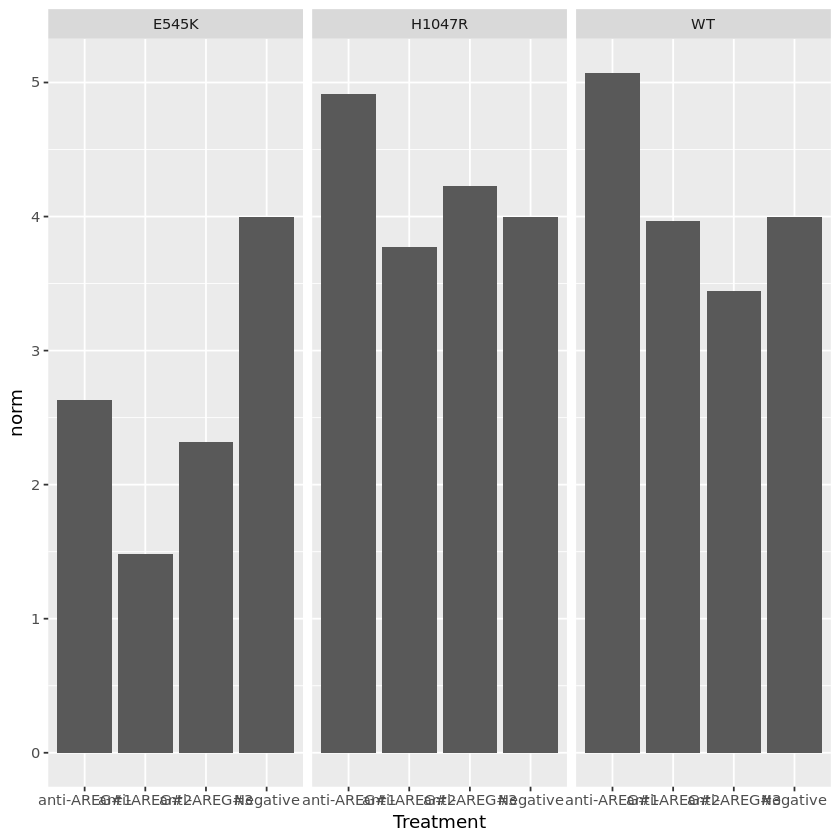

In [20]:
total_surv %>% ggplot(aes(x = Treatment, y = norm)) + 
    geom_col() + facet_wrap(~Genotype)

## 48 hour time point

In [21]:
sirna_surv <- read_csv("48hour_3molecule11.17.23.csv") %>% as.data.frame()
sirna_surv

Rows: 48 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): Sample ID, Cell type, Decluster degree, Analysis date/time, Analys...
dbl (24): Cell count, Viable cells, Total (x10^6) cells/mL, Viable (x10^6) c...
lgl  (3): Reanalysis date/time, Reanalysis by, Tag

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sample ID,Cell count,Viable cells,Total (x10^6) cells/mL,Viable (x10^6) cells/mL,Viability (%),Average diameter (µm),Average viable diameter (µm),Average circularity,Average viable circularity,⋯,Viable spot brightness (%),Viable spot area (%),Mixing cycles,Analysis date/time,Reanalysis date/time,Analysis by,Reanalysis by,Dilution,Wash,Tag
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<lgl>,<dbl>,<chr>,<lgl>
w-,1465,1412,0.52,0.50,96.38000,15.280000,15.480000,0.8500000,0.8500000,⋯,50,5,3,11/17/2023 2:49:41 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
w-,1344,1291,0.48,0.46,96.05655,15.377690,15.565572,0.8462803,0.8518663,⋯,NA,NA,0,11/17/2023 2:51:54 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
w-,1380,1334,0.49,0.48,96.66666,15.432169,15.629112,0.8549708,0.8598309,⋯,NA,NA,0,11/17/2023 2:54:05 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
w-,989,959,0.35,0.34,96.96664,14.977759,15.156549,0.8596720,0.8650082,⋯,NA,NA,0,11/17/2023 2:56:16 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
w_1,1369,1332,0.49,0.48,97.30000,15.040000,15.180000,0.8600000,0.8600000,⋯,50,5,3,11/17/2023 2:58:27 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
w_1,1780,1734,0.64,0.62,97.41573,14.983965,15.119793,0.8598613,0.8638063,⋯,NA,NA,0,11/17/2023 3:00:39 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
w_1,1872,1792,0.67,0.64,95.72649,14.509828,14.705632,0.8585563,0.8673452,⋯,NA,NA,0,11/17/2023 3:02:51 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
w_1,1277,1230,0.46,0.44,96.31950,14.514060,14.688814,0.8590011,0.8652112,⋯,NA,NA,0,11/17/2023 3:05:03 PM,NA,Vi-CELL,NA,1,Normal Wash,NA
w_2,1518,1442,0.54,0.52,94.99000,14.190000,14.400000,0.8600000,0.8700000,⋯,50,5,3,11/17/2023 3:07:13 PM,NA,Vi-CELL,NA,1,Normal Wash,NA


In [22]:
#data cleaning
sirna_surv_select <- sirna_surv %>% select(c(1,3))
WT_surv <- sirna_surv_select %>% slice(1:16)
E545K_surv <- sirna_surv_select %>% slice(17:32)
H1047R_surv <- sirna_surv_select %>% slice(33:48)
WT_surv$Genotype <- c(rep("WT", 16))
E545K_surv$Genotype <- c(rep("E545K", 16))
H1047R_surv$Genotype <- c(rep("H1047R", 16))
WT_surv$Treatment <- c(rep("Negative", 4), rep("anti-AREG#1", 4), 
                       rep("anti-AREG#2", 4), rep("anti-AREG#3", 4))
E545K_surv$Treatment <- c(rep("Negative", 4), rep("anti-AREG#1", 4), 
                       rep("anti-AREG#2", 4), rep("anti-AREG#3", 4))
H1047R_surv$Treatment <- c(rep("Negative", 4), rep("anti-AREG#1", 4), 
                       rep("anti-AREG#2", 4), rep("anti-AREG#3", 4))

#calculate normalized values
WT_normfactor <- WT_surv %>% filter(Treatment == "Negative")
WT_normfactor <- mean(WT_normfactor$`Viable cells`)

E545K_normfactor <- E545K_surv %>% filter(Treatment == "Negative")
E545K_normfactor <- mean(E545K_normfactor$`Viable cells`)

H1047R_normfactor <- H1047R_surv %>% filter(Treatment == "Negative")
H1047R_normfactor <- mean(H1047R_normfactor$`Viable cells`)

WT_surv$norm <- WT_surv$`Viable cells` / WT_normfactor
E545K_surv$norm <- E545K_surv$`Viable cells` / E545K_normfactor
H1047R_surv$norm <- H1047R_surv$`Viable cells` / H1047R_normfactor

total_surv <- rbind(WT_surv, E545K_surv, H1047R_surv)
total_surv

Sample ID,Viable cells,Genotype,Treatment,norm
<chr>,<dbl>,<chr>,<chr>,<dbl>
w-,1412,WT,Negative,1.1305044
w-,1291,WT,Negative,1.0336269
w-,1334,WT,Negative,1.0680544
w-,959,WT,Negative,0.7678143
w_1,1332,WT,anti-AREG#1,1.0664532
w_1,1734,WT,anti-AREG#1,1.3883106
w_1,1792,WT,anti-AREG#1,1.4347478
w_1,1230,WT,anti-AREG#1,0.9847878
w_2,1442,WT,anti-AREG#2,1.1545236


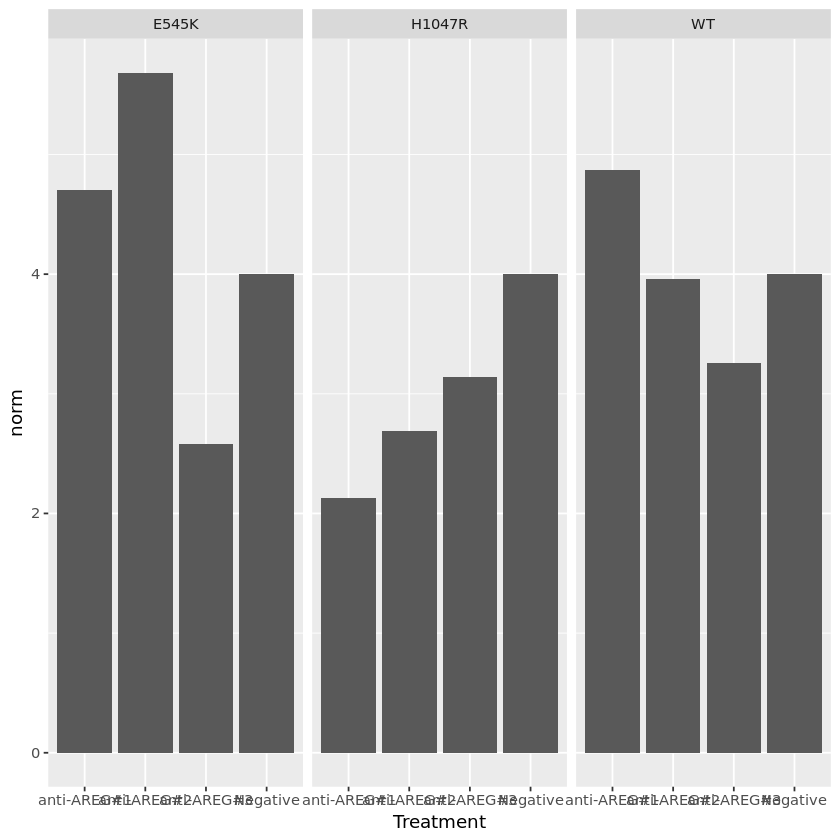

In [23]:
total_surv %>% ggplot(aes(x = Treatment, y = norm)) + 
    geom_col() + facet_wrap(~Genotype)

# Enhancer Deletion 10-5 and 10-6

In [1]:
setwd("/data/park_lab/adam/EnhancerDeletion_10-5/")
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()



## Expression

In [2]:
wt_ex9_res <- read_tsv("10_5wtex9_qPCR.txt") %>% as.data.frame()
ex20_res <- read_tsv("10_5ex20_qPCR.txt") %>% as.data.frame()
wt_ex9_res

Rows: 96 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): Sample Name, Target Name, Task, Reporter, Quencher
dbl (1): CT

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 48 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): Sample Name, Target Name, Task, Reporter, Quencher
dbl (1): CT

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sample Name,Target Name,Task,Reporter,Quencher,CT
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
wae,ACTB,UNKNOWN,SYBR,None,16.658
wae,ACTB,UNKNOWN,SYBR,None,16.488
wae,ACTB,UNKNOWN,SYBR,None,16.725
w-e,ACTB,UNKNOWN,SYBR,None,16.360
w-e,ACTB,UNKNOWN,SYBR,None,16.338
w-e,ACTB,UNKNOWN,SYBR,None,16.374
wa-,ACTB,UNKNOWN,SYBR,None,15.740
wa-,ACTB,UNKNOWN,SYBR,None,20.688
wa-,ACTB,UNKNOWN,SYBR,None,16.595


In [10]:
wt_res <- wt_ex9_res %>% head(n = 48)
wt_res$Genotype <- c(rep("WT", 48))
wt_res_bytech <- wt_res %>% head(12)
wt_res_bytech$Media <- c(rep("EGF", 6), rep("NoEGF", 6))
ACTBrepCT <- wt_res %>% slice(13:24) %>% select(c(6)) %>% as.vector()
AREGrep1CT <- wt_res %>% slice(25:36) %>% select(c(6)) %>% as.vector()
AREGrep2CT <- wt_res %>% slice(37:48) %>% select(c(6)) %>% as.vector()
wt_res_bytech <- cbind(wt_res_bytech, ACTBrepCT, AREGrep1CT, AREGrep2CT)
names(wt_res_bytech) <- c("sample_ID", "rem1", "rem2", "rem3", "rem4", 
                          "ACTBrep1", "Genotype", "Media", 
                          "ACTBrep2", "AREGrep1", "AREGrep2")
wt_res_bytech$Treatment <- c(rep("AREG", 3), rep("Negative", 3), 
                             rep("AREG", 3), rep("Negative", 3))
wt_res_bytech <- wt_res_bytech %>% select(c(1,7, 8, 12, 6, 9:11))
wt_res_bytech

,sample_ID,Genotype,Media,Treatment,ACTBrep1,ACTBrep2,AREGrep1,AREGrep2
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,wae,WT,EGF,AREG,16.658,16.686,28.772,28.779
2,wae,WT,EGF,AREG,16.488,16.625,27.792,27.955
3,wae,WT,EGF,AREG,16.725,16.800,28.379,28.938
4,w-e,WT,EGF,Negative,16.360,16.388,27.195,27.289
5,w-e,WT,EGF,Negative,16.338,16.308,26.599,26.661
6,w-e,WT,EGF,Negative,16.374,16.437,26.720,26.813
7,wa-,WT,NoEGF,AREG,15.740,15.747,27.905,27.994
8,wa-,WT,NoEGF,AREG,20.688,20.659,30.337,38.924
9,wa-,WT,NoEGF,AREG,16.595,16.657,27.888,27.974


In [11]:
ex9_res <- wt_ex9_res %>% slice(49:96)
ex9_res$Genotype <- c(rep("Ex9", 48))
ex9_res_bytech <- ex9_res %>% head(12)
ex9_res_bytech$Media <- c(rep("EGF", 6), rep("NoEGF", 6))
ACTBrepCT <- ex9_res %>% slice(13:24) %>% select(c(6)) %>% as.vector()
AREGrep1CT <- ex9_res %>% slice(25:36) %>% select(c(6)) %>% as.vector()
AREGrep2CT <- ex9_res %>% slice(37:48) %>% select(c(6)) %>% as.vector()
ex9_res_bytech <- cbind(ex9_res_bytech, ACTBrepCT, AREGrep1CT, AREGrep2CT)
names(ex9_res_bytech) <- c("sample_ID", "rem1", "rem2", "rem3", "rem4", 
                          "ACTBrep1", "Genotype", "Media",
                           "ACTBrep2", "AREGrep1", "AREGrep2")
ex9_res_bytech$Treatment <- c(rep("AREG", 3), rep("Negative", 3), 
                             rep("AREG", 3), rep("Negative", 3))
ex9_res_bytech <- ex9_res_bytech %>% select(c(1,7, 8, 12, 6, 9:11))
ex9_res_bytech

,sample_ID,Genotype,Media,Treatment,ACTBrep1,ACTBrep2,AREGrep1,AREGrep2
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,9ae,Ex9,EGF,AREG,15.640,15.620,25.380,25.701
2,9ae,Ex9,EGF,AREG,15.973,15.958,25.226,25.570
3,9ae,Ex9,EGF,AREG,16.718,16.575,24.955,25.304
4,9-e,Ex9,EGF,Negative,15.560,15.536,23.456,23.433
5,9-e,Ex9,EGF,Negative,15.441,15.525,23.604,23.569
6,9-e,Ex9,EGF,Negative,15.578,15.589,23.737,23.750
7,9a-,Ex9,NoEGF,AREG,16.923,16.602,26.105,26.001
8,9a-,Ex9,NoEGF,AREG,15.975,15.872,26.473,26.276
9,9a-,Ex9,NoEGF,AREG,17.772,17.385,26.513,26.427


In [13]:
ex20_res <- ex20_res %>% head(n = 48)
ex20_res$Genotype <- c(rep("Ex20", 48))
ex20_res_bytech <- ex20_res %>% head(12)
ex20_res_bytech$Media <- c(rep("EGF", 6), rep("NoEGF", 6))
ACTBrepCT <- ex20_res %>% slice(13:24) %>% select(c(6)) %>% as.vector()
AREGrep1CT <- ex20_res %>% slice(25:36) %>% select(c(6)) %>% as.vector()
AREGrep2CT <- ex20_res %>% slice(37:48) %>% select(c(6)) %>% as.vector()
ex20_res_bytech <- cbind(ex20_res_bytech, ACTBrepCT, AREGrep1CT, AREGrep2CT)
names(ex20_res_bytech) <- c("sample_ID", "rem1", "rem2", "rem3", "rem4", 
                          "ACTBrep1", "Genotype", "Media", 
                          "ACTBrep2", "AREGrep1", "AREGrep2")
ex20_res_bytech$Treatment <- c(rep("AREG", 3), rep("Negative", 3), 
                             rep("AREG", 3), rep("Negative", 3))
ex20_res_bytech <- ex20_res_bytech %>% select(c(1,7, 8, 12, 6, 9:11))
ex20_res_bytech

,sample_ID,Genotype,Media,Treatment,ACTBrep1,ACTBrep2,AREGrep1,AREGrep2
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,20ae,Ex20,EGF,AREG,19.641,19.547,27.913,28.230
2,20ae,Ex20,EGF,AREG,18.178,18.288,27.955,28.292
3,20ae,Ex20,EGF,AREG,20.919,20.967,29.435,29.735
4,20-e,Ex20,EGF,Negative,16.875,17.079,26.008,26.381
5,20-e,Ex20,EGF,Negative,18.229,18.285,26.671,26.905
6,20-e,Ex20,EGF,Negative,17.002,17.029,26.112,26.323
7,20a-,Ex20,NoEGF,AREG,17.007,17.010,28.596,28.957
8,20a-,Ex20,NoEGF,AREG,18.695,18.686,28.317,28.530
9,20a-,Ex20,NoEGF,AREG,18.037,18.118,27.840,28.021


In [14]:
wt_res_bytech <- wt_res_bytech %>% mutate(ACTB_av = (ACTBrep1 + ACTBrep2)/2)
ex9_res_bytech <- ex9_res_bytech %>% mutate(ACTB_av = (ACTBrep1 + ACTBrep2)/2)
ex20_res_bytech <- ex20_res_bytech %>% mutate(ACTB_av = (ACTBrep1 + ACTBrep2)/2)
wt_res_bytech <- wt_res_bytech %>% mutate(AREG_av = (AREGrep1 + AREGrep2)/2)
ex9_res_bytech <- ex9_res_bytech %>% mutate(AREG_av = (AREGrep1 + AREGrep2)/2)
ex20_res_bytech <- ex20_res_bytech %>% mutate(AREG_av = (AREGrep1 + AREGrep2)/2)

wt_res_bytech <- wt_res_bytech %>% mutate(DeltCT = AREG_av - ACTB_av)
ex9_res_bytech <- ex9_res_bytech %>% mutate(DeltCT = AREG_av - ACTB_av)
ex20_res_bytech <- ex20_res_bytech %>% mutate(DeltCT = AREG_av - ACTB_av)
wt_res_bytech

,sample_ID,Genotype,Media,Treatment,ACTBrep1,ACTBrep2,AREGrep1,AREGrep2,ACTB_av,AREG_av,DeltCT
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,wae,WT,EGF,AREG,16.658,16.686,28.772,28.779,16.6720,28.7755,12.1035
2,wae,WT,EGF,AREG,16.488,16.625,27.792,27.955,16.5565,27.8735,11.3170
3,wae,WT,EGF,AREG,16.725,16.800,28.379,28.938,16.7625,28.6585,11.8960
4,w-e,WT,EGF,Negative,16.360,16.388,27.195,27.289,16.3740,27.2420,10.8680
5,w-e,WT,EGF,Negative,16.338,16.308,26.599,26.661,16.3230,26.6300,10.3070
6,w-e,WT,EGF,Negative,16.374,16.437,26.720,26.813,16.4055,26.7665,10.3610
7,wa-,WT,NoEGF,AREG,15.740,15.747,27.905,27.994,15.7435,27.9495,12.2060
8,wa-,WT,NoEGF,AREG,20.688,20.659,30.337,38.924,20.6735,34.6305,13.9570
9,wa-,WT,NoEGF,AREG,16.595,16.657,27.888,27.974,16.6260,27.9310,11.3050


In [17]:
wt_res_bytech_noEGF <- wt_res_bytech %>% filter(Media == "NoEGF")
ex9_res_bytech_noEGF <- ex9_res_bytech %>% filter(Media == "NoEGF")
ex20_res_bytech_noEGF <- ex20_res_bytech %>% filter(Media == "NoEGF")

wt_res_bytech_EGF <- wt_res_bytech %>% filter(Media == "EGF")
ex9_res_bytech_EGF <- ex9_res_bytech %>% filter(Media == "EGF")
ex20_res_bytech_EGF <- ex20_res_bytech %>% filter(Media == "EGF")

In [18]:
wt_none_av_noEGF <- wt_res_bytech_noEGF %>% filter(Treatment == "Negative") %>% select(c(11))
wt_none_av_noEGF <- mean(wt_none_av_noEGF$DeltCT)
ex9_none_av_noEGF <- ex9_res_bytech_noEGF %>% filter(Treatment == "Negative") %>% select(c(11))
ex9_none_av_noEGF <- mean(ex9_none_av_noEGF$DeltCT)
ex20_none_av_noEGF <- ex20_res_bytech_noEGF %>% filter(Treatment == "Negative") %>% select(c(11))
ex20_none_av_noEGF <- mean(ex20_none_av_noEGF$DeltCT)

wt_none_av_EGF <- wt_res_bytech_EGF %>% filter(Treatment == "Negative") %>% select(c(11))
wt_none_av_EGF <- mean(wt_none_av_EGF$DeltCT)
ex9_none_av_EGF <- ex9_res_bytech_EGF %>% filter(Treatment == "Negative") %>% select(c(11))
ex9_none_av_EGF <- mean(ex9_none_av_EGF$DeltCT)
ex20_none_av_EGF <- ex20_res_bytech_EGF %>% filter(Treatment == "Negative") %>% select(c(11))
ex20_none_av_EGF <- mean(ex20_none_av_EGF$DeltCT)

In [19]:
wt_res_bytech_EGF <- wt_res_bytech_EGF %>% mutate(DeltDeltCT = DeltCT - wt_none_av_EGF)
ex9_res_bytech_EGF <- ex9_res_bytech_EGF %>% mutate(DeltDeltCT = DeltCT - ex9_none_av_EGF)
ex20_res_bytech_EGF <- ex20_res_bytech_EGF %>% mutate(DeltDeltCT = DeltCT - ex20_none_av_EGF)

wt_res_bytech_noEGF <- wt_res_bytech_noEGF %>% mutate(DeltDeltCT = DeltCT - wt_none_av_noEGF)
ex9_res_bytech_noEGF <- ex9_res_bytech_noEGF %>% mutate(DeltDeltCT = DeltCT - ex9_none_av_noEGF)
ex20_res_bytech_noEGF <- ex20_res_bytech_noEGF %>% mutate(DeltDeltCT = DeltCT - ex20_none_av_noEGF)

In [20]:
wt_res_bytech_EGF <- wt_res_bytech_EGF %>% mutate(foldEXP = 2^(-DeltDeltCT))
ex9_res_bytech_EGF <- ex9_res_bytech_EGF %>% mutate(foldEXP = 2^(-DeltDeltCT))
ex20_res_bytech_EGF <- ex20_res_bytech_EGF %>% mutate(foldEXP = 2^(-DeltDeltCT))

wt_res_bytech_noEGF <- wt_res_bytech_noEGF %>% mutate(foldEXP = 2^(-DeltDeltCT))
ex9_res_bytech_noEGF <- ex9_res_bytech_noEGF %>% mutate(foldEXP = 2^(-DeltDeltCT))
ex20_res_bytech_noEGF <- ex20_res_bytech_noEGF %>% mutate(foldEXP = 2^(-DeltDeltCT))

total_df <- rbind(wt_res_bytech_EGF, ex9_res_bytech_EGF, ex20_res_bytech_EGF,
                  wt_res_bytech_noEGF, ex9_res_bytech_noEGF, ex20_res_bytech_noEGF)
total_df

sample_ID,Genotype,Media,Treatment,ACTBrep1,ACTBrep2,AREGrep1,AREGrep2,ACTB_av,AREG_av,DeltCT,DeltDeltCT,foldEXP
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
wae,WT,EGF,AREG,16.658,16.686,28.772,28.779,16.6720,28.7755,12.1035,1.59150000,0.33182627
wae,WT,EGF,AREG,16.488,16.625,27.792,27.955,16.5565,27.8735,11.3170,0.80500000,0.57236208
wae,WT,EGF,AREG,16.725,16.800,28.379,28.938,16.7625,28.6585,11.8960,1.38400000,0.38315499
w-e,WT,EGF,Negative,16.360,16.388,27.195,27.289,16.3740,27.2420,10.8680,0.35600000,0.78132788
w-e,WT,EGF,Negative,16.338,16.308,26.599,26.661,16.3230,26.6300,10.3070,-0.20500000,1.15268635
w-e,WT,EGF,Negative,16.374,16.437,26.720,26.813,16.4055,26.7665,10.3610,-0.15100000,1.11033883
9ae,Ex9,EGF,AREG,15.640,15.620,25.380,25.701,15.6300,25.5405,9.9105,1.85716667,0.27601782
9ae,Ex9,EGF,AREG,15.973,15.958,25.226,25.570,15.9655,25.3980,9.4325,1.37916667,0.38444079
9ae,Ex9,EGF,AREG,16.718,16.575,24.955,25.304,16.6465,25.1295,8.4830,0.42966667,0.74243330


In [21]:
total_df$relExp <- (40- total_df$AREG_av) / (40- total_df$ACTB_av)
total_df

sample_ID,Genotype,Media,Treatment,ACTBrep1,ACTBrep2,AREGrep1,AREGrep2,ACTB_av,AREG_av,DeltCT,DeltDeltCT,foldEXP,relExp
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
wae,WT,EGF,AREG,16.658,16.686,28.772,28.779,16.6720,28.7755,12.1035,1.59150000,0.33182627,0.4811600
wae,WT,EGF,AREG,16.488,16.625,27.792,27.955,16.5565,27.8735,11.3170,0.80500000,0.57236208,0.5172649
wae,WT,EGF,AREG,16.725,16.800,28.379,28.938,16.7625,28.6585,11.8960,1.38400000,0.38315499,0.4880689
w-e,WT,EGF,Negative,16.360,16.388,27.195,27.289,16.3740,27.2420,10.8680,0.35600000,0.78132788,0.5399983
w-e,WT,EGF,Negative,16.338,16.308,26.599,26.661,16.3230,26.6300,10.3070,-0.20500000,1.15268635,0.5646830
w-e,WT,EGF,Negative,16.374,16.437,26.720,26.813,16.4055,26.7665,10.3610,-0.15100000,1.11033883,0.5608722
9ae,Ex9,EGF,AREG,15.640,15.620,25.380,25.701,15.6300,25.5405,9.9105,1.85716667,0.27601782,0.5933320
9ae,Ex9,EGF,AREG,15.973,15.958,25.226,25.570,15.9655,25.3980,9.4325,1.37916667,0.38444079,0.6075433
9ae,Ex9,EGF,AREG,16.718,16.575,24.955,25.304,16.6465,25.1295,8.4830,0.42966667,0.74243330,0.6367568


In [22]:
total_df %>% filter(Genotype == "Ex20", Media == "NoEGF")

sample_ID,Genotype,Media,Treatment,ACTBrep1,ACTBrep2,AREGrep1,AREGrep2,ACTB_av,AREG_av,DeltCT,DeltDeltCT,foldEXP,relExp
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20a-,Ex20,NoEGF,AREG,17.007,17.010,28.596,28.957,17.0085,28.7765,11.7680,0.1511667,0.9005219,0.4881587
20a-,Ex20,NoEGF,AREG,18.695,18.686,28.317,28.530,18.6905,28.4235,9.7330,-1.8838333,3.6905436,0.5432554
20a-,Ex20,NoEGF,AREG,18.037,18.118,27.840,28.021,18.0775,27.9305,9.8530,-1.7638333,3.3959926,0.5505531
20--,Ex20,NoEGF,Negative,16.900,16.900,29.057,29.139,16.9000,29.0980,12.1980,0.5811667,0.6684230,0.4719481
20--,Ex20,NoEGF,Negative,16.933,16.947,28.110,28.176,16.9400,28.1430,11.2030,-0.4138333,1.3322209,0.5141804
20--,Ex20,NoEGF,Negative,17.106,17.127,28.445,28.687,17.1165,28.5660,11.4495,-0.1673333,1.1229809,0.4996613


## qPCRs redone following enzyme shortage

In [37]:
wt_ex9_res <- read_tsv("10-9qwtex9PCR.txt") %>% as.data.frame()
ex20_res <- read_tsv("10-9ex20qPCR.txt") %>% as.data.frame()
wt_ex9_res

Rows: 96 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): Sample Name, Target Name, Task, Reporter, Quencher, CT

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 48 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): Sample Name, Target Name, Task, Reporter, Quencher
dbl (1): CT

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sample Name,Target Name,Task,Reporter,Quencher,CT
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
wae,ACTB,UNKNOWN,SYBR,None,16.445
wae,ACTB,UNKNOWN,SYBR,None,16.784
wae,ACTB,UNKNOWN,SYBR,None,16.614
w-e,ACTB,UNKNOWN,SYBR,None,16.181
w-e,ACTB,UNKNOWN,SYBR,None,16.137
w-e,ACTB,UNKNOWN,SYBR,None,16.135
wa-,ACTB,UNKNOWN,SYBR,None,15.879
wa-,ACTB,UNKNOWN,SYBR,None,16.236
wa-,ACTB,UNKNOWN,SYBR,None,17.037


In [38]:
wt_res <- wt_ex9_res %>% head(n = 48)
wt_res$Genotype <- c(rep("WT", 48))
wt_res_bytech <- wt_res %>% head(12)
wt_res_bytech$Media <- c(rep("EGF", 6), rep("NoEGF", 6))
ACTBrepCT <- wt_res %>% slice(13:24) %>% select(c(6)) %>% as.vector()
AREGrep1CT <- wt_res %>% slice(25:36) %>% select(c(6)) %>% as.vector()
AREGrep2CT <- wt_res %>% slice(37:48) %>% select(c(6)) %>% as.vector()
wt_res_bytech <- cbind(wt_res_bytech, ACTBrepCT, AREGrep1CT, AREGrep2CT)
names(wt_res_bytech) <- c("sample_ID", "rem1", "rem2", "rem3", "rem4", 
                          "ACTBrep1", "Genotype", "Media", 
                          "ACTBrep2", "AREGrep1", "AREGrep2")
wt_res_bytech$Treatment <- c(rep("AREG", 3), rep("Negative", 3), 
                             rep("AREG", 3), rep("Negative", 3))
wt_res_bytech <- wt_res_bytech %>% select(c(1,7, 8, 12, 6, 9:11))
wt_res_bytech <- wt_res_bytech %>% mutate_at(c('ACTBrep1', 'ACTBrep2', 
                                                 'AREGrep1', 'AREGrep2'), as.numeric)
wt_res_bytech

,sample_ID,Genotype,Media,Treatment,ACTBrep1,ACTBrep2,AREGrep1,AREGrep2
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,wae,WT,EGF,AREG,16.445,16.387,33.276,33.109
2,wae,WT,EGF,AREG,16.784,16.704,32.172,32.431
3,wae,WT,EGF,AREG,16.614,16.643,33.794,34.051
4,w-e,WT,EGF,Negative,16.181,16.164,31.863,31.933
5,w-e,WT,EGF,Negative,16.137,16.063,31.268,31.327
6,w-e,WT,EGF,Negative,16.135,16.112,31.459,31.342
7,wa-,WT,NoEGF,AREG,15.879,15.839,32.599,32.627
8,wa-,WT,NoEGF,AREG,16.236,16.252,32.328,32.490
9,wa-,WT,NoEGF,AREG,17.037,17.102,32.701,32.796


In [47]:
ex9_res <- wt_ex9_res %>% slice(49:96)
ex9_res$Genotype <- c(rep("Ex9", 48))
ex9_res_bytech <- ex9_res %>% head(12)
ex9_res_bytech$Media <- c(rep("EGF", 6), rep("NoEGF", 6))
ACTBrepCT <- ex9_res %>% slice(13:24) %>% select(c(6)) %>% as.vector()
AREGrep1CT <- ex9_res %>% slice(25:36) %>% select(c(6)) %>% as.vector()
AREGrep2CT <- ex9_res %>% slice(37:48) %>% select(c(6)) %>% as.vector()
ex9_res_bytech <- cbind(ex9_res_bytech, ACTBrepCT, AREGrep1CT, AREGrep2CT)
names(ex9_res_bytech) <- c("sample_ID", "rem1", "rem2", "rem3", "rem4", 
                          "ACTBrep1", "Genotype", "Media",
                           "ACTBrep2", "AREGrep1", "AREGrep2")
ex9_res_bytech$Treatment <- c(rep("AREG", 3), rep("Negative", 3), 
                             rep("AREG", 3), rep("Negative", 3))
ex9_res_bytech <- ex9_res_bytech %>% select(c(1,7, 8, 12, 6, 9:11))
ex9_res_bytech[ex9_res_bytech == "Undetermined"] <- NA
ex9_res_bytech[ex9_res_bytech == "23.704"] <- NA #exclude outlier
ex9_res_bytech <- ex9_res_bytech %>% mutate_at(c('ACTBrep1', 'ACTBrep2', 'AREGrep1', 'AREGrep2'), as.numeric)
ex9_res_bytech

,sample_ID,Genotype,Media,Treatment,ACTBrep1,ACTBrep2,AREGrep1,AREGrep2
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,9ae,Ex9,EGF,AREG,NA,15.539,29.790,29.762
2,9ae,Ex9,EGF,AREG,NA,16.481,29.856,29.737
3,9ae,Ex9,EGF,AREG,17.591,17.595,30.232,29.793
4,9-e,Ex9,EGF,Negative,15.455,15.497,28.078,28.166
5,9-e,Ex9,EGF,Negative,15.566,15.570,28.319,28.045
6,9-e,Ex9,EGF,Negative,15.945,15.844,28.538,28.517
7,9a-,Ex9,NoEGF,AREG,17.621,17.561,31.103,NA
8,9a-,Ex9,NoEGF,AREG,16.289,16.266,30.511,NA
9,9a-,Ex9,NoEGF,AREG,17.863,17.644,30.747,30.625


In [48]:
ex20_res <- ex20_res %>% head(n = 48)
ex20_res$Genotype <- c(rep("Ex20", 48))
ex20_res_bytech <- ex20_res %>% head(12)
ex20_res_bytech$Media <- c(rep("EGF", 6), rep("NoEGF", 6))
ACTBrepCT <- ex20_res %>% slice(13:24) %>% select(c(6)) %>% as.vector()
AREGrep1CT <- ex20_res %>% slice(25:36) %>% select(c(6)) %>% as.vector()
AREGrep2CT <- ex20_res %>% slice(37:48) %>% select(c(6)) %>% as.vector()
ex20_res_bytech <- cbind(ex20_res_bytech, ACTBrepCT, AREGrep1CT, AREGrep2CT)
names(ex20_res_bytech) <- c("sample_ID", "rem1", "rem2", "rem3", "rem4", 
                          "ACTBrep1", "Genotype", "Media", 
                          "ACTBrep2", "AREGrep1", "AREGrep2")
ex20_res_bytech$Treatment <- c(rep("AREG", 3), rep("Negative", 3), 
                             rep("AREG", 3), rep("Negative", 3))
ex20_res_bytech <- ex20_res_bytech %>% select(c(1,7, 8, 12, 6, 9:11))
ex20_res_bytech

,sample_ID,Genotype,Media,Treatment,ACTBrep1,ACTBrep2,AREGrep1,AREGrep2
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,20ae,Ex20,EGF,AREG,18.043,17.694,31.654,31.696
2,20ae,Ex20,EGF,AREG,19.377,19.513,32.111,32.333
3,20ae,Ex20,EGF,AREG,20.120,20.150,32.563,32.927
4,20-e,Ex20,EGF,Negative,17.220,17.200,29.866,30.029
5,20-e,Ex20,EGF,Negative,18.305,18.232,30.414,30.647
6,20-e,Ex20,EGF,Negative,17.577,17.485,30.056,30.199
7,20a-,Ex20,NoEGF,AREG,16.891,16.900,32.383,32.757
8,20a-,Ex20,NoEGF,AREG,17.181,17.169,32.570,32.627
9,20a-,Ex20,NoEGF,AREG,17.460,17.467,32.000,32.513


In [49]:
wt_res_bytech <- wt_res_bytech %>% mutate(
    ACTB_av = ifelse(test = is.na((ACTBrep1 + ACTBrep2)/2),yes = ACTBrep2, 
                     no = (ACTBrep1 + ACTBrep2)/2))
ex9_res_bytech <- ex9_res_bytech %>% mutate(
    ACTB_av = ifelse(test = is.na((ACTBrep1 + ACTBrep2)/2),yes = ACTBrep2, 
                     no = (ACTBrep1 + ACTBrep2)/2))
ex20_res_bytech <- ex20_res_bytech %>% mutate(
    ACTB_av = ifelse(test = is.na((ACTBrep1 + ACTBrep2)/2),yes = ACTBrep2, 
                     no = (ACTBrep1 + ACTBrep2)/2))
wt_res_bytech <- wt_res_bytech %>% mutate(AREG_av = ifelse(is.na((AREGrep1 + AREGrep2)/2), 
                                                 yes = AREGrep1, 
                                                           no = (AREGrep1 + AREGrep2)/2))
ex9_res_bytech <- ex9_res_bytech %>% mutate(AREG_av = ifelse(is.na((AREGrep1 + AREGrep2)/2), 
                                                 yes = AREGrep1, 
                                                           no = (AREGrep1 + AREGrep2)/2))
ex20_res_bytech <- ex20_res_bytech %>% mutate(AREG_av = ifelse(is.na((AREGrep1 + AREGrep2)/2), 
                                                 yes = AREGrep1, 
                                                           no = (AREGrep1 + AREGrep2)/2))

wt_res_bytech <- wt_res_bytech %>% mutate(DeltCT = AREG_av - ACTB_av)
ex9_res_bytech <- ex9_res_bytech %>% mutate(DeltCT = AREG_av - ACTB_av)
ex20_res_bytech <- ex20_res_bytech %>% mutate(DeltCT = AREG_av - ACTB_av)
ex9_res_bytech

,sample_ID,Genotype,Media,Treatment,ACTBrep1,ACTBrep2,AREGrep1,AREGrep2,ACTB_av,AREG_av,DeltCT
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9ae,Ex9,EGF,AREG,NA,15.539,29.790,29.762,15.5390,29.7760,14.2370
2,9ae,Ex9,EGF,AREG,NA,16.481,29.856,29.737,16.4810,29.7965,13.3155
3,9ae,Ex9,EGF,AREG,17.591,17.595,30.232,29.793,17.5930,30.0125,12.4195
4,9-e,Ex9,EGF,Negative,15.455,15.497,28.078,28.166,15.4760,28.1220,12.6460
5,9-e,Ex9,EGF,Negative,15.566,15.570,28.319,28.045,15.5680,28.1820,12.6140
6,9-e,Ex9,EGF,Negative,15.945,15.844,28.538,28.517,15.8945,28.5275,12.6330
7,9a-,Ex9,NoEGF,AREG,17.621,17.561,31.103,NA,17.5910,31.1030,13.5120
8,9a-,Ex9,NoEGF,AREG,16.289,16.266,30.511,NA,16.2775,30.5110,14.2335
9,9a-,Ex9,NoEGF,AREG,17.863,17.644,30.747,30.625,17.7535,30.6860,12.9325


In [50]:
wt_res_bytech_noEGF <- wt_res_bytech %>% filter(Media == "NoEGF")
ex9_res_bytech_noEGF <- ex9_res_bytech %>% filter(Media == "NoEGF")
ex20_res_bytech_noEGF <- ex20_res_bytech %>% filter(Media == "NoEGF")

wt_res_bytech_EGF <- wt_res_bytech %>% filter(Media == "EGF")
ex9_res_bytech_EGF <- ex9_res_bytech %>% filter(Media == "EGF")
ex20_res_bytech_EGF <- ex20_res_bytech %>% filter(Media == "EGF")

In [51]:
wt_none_av_noEGF <- wt_res_bytech_noEGF %>% filter(Treatment == "Negative") %>% select(c(11))
wt_none_av_noEGF <- mean(wt_none_av_noEGF$DeltCT)
ex9_none_av_noEGF <- ex9_res_bytech_noEGF %>% filter(Treatment == "Negative") %>% select(c(11))
ex9_none_av_noEGF <- mean(ex9_none_av_noEGF$DeltCT)
ex20_none_av_noEGF <- ex20_res_bytech_noEGF %>% filter(Treatment == "Negative") %>% select(c(11))
ex20_none_av_noEGF <- mean(ex20_none_av_noEGF$DeltCT)

wt_none_av_EGF <- wt_res_bytech_EGF %>% filter(Treatment == "Negative") %>% select(c(11))
wt_none_av_EGF <- mean(wt_none_av_EGF$DeltCT)
ex9_none_av_EGF <- ex9_res_bytech_EGF %>% filter(Treatment == "Negative") %>% select(c(11))
ex9_none_av_EGF <- mean(ex9_none_av_EGF$DeltCT)
ex20_none_av_EGF <- ex20_res_bytech_EGF %>% filter(Treatment == "Negative") %>% select(c(11))
ex20_none_av_EGF <- mean(ex20_none_av_EGF$DeltCT)

In [52]:
wt_res_bytech_EGF <- wt_res_bytech_EGF %>% mutate(DeltDeltCT = DeltCT - wt_none_av_EGF)
ex9_res_bytech_EGF <- ex9_res_bytech_EGF %>% mutate(DeltDeltCT = DeltCT - ex9_none_av_EGF)
ex20_res_bytech_EGF <- ex20_res_bytech_EGF %>% mutate(DeltDeltCT = DeltCT - ex20_none_av_EGF)

wt_res_bytech_noEGF <- wt_res_bytech_noEGF %>% mutate(DeltDeltCT = DeltCT - wt_none_av_noEGF)
ex9_res_bytech_noEGF <- ex9_res_bytech_noEGF %>% mutate(DeltDeltCT = DeltCT - ex9_none_av_noEGF)
ex20_res_bytech_noEGF <- ex20_res_bytech_noEGF %>% mutate(DeltDeltCT = DeltCT - ex20_none_av_noEGF)

In [53]:
wt_res_bytech_EGF <- wt_res_bytech_EGF %>% mutate(foldEXP = 2^(-DeltDeltCT))
ex9_res_bytech_EGF <- ex9_res_bytech_EGF %>% mutate(foldEXP = 2^(-DeltDeltCT))
ex20_res_bytech_EGF <- ex20_res_bytech_EGF %>% mutate(foldEXP = 2^(-DeltDeltCT))

wt_res_bytech_noEGF <- wt_res_bytech_noEGF %>% mutate(foldEXP = 2^(-DeltDeltCT))
ex9_res_bytech_noEGF <- ex9_res_bytech_noEGF %>% mutate(foldEXP = 2^(-DeltDeltCT))
ex20_res_bytech_noEGF <- ex20_res_bytech_noEGF %>% mutate(foldEXP = 2^(-DeltDeltCT))

total_df <- rbind(wt_res_bytech_EGF, ex9_res_bytech_EGF, ex20_res_bytech_EGF,
                  wt_res_bytech_noEGF, ex9_res_bytech_noEGF, ex20_res_bytech_noEGF)
total_df

sample_ID,Genotype,Media,Treatment,ACTBrep1,ACTBrep2,AREGrep1,AREGrep2,ACTB_av,AREG_av,DeltCT,DeltDeltCT,foldEXP
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
wae,WT,EGF,AREG,16.445,16.387,33.276,33.109,16.4160,33.1925,16.7765,1.37650000,0.3851520
wae,WT,EGF,AREG,16.784,16.704,32.172,32.431,16.7440,32.3015,15.5575,0.15750000,0.8965774
wae,WT,EGF,AREG,16.614,16.643,33.794,34.051,16.6285,33.9225,17.2940,1.89400000,0.2690600
w-e,WT,EGF,Negative,16.181,16.164,31.863,31.933,16.1725,31.8980,15.7255,0.32550000,0.7980218
w-e,WT,EGF,Negative,16.137,16.063,31.268,31.327,16.1000,31.2975,15.1975,-0.20250000,1.1506906
w-e,WT,EGF,Negative,16.135,16.112,31.459,31.342,16.1235,31.4005,15.2770,-0.12300000,1.0889970
9ae,Ex9,EGF,AREG,NA,15.539,29.790,29.762,15.5390,29.7760,14.2370,1.60600000,0.3285079
9ae,Ex9,EGF,AREG,NA,16.481,29.856,29.737,16.4810,29.7965,13.3155,0.68450000,0.6222214
9ae,Ex9,EGF,AREG,17.591,17.595,30.232,29.793,17.5930,30.0125,12.4195,-0.21150000,1.1578914


In [54]:
total_df$relExp <- (40- total_df$AREG_av) / (40- total_df$ACTB_av)
total_df

sample_ID,Genotype,Media,Treatment,ACTBrep1,ACTBrep2,AREGrep1,AREGrep2,ACTB_av,AREG_av,DeltCT,DeltDeltCT,foldEXP,relExp
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
wae,WT,EGF,AREG,16.445,16.387,33.276,33.109,16.4160,33.1925,16.7765,1.37650000,0.3851520,0.2886491
wae,WT,EGF,AREG,16.784,16.704,32.172,32.431,16.7440,32.3015,15.5575,0.15750000,0.8965774,0.3310329
wae,WT,EGF,AREG,16.614,16.643,33.794,34.051,16.6285,33.9225,17.2940,1.89400000,0.2690600,0.2600389
w-e,WT,EGF,Negative,16.181,16.164,31.863,31.933,16.1725,31.8980,15.7255,0.32550000,0.7980218,0.3400273
w-e,WT,EGF,Negative,16.137,16.063,31.268,31.327,16.1000,31.2975,15.1975,-0.20250000,1.1506906,0.3641213
w-e,WT,EGF,Negative,16.135,16.112,31.459,31.342,16.1235,31.4005,15.2770,-0.12300000,1.0889970,0.3601659
9ae,Ex9,EGF,AREG,NA,15.539,29.790,29.762,15.5390,29.7760,14.2370,1.60600000,0.3285079,0.4179715
9ae,Ex9,EGF,AREG,NA,16.481,29.856,29.737,16.4810,29.7965,13.3155,0.68450000,0.6222214,0.4338407
9ae,Ex9,EGF,AREG,17.591,17.595,30.232,29.793,17.5930,30.0125,12.4195,-0.21150000,1.1578914,0.4457312
